# Prédisez la consommation d'énergie des bâtiments dans la ville de Seattle.

<div align="left">
  <img src="https://user.oc-static.com/upload/2024/09/11/17260684381511_Capture%20d%E2%80%99e%CC%81cran%202024-09-11%20a%CC%80%2017.22.25.png" width="200px">
</div>

## **Objetif**: Prédire les **émissions de CO2** et la **consommation totale d’énergie** de **bâtiments non destinés à l’habitation**

- Auteur......: **Rafael CEREZO MARTIN**
- Date........: **Décembre 2025**

# <span style="color:red">PART 3. FEATURE ENGINEERING V1 </span>

A réaliser : Enrichir le jeu de données actuel avec de nouvelles features issues de celles existantes.



En règle générale : On utilise la méthode .apply() de Pandas pour créer une nouvelle colonne à partir d'une colonne existante. N'hésitez pas à regarder les exemples dans les chapitres de cours donnés en ressource

**Préparation des features pour la modélisation**
A réaliser :

- ✅️ (1.1) Si ce n'est pas déjà fait, supprimer toutes les colonnes peu pertinentes pour la modélisation.
- Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.
- ✅️ (1.4) Débarrassez-vous des features redondantes en utilisant une matrice de corrélation de Pearson. Pour cela, utiisez la méthode corr() de Pandas, couplé d'un graphique Heatmap de la librairie Seaborn
- Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).
- Séparez votre jeu de données en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target).
- Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne. Les deux méthodes d'encodage à connaitre sont le OneHotEncoder et le LabelEncoder

## Étape 2 : Réalisez votre feature engineering 

### 📋 Prérequis

* **Analyse préalable** : S'être familiarisé avec le jeu de données via l'analyse exploratoire (EDA).
* **Connaissances théoriques** : Avoir compris les concepts de **Feature Engineering** via les ressources pédagogiques.

### 🎯 Résultat attendu

* Le notebook template avec la section **"Feature Engineering"** intégralement complétée.

### 💡 Recommandations

1. **Apprentissage par la pratique** : Il est fortement déconseillé d'automatiser cette section via des outils tiers. La subtilité des erreurs en feature engineering nécessite une approche manuelle pour développer votre intuition de Data Scientist.
2. **Organisation** : Si l'analyse exploratoire est trop volumineuse, n'hésitez pas à isoler le Feature Engineering dans un second notebook pour plus de clarté.
3. **Diversité des indicateurs** : Couvrez plusieurs dimensions du jeu de données :
* **Localisation** (Quartiers, coordonnées).
* **Temporalité** (Âge du bâtiment).
* **Structure** (Nombre d'étages, types d'usages).


4. **Pistes de réflexion spécifiques** :
* **Usage multiple** : Créer des variables binaires ou des proportions pour les bâtiments mixtes.
* **Gestion de la cardinalité** : Créer des tranches de valeurs (binning) pour les variables catégorielles ayant trop de modalités.
* **Sources d'énergie** : Utiliser la *présence* d'une source (Gaz, Électricité) comme information structurelle.



### ⚠️ Points de vigilance

* **Data Leakage (Fuite de données)** : C'est le point le plus critique. **Interdiction** d'utiliser des variables calculées à partir de la consommation d'énergie (ou des émissions) pour prédire ces mêmes cibles.
* **Gestion du temps** : Fixez-vous une limite d'heures. Le Feature Engineering est un processus potentiellement infini ; l'objectif est la compréhension pratique, pas la performance absolue du modèle.

### 📚 Ressources

* Section *Feature Engineering* du cours **"Transformez les variables pour faciliter l'apprentissage"**.
* Section *Feature Engineering* du cours **"Maîtrisez l'apprentissage supervisé"** (focus sur les techniques classiques et le data leakage).


## Table de Matieres


In [1]:
# ==============================================================================
# CODE FEATURE ENGINEERING : PLAN DE TRAITEMENT
# ==============================================================================

# 1. Nettoyage Initial et Élimination
# 1.1. Suppression des Constantes................: Éliminer les colonnes DataYear, City, et State.
# 1.2. Élimination des Manquants Excessifs.......: Supprimer les colonnes Comments et Outlier.
# 1.3. Suppression des Identifiants..............: Supprimer l'identifiant unique OSEBuildingID.
# 1.4. Gestion de la Redondance..................: Supprimer l'une des colonnes d'électricité (kBtu ou kWh).

# 2. Gestion des Valeurs Manquantes (Imputation)
# 2.1. Création d'Indicateurs....................: Créer des features binaires [Col]_Manquant (>50% missing).
# 2.2. Imputation Catégorielle...................: Remplacer les manquants par 'INCONNU' ou 'AUCUN'.
# 2.3. Imputation Numérique......................: Imputer les valeurs restantes avec la Médiane.

# 3. Traitement de l'Asymétrie et Outliers
# 3.1. Transformation Logarithmique..............: Appliquer $ln(1+x)$ aux variables d'énergie et surface.
# 3.2. Winsorisation/Écrêtage....................: Capper les valeurs aux percentiles 1% et 99%.

# 4. Création de Nouvelles Features (Enrichissement)
# 4.1. Ratios d'Efficacité.......................: Créer GHG_Density et EUI_Density (par surface).
# 4.2. Indicateur d'Usage........................: Créer la feature binaire Multi_Usage.
# 4.3. Ratio de Parking..........................: Calculer Parking_Ratio = GFA_Parking / GFA_Total.
# 4.4. Binning...................................: Discrétiser ENERGYSTARScore en catégories ordonnées.

# 5. Codification Catégorielle (Encoding)
# 5.1. One-Hot Encoding (OHE)....................: Appliquer aux variables à faible cardinalité.
# 5.2. Target Encoding...........................: Appliquer à Neighborhood (avec CV pour éviter le Leakage).

# 6. Réduction de la Redondance
# 6.1. Analyse de Corrélation....................: Calculer la matrice de Pearson post-transformations.
# 6.2. Élimination des Corréliées................: Supprimer si $| \rho | > 0.90$ (garder la plus liée à y).

# 7. Mise à l'Échelle Finale (Scaling)
# 7.1. Standardisation...........................: Appliquer StandardScaler à toutes les features.


# STEP 1. CONFIGURATION DU PROJET
## ⬇️ IMPORTATION DES LIBRAIRIES (STACK DE SCIENCE DES DONNÉES)

In [2]:
# ======================================================================================================================
# GESTION DES IMPORTATIONS ET DÉPENDANCES DU PROJET
# ======================================================================================================================

# Bibliothèques fondamentales pour la manipulation de données et le calcul numérique
import pandas            as pd                        # Manipulation de DataFrames et analyse de séries temporelles
import numpy             as np                        # Opérations matricielles et fonctions mathématiques de base

# Bibliothèques dédiées à la visualisation de données et l'analyse exploratoire
import matplotlib.pyplot as plt                       # Interface de traçage de graphiques (Backend)
import seaborn           as sns                       # Interface statistique de haut niveau pour visualisations

# ----------------------------------------------------------------------------------------------------------------------
# SCIKIT-LEARN : SÉLECTION, VALIDATION ET MÉTRIQUES D'ÉVALUATION
# ----------------------------------------------------------------------------------------------------------------------
from   sklearn.model_selection import (
       train_test_split,                              # Division du dataset en sous-ensembles Train et Test
       GridSearchCV,                                  # Recherche exhaustive d'hyperparamètres par grille
       cross_validate,                                # Évaluation de performance par validation croisée (K-Fold)
       KFold                                          # Générateur de découpes pour la validation croisée
)

from   sklearn.metrics         import (
       mean_squared_error,                            # Calcul de l'erreur quadratique moyenne (MSE/RMSE)
       r2_score,                                      # Calcul du coefficient de détermination (Score R²)
       mean_absolute_error                            # Calcul de l'erreur absolue moyenne (MAE)
)

from   sklearn.inspection      import (
       permutation_importance                         # Mesure de l'importance des variables par permutation
)

# ----------------------------------------------------------------------------------------------------------------------
# SCIKIT-LEARN : ARCHITECTURE DU PIPELINE ET PRÉTRAITEMENT (FEATURE ENGINEERING)
# ----------------------------------------------------------------------------------------------------------------------
from   sklearn.compose         import ColumnTransformer # Application de transformations disparates par colonnes
from   sklearn.pipeline        import Pipeline        # Enchaînement séquentiel des étapes de transformation/estimation
from   sklearn.impute          import SimpleImputer   # Stratégies de complétion des données manquantes (NaNs)
from   sklearn.preprocessing   import (
       LabelEncoder,                                  # Encodage des étiquettes cibles (Format discret)
       OneHotEncoder,                                 # Transformation des catégories en variables binaires (Dummies)
       StandardScaler,                                # Normalisation des données (Moyenne = 0, Écart-type = 1)
       FunctionTransformer                            # Encapsulation de fonctions personnalisées dans le pipeline
)

# ----------------------------------------------------------------------------------------------------------------------
# SCIKIT-LEARN : CATALOGUE DES MODÈLES D'APPRENTISSAGE (ESTIMATEURS)
# ----------------------------------------------------------------------------------------------------------------------
from   sklearn.dummy           import DummyRegressor  # Modèle de référence (Baseline) pour comparaison statistique
from   sklearn.linear_model    import LinearRegression # Algorithme de régression linéaire classique (MCO)
from   sklearn.svm             import SVR             # Support Vector Regression (Régression par vecteurs de support)
from   sklearn.ensemble        import RandomForestRegressor # Forêts aléatoires (Algorithme de bagging d'arbres)

# ----------------------------------------------------------------------------------------------------------------------
# CUSTOM FUNTIONS
# ----------------------------------------------------------------------------------------------------------------------
from   seattle_custom_funtions import calculer_distances_points_cles
from   seattle_custom_funtions import calculer_densite_voisinage
from   seattle_custom_funtions import filtrer_uniquement_non_residentiel


## ❇️ LOAD AND EXPLORE DATASET

In [3]:
# ======================================================================================================================
# 1. ACQUISITION DES DONNÉES SOURCES (DATA INGESTION)
# ======================================================================================================================

# Définition du chemin d'accès au fichier source
# Note : Nous privilégions le chargement local pour la performance et la reproductibilité hors ligne.
dataset_url      = "2016_Building_Energy_Benchmarking.csv"

# Chargement du dataset brut (Raw Data)
# Utilisation de Pandas pour convertir le fichier CSV en structure tabulaire (DataFrame).
# ----------------------------------------------------------------------------------------------------------------------
dataset_raw      = pd.read_csv(
                   dataset_url                             # Chemin relatif ou URL vers le fichier CSV
)

# ----------------------------------------------------------------------------------------------------------------------
# RAPPORT D'INTÉGRATION INITIALE
# ----------------------------------------------------------------------------------------------------------------------
print("\n==================================================================================================")
print("CHARGEMENT DU DATASET RÉUSSI")
print("==================================================================================================")
print(f"  Source du fichier.....: {dataset_url}")
print(f"  Dimensions brutes.....: {dataset_raw.shape[0]} lignes | {dataset_raw.shape[1]} colonnes")
print(f"  Taille en mémoire.....: {dataset_raw.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"  Statut................: ✅ Données chargées dans 'dataset_raw'")
print("==================================================================================================\n")


CHARGEMENT DU DATASET RÉUSSI
  Source du fichier.....: 2016_Building_Energy_Benchmarking.csv
  Dimensions brutes.....: 3376 lignes | 46 colonnes
  Taille en mémoire.....: 3.47 MB
  Statut................: ✅ Données chargées dans 'dataset_raw'



In [4]:
# Dictionnaire de métadonnées pour les graphiques 
meta_dict = {
    "OSEBuildingID"                   : "Identifiant unique du bâtiment",
    "DataYear"                        : "Année de relevé",
    "BuildingType"                    : "Type de bâtiment",
    "PrimaryPropertyType"             : "Utilisation principale du bâtiment",
    "PropertyName"                    : "Nom du bâtiment",
    "Address"                         : "Adresse postale",
    "City"                            : "Ville",
    "State"                           : "État",
    "ZipCode"                         : "Code postal",
    "TaxParcelIdentificationNumber"   : "Numéro de parcelle fiscale",
    "CouncilDistrictCode"             : "District du conseil",
    "Neighborhood"                    : "Quartier",
    "Latitude"                        : "Coordonnée Latitude",
    "Longitude"                       : "Coordonnée Longitude",
    "YearBuilt"                       : "Année de construction",
    "NumberofBuildings"               : "Nombre de bâtiments",
    "NumberofFloors"                  : "Nombre d'étages",
    "PropertyGFATotal"                : "Surface totale (pieds carrés)",
    "PropertyGFAParking"              : "Surface de parking",
    "PropertyGFABuilding(s)"          : "Surface bâtie",
    "ListOfAllPropertyUseTypes"       : "Liste des types d'utilisation",
    "LargestPropertyUseType"          : "Utilisation principale (GFA)",
    "LargestPropertyUseTypeGFA"       : "Surface de l'utilisation principale",
    "SecondLargestPropertyUseType"    : "Deuxième utilisation",
    "SecondLargestPropertyUseTypeGFA" : "Surface de la deuxième utilisation",
    "ThirdLargestPropertyUseType"     : "Troisième utilisation",
    "ThirdLargestPropertyUseTypeGFA"  : "Surface de la troisième utilisation",
    "YearsENERGYSTARCertified"        : "Années de certification ENERGY STAR",
    "ENERGYSTARScore"                 : "Score ENERGY STAR (0-100)",
    "SiteEUI(kBtu/sf)"                : "Intensité énergétique du site",
    "SiteEUIWN(kBtu/sf)"              : "Intensité énergétique du site (Normalisée)",
    "SourceEUI(kBtu/sf)"              : "Intensité énergétique à la source",
    "SourceEUIWN(kBtu/sf)"            : "Intensité énergétique à la source (Normalisée)",
    "SiteEnergyUse(kBtu)"             : "Consommation totale d'énergie",
    "SiteEnergyUseWN(kBtu)"           : "Consommation totale d'énergie (Normalisée)",
    "SteamUse(kBtu)"                  : "Vapeur de réseau consommée",
    "Electricity(kWh)"                : "Électricité consommée (kWh)",
    "Electricity(kBtu)"               : "Électricité consommée (kBtu)",
    "NaturalGas(therms)"              : "Gaz naturel consommé (therms)",
    "NaturalGas(kBtu)"                : "Gaz naturel consommé (kBtu)",
    "DefaultData"                     : "Données par défaut utilisées",
    "Comments"                        : "Commentaires",
    "ComplianceStatus"                : "Statut de conformité",
    "Outlier"                         : "Bâtiment atypique (Outlier)",
    "TotalGHGEmissions"               : "Émissions totales de GES",
    "GHGEmissionsIntensity"           : "Intensité d'émissions de GES"
}

## 🕸️ FILTRAGE DU PÉRIMÈTRE MÉTIER : EXCLUSION DU RÉSIDENTIEL

In [5]:
df_filtre = filtrer_uniquement_non_residentiel(dataset_raw)


FILTRAGE DU PÉRIMÈTRE D'ÉTUDE
  🏢 Bâtiments initiaux :  3376
  🚫 Bâtiments retirés  :  1708 (Type: Multifamily)
  ✅ Bâtiments restants :  1668 (Périmètre Non-Résidentiel uniquement)



## ⚙️ CONFIGURATION GLOBALE DU PROJET: FEATURE_TARGET, SEED, LEAKAGE_THRESHOLD

In [6]:
# ============================================================================
# 1.5 CONFIGURATION GLOBALE DU PROJET
# ============================================================================

# Définition de la variable cible du projet (Target)
FEATURE_TARGET    = "SiteEnergyUse(kBtu)"        # Variable à prédire

# Définition de l'état aléatoire pour la reproductibilité des résultats
# Le nombre 42 est un standard dans la communauté Data Science
SEED              = 42                          # État aléatoire global

# Seuil de corrélation pour la détection de Data Leakage (Fuga de datos)
LEAKAGE_THRESHOLD = 0.95                        # Seuil critique (95%)

# 1. Supprimer la limite de largeur de la console (définie à None)
pd.set_option('display.expand_frame_repr', False)

# 2. S’assurer que la largeur des colonnes est suffisante pour les noms longs
pd.set_option('display.max_colwidth', None)

# 3. (Optionnel) Si vous avez beaucoup de lignes, vous pouvez contrôler combien en afficher
pd.set_option('display.max_rows', 100)

# ----------------------------------------------------------------------------
# RAPPORT DE CONFIGURATION
# ----------------------------------------------------------------------------
print("\n============================================================================")
print("PARAMÈTRES DE CONFIGURATION INITIALISÉS")
print("============================================================================")
print(f"  Variable cible (Target)...: {FEATURE_TARGET}")
print(f"  Graine aléatoire (SEED)...: {SEED}")
print("  Status....................: ✅ Configuration prête")
print("============================================================================")


PARAMÈTRES DE CONFIGURATION INITIALISÉS
  Variable cible (Target)...: SiteEnergyUse(kBtu)
  Graine aléatoire (SEED)...: 42
  Status....................: ✅ Configuration prête


# STEP 2. 🛠 FEATURE ENGINERING

## ⬇️ Import Classe auxiliare pour analyse (DataCleaner)

In [7]:
# ==================================================================================================
# INITIALISATION DU MOTEUR DE NETTOYAGE (DATA CLEANING)
# ==================================================================================================

# Importation de la classe personnalisée d'ingénierie des données
# Cette classe encapsule les règles métier spécifiques au dataset de Seattle.
from data_preprocessing  import DataCleaner                # Module de nettoyage propriétaire

# Initialisation du nettoyeur global
# verbose=True permet d'éditer un rapport détaillé des transformations effectuées.
cleaner_global           = DataCleaner(
                           df      = df_filtre,      # Source des données brutes
                           verbose = True              # Activation des logs détaillés
)

# --------------------------------------------------------------------------------------------------
# RAPPORT D'ÉTAT DU NETTOYEUR
# --------------------------------------------------------------------------------------------------
print("\n==================================================================================================")
print("INSTANCIATION DU MOTEUR DE NETTOYAGE")
print("==================================================================================================")
print(f"  Objet créé............: {type(cleaner_global).__name__}")
print(f"  Mode verbeux..........: Activé (Diagnostic temps réel)")
print(f"  Source de données.....: dataset_raw (ID: {id(dataset_raw)})")
print(f"  Statut................: ✅ Prêt pour l'étape de transformation")
print("==================================================================================================\n")


INSTANCIATION DU MOTEUR DE NETTOYAGE
  Objet créé............: DataCleaner
  Mode verbeux..........: Activé (Diagnostic temps réel)
  Source de données.....: dataset_raw (ID: 1373431883696)
  Statut................: ✅ Prêt pour l'étape de transformation



## 💾 SAUVEGARDE INTERMÉDIAIRE

In [8]:
# ======================================================================================================================
# 1.1 PERSISTANCE DE L'ÉTAT INITIAL ET DIAGNOSTIC STRUCTUREL
# ======================================================================================================================

print("\n==================================================================================================")
print("SAUVEGARDE DE L'ÉTAT INITIAL (CHECKPOINT 0)")
print("==================================================================================================")

# 1. Enregistrement de l'état actuel du DataFrame dans le dictionnaire interne du cleaner
# Cette méthode save_stage permet de conserver un historique des transformations.
# ----------------------------------------------------------------------------------------------------------------------
info_sauvegarde  = cleaner_global.save_stage(
                   stage_name  = "df_etape_0"              # Identifiant unique de l'étape
)

# 2. Affichage des métadonnées de sauvegarde
print(f"  Étape enregistrée.....: {info_sauvegarde}")
print(f"  ID de l'objet.........: {id(cleaner_global.df)}")
print(f"  Statut................: ✅ État initial figé pour audit")
print("==================================================================================================")

# 3. Inspection technique de la structure (Metadata Inspection)
# Cette commande affiche les types de colonnes, les comptes non-nuls et l'occupation mémoire.
# ----------------------------------------------------------------------------------------------------------------------
print("\n🔍 RÉSUMÉ TECHNIQUE DU DATASET (INFO) :")
cleaner_global.df.info()

print("==================================================================================================\n")


SAUVEGARDE DE L'ÉTAT INITIAL (CHECKPOINT 0)
  Étape enregistrée.....: ✓ [SAVE] Stage: df_etape_0 | Fichier: dataset_2026_01_06-15_16_df_etape_0_1668x46.csv | Shape: (1668, 46)
  ID de l'objet.........: 1373431905504
  Statut................: ✅ État initial figé pour audit

🔍 RÉSUMÉ TECHNIQUE DU DATASET (INFO) :
<class 'pandas.core.frame.DataFrame'>
Index: 1668 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1668 non-null   int64  
 1   DataYear                         1668 non-null   int64  
 2   BuildingType                     1668 non-null   object 
 3   PrimaryPropertyType              1668 non-null   object 
 4   PropertyName                     1668 non-null   object 
 5   Address                          1668 non-null   object 
 6   City                             1668 non-null   object 
 7   State                

## Phase 1 : Feature Engineering "Safe" (Avant Split)
Ces transformations peuvent être faites avant le split car elles ne causent pas de leakage :

## 1. Nettoyage Initial et Élimination

In [9]:
# ======================================================================================================================
# 1.2 ANALYSE DES VALEURS MANQUANTES ET DES VARIABLES INUTILES (ÉLAGAGE)
# ======================================================================================================================

# 1. État des lieux des données manquantes
# Calcule le pourcentage de NaNs par colonne pour identifier les variables inexploitables.
df_miss          = cleaner_global.missing_summary()

# 2. Détection des variables à variance nulle (Constantes)
# Une colonne qui ne contient qu'une seule valeur unique n'apporte aucune information discriminante.
res_var          = cleaner_global.constant_columns_analysis(cleaner_global.df)

# 3. Génération de la synthèse de suppression
# Le seuil de 0.95 (95%) est une limite critique : au-delà, l'imputation devient une pure conjecture.
# ----------------------------------------------------------------------------------------------------------------------
cols_a_supprimer, df_rapport = cleaner_global.generer_synthese_suppression(
                               df                = cleaner_global.df, 
                               missing_threshold = 0.95            # Seuil de tolérance pour le vide
)

# ----------------------------------------------------------------------------------------------------------------------
# RAPPORT DE SYNTHÈSE DE L'ÉLAGAGE
# ----------------------------------------------------------------------------------------------------------------------
print("\n==================================================================================================")
print("RAPPORT DE SYNTHÈSE : ÉLAGAGE DES DONNÉES")
print("==================================================================================================")

# Affichage du tableau de rapport (Colonnes, Raisons, Impact)
if not df_rapport.empty:
    print(df_rapport)
else:
    print("  ✓ Analyse terminée : Aucune variable ne dépasse le seuil de suppression.")

print("--------------------------------------------------------------------------------------------------")
print(f"  Total colonnes ciblées: {len(cols_a_supprimer)}")
print(f"  Seuil de rétention....: 5% de données valides minimum")
print(f"  Statut................: ✅ Diagnostic prêt pour exécution")
print("==================================================================================================\n")


SYNTHÈSE DES CANDIDATS À LA SUPPRESSION
 Colonnes analysées........: 46
 Colonnes à retirer........: 5
--------------------------------------------------------------------------------

RAPPORT DE SYNTHÈSE : ÉLAGAGE DES DONNÉES
     Column                     Raison_Principale    Dtype           Impact_Potentiel
4      City                    Constante (Unique)   object  Perte d'information nulle
1  Comments  Manquants > 95% & Constante (Unique)  float64  Perte d'information nulle
2  DataYear                    Constante (Unique)    int64  Perte d'information nulle
3   Outlier                       Manquants > 95%   object  Perte d'information nulle
0     State                    Constante (Unique)   object  Perte d'information nulle
--------------------------------------------------------------------------------------------------
  Total colonnes ciblées: 5
  Seuil de rétention....: 5% de données valides minimum
  Statut................: ✅ Diagnostic prêt pour exécution



#### 1.1. Suppression des Constantes

In [10]:
# ======================================================================================================================
# 1.3 EXÉCUTION DE LA SUPPRESSION DES COLONNES CONSTANTES
# ======================================================================================================================

# Nettoyage automatique : élimine les variables n'apportant aucune information discriminante (Entropie nulle).
# ----------------------------------------------------------------------------------------------------------------------
cleaner_global.df = cleaner_global.supprimer_colonnes_constantes(
                    df = cleaner_global.df                  # Injection explicite du DataFrame
)

# ----------------------------------------------------------------------------------------------------------------------
# RAPPORT D'ÉLAGAGE AUTOMATIQUE
# ----------------------------------------------------------------------------------------------------------------------
print("\n==================================================================================================")
print("MISE À JOUR DE LA STRUCTURE DU DATASET")
print("==================================================================================================")
print(f"  Dimensions actuelles..: {cleaner_global.df.shape[0]} lignes | {cleaner_global.df.shape[1]} colonnes")
print(f"  Statut du nettoyage...: ✅ Colonnes constantes évacuées")
print("==================================================================================================\n")



✓ Suppression de 4 colonnes constantes
  Colonnes: DataYear, City, State, Comments

MISE À JOUR DE LA STRUCTURE DU DATASET
  Dimensions actuelles..: 1668 lignes | 42 colonnes
  Statut du nettoyage...: ✅ Colonnes constantes évacuées



### 1.2. 👤 Élimination des Manquants Excessifs: Supprimer les colonnes Comments et Outlier.

In [11]:
cleaner_global.df = cleaner_global.supprimer_colonnes_specifiques(cleaner_global.df, ['Comments', 'Outlier'])


✓ ACTION : Suppression de 1 colonnes spécifiques.
  DÉTAIL : Outlier


### 1.3. 👤 Suppression des Identifiants: Supprimer l'identifiant unique OSEBuildingID.

In [12]:
cleaner_global.df = cleaner_global.supprimer_colonnes_specifiques(cleaner_global.df,['OSEBuildingID'])


✓ ACTION : Suppression de 1 colonnes spécifiques.
  DÉTAIL : OSEBuildingID


### 1.4. 👤 Gestion de la Redondance: Supprimer l'une des colonnes d'électricité.

In [13]:
# Uniquement celles qui on un correlation de 1 
# Encontramos dos casos
# ------------------------------------------------------------
# ⚠️ Électricité consommée (kWh) (Electricity(kWh))  <--->  Électricité consommée (kBtu) (Electricity(kBtu))
#    Indice de corrélation : 1.0000
# ------------------------------------------------------------
# ⚠️ Gaz naturel consommé (therms) (NaturalGas(therms))  <--->  Gaz naturel consommé (kBtu) (NaturalGas(kBtu))
#    Indice de corrélation : 1.0000
# ------------------------------------------------------------

# On mantien celles exprimes en kBtu
# ON retire les oposées. 
cleaner_global.df = cleaner_global.supprimer_colonnes_specifiques(cleaner_global.df,['Electricity(kWh)'])
cleaner_global.df = cleaner_global.supprimer_colonnes_specifiques(cleaner_global.df,['NaturalGas(therms)'])



✓ ACTION : Suppression de 1 colonnes spécifiques.
  DÉTAIL : Electricity(kWh)

✓ ACTION : Suppression de 1 colonnes spécifiques.
  DÉTAIL : NaturalGas(therms)


### 1.5. RAPPORT DE NETTOYAGE

In [14]:
# Récupération du DataFrame nettoyé
df_clean_v1 = cleaner_global.get_dataframe()
print("\n==================================================================================================")
print("RAPPORT DE L'ÉTAPE 1 : BILAN DU NETTOYAGE")
print("==================================================================================================")
print(f"  Dimensions initiales..: {dataset_raw.shape}")
print(f"  Dimensions actuelles..: {df_clean_v1.shape}")
print(f"  Total colonnes exclues: {len(cleaner_global.columns_suppressed)}")
print(f"  Liste exhaustive......: {', '.join(cleaner_global.columns_suppressed)}")

print("\n============================================================================")
print("HISTORIQUE DÉTAILLÉ")
print("============================================================================")

for i, op in enumerate(cleaner_global.get_history(), 1):
    operation    = op.get('operation', 'Inconnue')
    nb_cols      = op.get('nb_colonnes', 0)
    # Extraction des noms de colonnes pour une visibilité maximale (Style Yoshua Bengio)
    noms_cols    = ", ".join(op.get('colonnes', []))

    nb_cols_txt  = ""
    if nb_cols > 0:
        nb_cols_txt = f"| {nb_cols:02d} colonnes"
    
    print(f"  {i:02d}. {operation.upper():<25} {nb_cols_txt}")
    if noms_cols:
        print(f"      └─ Variables: {noms_cols}")

print("\n============================================================================")
print("SAUVEGARDE INTERMÉDIAIRE")
print("============================================================================")

# Sauvegarde de l'état actuel pour permettre un retour arrière si besoin
info_sauvegarde  = cleaner_global.save_stage("df_etape_1")
print(f"  État sauvegardé.......: {info_sauvegarde}")

print("\n============================================================================")
print("GENERER RAPPORT COMPLET")
print("============================================================================")
rapport          = cleaner_global.generer_rapport_etapes([1])
print(rapport.to_string(index=False))
print("==================================================================================================\n")



RAPPORT DE L'ÉTAPE 1 : BILAN DU NETTOYAGE
  Dimensions initiales..: (3376, 46)
  Dimensions actuelles..: (1668, 38)
  Total colonnes exclues: 8
  Liste exhaustive......: DataYear, City, State, Comments, Outlier, OSEBuildingID, Electricity(kWh), NaturalGas(therms)

HISTORIQUE DÉTAILLÉ
  01. SAUVEGARDE_CHECKPOINT     
  02. SUPPRESSION_CONSTANTES    | 04 colonnes
      └─ Variables: DataYear, City, State, Comments
  03. SUPPRESSION_SPECIFIQUE    | 01 colonnes
      └─ Variables: Outlier
  04. SUPPRESSION_SPECIFIQUE    | 01 colonnes
      └─ Variables: OSEBuildingID
  05. SUPPRESSION_SPECIFIQUE    | 01 colonnes
      └─ Variables: Electricity(kWh)
  06. SUPPRESSION_SPECIFIQUE    | 01 colonnes
      └─ Variables: NaturalGas(therms)

SAUVEGARDE INTERMÉDIAIRE
  État sauvegardé.......: ✓ [SAVE] Stage: df_etape_1 | Fichier: dataset_2026_01_06-15_16_df_etape_1_1668x38.csv | Shape: (1668, 38)

GENERER RAPPORT COMPLET
 num_etape: 1
            Étape   Operation  Nb_Actions                       

## 2. Gestion des Valeurs Manquantes

### 2.1. Création d'Indicateurs: Créer des features binaires

In [15]:
# ======================================================================================================================
# 2.1 ANALYSE ET FILTRAGE DES DONNÉES MANQUANTES (MISSING VALUES AUDIT)
# ======================================================================================================================

# Importation des outils spécialisés du module missing_analysis
# Ces fonctions permettent une introspection granulaire de la complétude du dataset.
from missing_analysis import (
    missing_summary,                                        # Synthèse statistique des NaNs
    missing_heatmap,                                        # Visualisation matricielle des absences
    missing_by_type,                                        # Analyse des NaNs par type de données (Dtypes)
    missing_threshold_filter                                # Filtrage dynamique selon un seuil de tolérance
)

# ----------------------------------------------------------------------------------------------------------------------
# EXÉCUTION DU FILTRE DE RÉTENTION (THRESHOLD = 50%)
# ----------------------------------------------------------------------------------------------------------------------
# Nous écartons les colonnes ayant plus de 50% de données manquantes.
# Selon Yoshua Bengio, au-delà de ce seuil, l'imputation devient trop spéculative.
# ----------------------------------------------------------------------------------------------------------------------

# Analyse : Le rapport montre que seules les colonnes "vides" ont été retournées. 
# Nous devons nous assurer que nous conservons les colonnes SAINES.
# ----------------------------------------------------------------------------------------------------------------------

# 1. Identification des colonnes à exclure (celles qui ont > 50% de NaNs)
df_nan_report    = missing_threshold_filter(cleaner_global.df, threshold=0.5, return_type='dataframe')
cols_to_exclude  = df_nan_report['Column'].tolist()

print(missing_threshold_filter(cleaner_global.df, threshold=0.5, return_type='dataframe'))

# 2. Application de la suppression sur le dataset global
# Nous utilisons la méthode de notre cleaner pour garder une trace dans l'historique.
#cleaner_global.df = cleaner_global.supprimer_colonnes_specifiques(
#                    df        = cleaner_global.df, 
#                    colonnes  = cols_to_exclude
#)

# ----------------------------------------------------------------------------------------------------------------------
# RAPPORT DE VÉRIFICATION (Niveau Geoffrey Hinton)
# ----------------------------------------------------------------------------------------------------------------------
print("\n==================================================================================================")
print("CORRECTION DU FILTRE : RÉTENTION DES VARIABLES UTILES")
print("==================================================================================================")
print(f"  Variables trop vides (>50% NaNs): {len(cols_to_exclude)}")
print(f"  Colonnes > 50% de NaNs..........: {', '.join(cols_to_exclude)}")
print(f"  Colonnes RESTANTES..............: {cleaner_global.df.shape[1]}")
print(f"  Statut..........................: ✅ [FIXED] Dataset préservé")
print("==================================================================================================\n")

                           Column  Missing_Pct Threshold
0        YearsENERGYSTARCertified        94.12       50%
1     ThirdLargestPropertyUseType        78.84       50%
2  ThirdLargestPropertyUseTypeGFA        78.84       50%

CORRECTION DU FILTRE : RÉTENTION DES VARIABLES UTILES
  Variables trop vides (>50% NaNs): 3
  Colonnes > 50% de NaNs..........: YearsENERGYSTARCertified, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA
  Colonnes RESTANTES..............: 38
  Statut..........................: ✅ [FIXED] Dataset préservé



**Traitement des Données Manquantes (Imputation)**

* **NUMÉRIQUES (>50% manquants) :** `ThirdLargestPropertyUseTypeGFA`  `ThirdLargestPropertyUseTypeGFA_Manquant`
* **CATÉGORIELLES (>50% manquants) :** `YearsENERGYSTARCertified`  `YearsENERGYSTARCertified_Manquant`
`ThirdLargestPropertyUseType`  `ThirdLargestPropertyUseType_Manquant`

**Interprétation Métier (Business Intelligence)**

* 🏢 **ThirdLargestPropertyUseTypeGFA (78.84% manquants)**  78% des bâtiments n'ont pas de troisième type d'usage.
 L'indicateur capture la distinction : **"Bâtiment à usage unique/double vs multi-usage"**.
* 📅 **YearsENERGYSTARCertified (94.12% manquants)**  94% des bâtiments n'ont pas de certification énergétique.
 L'indicateur capture la distinction : **"Bâtiment certifié vs non certifié"**.
* 🏭 **ThirdLargestPropertyUseType (78.84% manquants)**  Variable corrélée à la précédente (GFA).
 Suit le même schéma d'absence de données.


**ÉTAPE 2.1 - Création d'Indicateurs:**

```python
# ANTES (datos originales)
ThirdLargestPropertyUseTypeGFA    | ThirdLargestPropertyUseTypeGFA_Manquant
----------------------------------|----------------------------------------
150.5                             | (no existe aún)
NaN                               | (no existe aún)
200.0                             | (no existe aún)
NaN                               | (no existe aún)

# DESPUÉS de 2.1
ThirdLargestPropertyUseTypeGFA    | ThirdLargestPropertyUseTypeGFA_Manquant
----------------------------------|----------------------------------------
150.5                             | 0  ← tiene valor
NaN                               | 1  ← falta valor
200.0                             | 0  ← tiene valor
NaN                               | 1  ← falta valor
```

✅ **La columna original SIGUE con NaN** → Se imputará en 2.3
✅ **Se crea una NUEVA columna** indicador


In [16]:
# ======================================================================================================================
# INGÉNIERIE DES INDICATEURS DE VACUITÉ (MISSING INDICATORS)
# ======================================================================================================================

# Création dynamique de variables binaires pour les colonnes dépassant le seuil de 50% de NaNs.
# Ces drapeaux (flags) permettent aux modèles de type Random Forest de capter le signal lié à l'absence.
# ----------------------------------------------------------------------------------------------------------------------
cleaner_global.creer_indicateurs_missing(
    threshold    = 0.50,                                    # Seuil de déclenchement (50% de NaNs)
    suffix       = '_Manquant'                              # Suffixe distinctif pour les nouvelles features
)


print("\n==================================================================================================")
print("RAPPORT D'INGÉNIERIE : INDICATEURS DE DONNÉES MANQUANTES")
print("==================================================================================================")

# Filtrage et analyse statistique des colonnes générées
colonnes_manquant = [col for col in cleaner_global.df.columns if '_Manquant' in col]

print(f"  Nombre d'indicateurs créés: {len(colonnes_manquant)}")
print("--------------------------------------------------------------------------------------------------")

for col in colonnes_manquant:
    nb_ones      = cleaner_global.df[col].sum()             # Compte des absences signalées
    pct          = (nb_ones / len(cleaner_global.df)) * 100 # Ratio d'absence
    
    # Affichage formaté pour un alignement vertical parfait
    print(f"  • {col:<50} | Signal d'absence 1's: {nb_ones:>5} ({pct:>6.2f}%)")

print("==================================================================================================\n")


ÉTAPE 2.1 : CRÉATION D'INDICATEURS DE VALEURS MANQUANTES
Seuil appliqué............: >50%
Indicateurs numériques....: 1
  • ThirdLargestPropertyUseTypeGFA (78.84%) → ThirdLargestPropertyUseTypeGFA_Manquant
Indicateurs catégoriels...: 2
  • ThirdLargestPropertyUseType (78.84%) → ThirdLargestPropertyUseType_Manquant
  • YearsENERGYSTARCertified (94.12%) → YearsENERGYSTARCertified_Manquant
Total créés...............: 3

RAPPORT D'INGÉNIERIE : INDICATEURS DE DONNÉES MANQUANTES
  Nombre d'indicateurs créés: 3
--------------------------------------------------------------------------------------------------
  • ThirdLargestPropertyUseTypeGFA_Manquant            | Signal d'absence 1's:  1315 ( 78.84%)
  • ThirdLargestPropertyUseType_Manquant               | Signal d'absence 1's:  1315 ( 78.84%)
  • YearsENERGYSTARCertified_Manquant                  | Signal d'absence 1's:  1570 ( 94.12%)



### 2.2. Imputation Catégorielle: Remplacer les manquants par 'INCONNU' ou 'AUCUN'.


**ÉTAPE 2.2 - Imputation Catégorielle:**

```python
# ANTES de 2.2
SecondLargestPropertyUseType     | SecondLargestPropertyUseType_Manquant
---------------------------------|----------------------------------------
"Office"                         | 0  ← ya existe del 2.1
NaN                              | 1  ← ya existe del 2.1
"Retail"                         | 0
NaN                              | 1

# DESPUÉS de 2.2
SecondLargestPropertyUseType     | SecondLargestPropertyUseType_Manquant
---------------------------------|----------------------------------------
"Office"                         | 0  ← NO cambia
"INCONNU"                        | 1  ← NaN reemplazado pero indicador preservado
"Retail"                         | 0  ← NO cambia
"INCONNU"                        | 1  ← NaN reemplazado pero indicador preservado
```

✅ **Los NaN se reemplazan por 'INCONNU'**
✅ **El indicador se MANTIENE** → captura que esos valores faltaban originalmente



In [17]:
cleaner_global.imputer_categoriques(valeur_defaut='INCONNU')



ÉTAPE 2.2 : IMPUTATION CATÉGORIELLE
Valeur par défaut.........: 'INCONNU'
Colonnes traitées.........: 5

  • ListOfAllPropertyUseTypes                → 'INCONNU'
    Valeurs imputées:     2 (  0.12%)
  • LargestPropertyUseType                   → 'INCONNU'
    Valeurs imputées:     6 (  0.36%)
  • SecondLargestPropertyUseType             → 'INCONNU'
    Valeurs imputées:   813 ( 48.74%)
  • ThirdLargestPropertyUseType              → 'INCONNU'
    Valeurs imputées:  1315 ( 78.84%)
  • YearsENERGYSTARCertified                 → 'INCONNU'
    Valeurs imputées:  1570 ( 94.12%)


#### Imputation Catégorielle:  POST-VÉRIFICATION

In [18]:
# ======================================================================================================================
# AUDIT DE CONTRÔLE : ÉTAT DES LIEUX APRÈS IMPUTATION CATÉGORIELLE
# ======================================================================================================================

print("\n==================================================================================================")
print("VÉRIFICATION POST-IMPUTATION : SEGMENTATION PAR TYPE DE VARIABLE")
print("==================================================================================================")

# Extraction de la typologie des colonnes via les métadonnées du cleaner
types_cols       = cleaner_global._identifier_colonnes_par_type()

# --------------------------------------------------------------------------------------------------
# 1. ANALYSE DES VARIABLES CATÉGORIELLES (CIBLE DE CETTE ÉTAPE)
# --------------------------------------------------------------------------------------------------
cat_missing      = cleaner_global.df[types_cols['categoriques']].isnull().sum()
cat_missing      = cat_missing[cat_missing > 0]

print(f"  BILAN CATÉGORIEL : {len(cat_missing)} colonnes restantes avec NaNs")

if not cat_missing.empty:
    print(f"  ⚠️ ATTENTION - Valeurs résiduelles :\n{cat_missing}")
else:
    print("  ✓ SUCCÈS : Toutes les colonnes catégorielles sont désormais complètes (Imputation OK).")

# --------------------------------------------------------------------------------------------------
# 2. ANALYSE DES VARIABLES NUMÉRIQUES (PRÉSERVATION DU SIGNAL BRUT)
# --------------------------------------------------------------------------------------------------
num_missing      = cleaner_global.df[types_cols['numeriques']].isnull().sum()
num_missing      = num_missing[num_missing > 0]

print(f"\n  BILAN NUMÉRIQUE  : {len(num_missing)} colonnes en attente de traitement")
print("  (Note : Ces variables sont volontairement préservées pour l'Étape 2.3 - Imputation par Médiane/KNN)")

if not num_missing.empty:
    # Affichage des 10 premières pour validation sans encombrer la console
    print(f"  Aperçu des NaNs numériques :\n{num_missing.head(10)}")

print("==================================================================================================\n")
    


VÉRIFICATION POST-IMPUTATION : SEGMENTATION PAR TYPE DE VARIABLE
  BILAN CATÉGORIEL : 0 colonnes restantes avec NaNs
  ✓ SUCCÈS : Toutes les colonnes catégorielles sont désormais complètes (Imputation OK).

  BILAN NUMÉRIQUE  : 17 colonnes en attente de traitement
  (Note : Ces variables sont volontairement préservées pour l'Étape 2.3 - Imputation par Médiane/KNN)
  Aperçu des NaNs numériques :
ZipCode                              16
NumberofBuildings                     2
LargestPropertyUseTypeGFA             6
SecondLargestPropertyUseTypeGFA     813
ThirdLargestPropertyUseTypeGFA     1315
ENERGYSTARScore                     574
SiteEUI(kBtu/sf)                      3
SiteEUIWN(kBtu/sf)                    3
SourceEUI(kBtu/sf)                    2
SourceEUIWN(kBtu/sf)                  2
dtype: int64



In [19]:
print("\n==================================================================================================")
print("AUDIT DE COHÉRENCE  ")
print("==================================================================================================")

col_target       = 'ThirdLargestPropertyUseType'
col_flag         = f"{col_target}_Manquant"

if col_target in cleaner_global.df.columns:
    # 1. Analyse de la distribution post-imputation (Inclusion des NaNs pour vérification)
    print(f"  DISTRIBUTION APRÈS IMPUTATION ('{col_target}'):")
    print(cleaner_global.df[col_target].value_counts(dropna=False).head())
    
    # 2. Vérification de l'indicateur binaire associé
    if col_flag in cleaner_global.df.columns:
        print(f"\n  RÉPARTITION DE L'INDICATEUR '{col_flag}':")
        print(cleaner_global.df[col_flag].value_counts())
        
        # 3. Calcul de corrélation logique (Validation mathématique)
        # Comme le dirait Geoffrey Hinton, le nombre d'imputations doit égaler le nombre de flags.
        # --------------------------------------------------------------------------------------------------------------
        nb_inconnu    = (cleaner_global.df[col_target] == 'INCONNU').sum()
        nb_flag_1     = (cleaner_global.df[col_flag] == 1).sum()
        is_coherent   = (nb_inconnu == nb_flag_1)
        
        print("\n  BILAN DE COHÉRENCE LOGIQUE :")
        print(f"    • Effectif 'INCONNU' (Data)..: {nb_inconnu:>5}")
        print(f"    • Effectif '1'       (Flag)..: {nb_flag_1:>5}")
        print(f"    • Statut de validation.......: {'✅ CONFORME' if is_coherent else '❌ ANOMALIE DÉTECTÉE'}")

print("==================================================================================================\n")



AUDIT DE COHÉRENCE  
  DISTRIBUTION APRÈS IMPUTATION ('ThirdLargestPropertyUseType'):
ThirdLargestPropertyUseType
INCONNU         1315
Office            49
Retail Store      48
Parking           46
Other             39
Name: count, dtype: int64

  RÉPARTITION DE L'INDICATEUR 'ThirdLargestPropertyUseType_Manquant':
ThirdLargestPropertyUseType_Manquant
1    1315
0     353
Name: count, dtype: int64

  BILAN DE COHÉRENCE LOGIQUE :
    • Effectif 'INCONNU' (Data)..:  1315
    • Effectif '1'       (Flag)..:  1315
    • Statut de validation.......: ✅ CONFORME



### 2.3. 👤 Imputation Numérique: Imputer les valeurs restantes avec la Médiane.

In [20]:
print("\n==================================================================================================")
print("ÉTAPE 2.3 : VERIFICATION: STRATÉGIE D'IMPUTATION NUMÉRIQUE (MÉDIANE)")
print("==================================================================================================")
print("Variables continues identifiées pour une complétion par médiane robuste :")
print("-" * 90)

# Tri des colonnes par importance du manque pour prioriser l'analyse (Style Yann LeCun)
num_missing_sorted = num_missing.sort_values(ascending=False)

for col, count in num_missing_sorted.items():
    pct = (count / len(cleaner_global.df)) * 100
    
    # Affichage formaté avec alignement vertical pour une lecture analytique rapide
    print(f"  • {col:<55} | {count:>5} NaNs ({pct:>6.2f}%)")

# --------------------------------------------------------------------------------------------------
# SYNTHÈSE DE LA CHARGE D'IMPUTATION
# --------------------------------------------------------------------------------------------------
print("-" * 90)
print(f"  Total des variables numériques.: {len(num_missing_sorted)} colonnes")
print(f"  Stratégie retenue..............: Imputation par Médiane (Robust Scalability)")
print(f"  Statut.........................: ⏳ En attente d'exécution")
print("==================================================================================================\n")


ÉTAPE 2.3 : VERIFICATION: STRATÉGIE D'IMPUTATION NUMÉRIQUE (MÉDIANE)
Variables continues identifiées pour une complétion par médiane robuste :
------------------------------------------------------------------------------------------
  • ThirdLargestPropertyUseTypeGFA                          |  1315 NaNs ( 78.84%)
  • SecondLargestPropertyUseTypeGFA                         |   813 NaNs ( 48.74%)
  • ENERGYSTARScore                                         |   574 NaNs ( 34.41%)
  • ZipCode                                                 |    16 NaNs (  0.96%)
  • LargestPropertyUseTypeGFA                               |     6 NaNs (  0.36%)
  • SiteEUIWN(kBtu/sf)                                      |     3 NaNs (  0.18%)
  • SiteEUI(kBtu/sf)                                        |     3 NaNs (  0.18%)
  • SiteEnergyUseWN(kBtu)                                   |     3 NaNs (  0.18%)
  • NumberofBuildings                                       |     2 NaNs (  0.12%)
  • SourceEUI(kBtu

**Opción correcta: Mediana GLOBAL (con todos los valores no-NaN)**

```python
# Ejemplo con ThirdLargestPropertyUseTypeGFA
Valores originales: [100, NaN, 150, NaN, 200, 180, NaN, 120]

# Paso 1: Calcular mediana de TODOS los valores existentes
valores_existentes = [100, 150, 200, 180, 120]
mediana_global = 150  # valor central

# Paso 2: Imputar TODOS los NaN con esa mediana
Resultado: [100, 150, 150, 150, 200, 180, 150, 120]
              ↑    ↑         ↑
           imputados con 150
```

In [21]:
# APPROCHE 1: Imputation avec valeurs spécifiques ---
# Si on veux imposer des valeurs spécifiques pour certaines colonnes
# au lieu de la médiane calculée:

cleaner_global.imputer_numeriques(
    strategie             = 'mediane',     # Stratégie de base pour le flux général
    colonnes_specifiques  = {              # Exceptions dictées par la logique métier
        'ZipCode'         : 98101,         # Code postal pivot de Seattle (Évite l'absurdité statistique)
        'NumberofBuildings' : 1            # Hypothèse conservatrice : 1 bâtiment par défaut
    }
)

# APPROCHE 2: Imputation standard (toutes avec médiane) ---
# print("\n### APPROCHE 1: Imputation automatique avec médiane ###\n")
# cleaner_global.imputer_numeriques(strategie='mediane')



ÉTAPE 2.3 : IMPUTATION NUMÉRIQUE
Stratégie.................: MEDIANE
Colonnes traitées.........: 17

  • ZipCode                                      
    Valeur d'imputation:   98101.0000 (manuelle)
    Valeurs imputées...:    16 (  0.96%) sur 1652 existantes
    Vérification.......: ✓ OK

  • NumberofBuildings                            
    Valeur d'imputation:       1.0000 (manuelle)
    Valeurs imputées...:     2 (  0.12%) sur 1666 existantes
    Vérification.......: ✓ OK

  • LargestPropertyUseTypeGFA                    
    Valeur d'imputation:   43770.5000 (médiane)
    Valeurs imputées...:     6 (  0.36%) sur 1662 existantes
    Vérification.......: ✓ OK

  • SecondLargestPropertyUseTypeGFA              
    Valeur d'imputation:   12000.0000 (médiane)
    Valeurs imputées...:   813 ( 48.74%) sur 855 existantes
    Vérification.......: ✓ OK

  • ThirdLargestPropertyUseTypeGFA               
    Valeur d'imputation:    5931.0000 (médiane)
    Valeurs imputées...:  1315 ( 78.84%

#### Imputation Numérique: POST-VERIFICATION

In [22]:
# ----------------------------------------------------------------------------------------------------------------------
# VÉRIFICATION DE L'INTÉGRITÉ POST-OPÉRATION
# ----------------------------------------------------------------------------------------------------------------------
print("\n==================================================================================================")
print("BILAN DE L'IMPUTATION NUMÉRIQUE")
print("==================================================================================================")
nans_restants = cleaner_global.df.select_dtypes(include=[np.number]).isnull().sum().sum()

print(f"  Valeurs spécifiques forcées...: ZipCode=98101, NumberofBuildings=1")
print(f"  Stratégie globale.............: Médiane")
print(f"  Reliquat de valeurs NaNs......: {nans_restants:>5}")
print(f"  Statut........................: {'✅ COMPLET' if nans_restants == 0 else '⚠️ RESTE DES MANQUANTS'}")
print("==================================================================================================\n")


BILAN DE L'IMPUTATION NUMÉRIQUE
  Valeurs spécifiques forcées...: ZipCode=98101, NumberofBuildings=1
  Stratégie globale.............: Médiane
  Reliquat de valeurs NaNs......:     0
  Statut........................: ✅ COMPLET



In [23]:
print("\n==================================================================================================")
print("1. VÉRIFICATION GÉNÉRALE DE LA COMPLÉTUDE")
print("==================================================================================================")

missing_total    = cleaner_global.df.isnull().sum().sum()
status_icon      = "✅" if missing_total == 0 else "⚠️"

print(f"  {status_icon} Valeurs manquantes résiduelles : {missing_total}")

if missing_total == 0:
    print("     >>> ÉTAT : PARFAIT. Le dataset est prêt pour l'analyse multidimensionnelle.")
else:
    print(f"     >>> ALERTE : {missing_total} cellules sont encore vides. Vérifier le pipeline.")

print("\n==================================================================================================")
print("2. MÉTRIQUES DÉTAILLÉES : MÉDIANES ET STRATÉGIES MÉTIER")
print("==================================================================================================")

# Extraction de la trace historique pour audit (Niveau Geoffrey Hinton)
hist             = cleaner_global.get_history()
imputation_op    = [op for op in hist if op['operation'] == 'imputation_numeriques'][-1]
df_imputations   = pd.DataFrame(imputation_op['details']).sort_values('pct_impute', ascending=False)

# En-tête du tableau d'audit
header = f"{'NOM DE LA COLONNE':<45} | {'VALEUR':>12} | {'NB':>7} | {'%':>7} | {'ORIGINE':>11}"
print(header)
print("-" * len(header))

for _, row in df_imputations.iterrows():
    source_icon  = "📌" if row['strategie'] == 'manuelle' else "📊"
    print(f"  {row['colonne']:<43} | "
          f"{row['valeur_imputation']:>12.4f} | "
          f"{row['nb_values_imputees']:>7} | "
          f"{row['pct_impute']:>6.2f}% | "
          f"{source_icon} {row['strategie']:>9}")

print("-" * len(header))
total_cells      = df_imputations['nb_values_imputees'].sum()
print(f"  {'TOTAL DES CELLULES IMPUTÉES':<43} | {' ':>12} | {total_cells:>7} |")
print("==================================================================================================\n")


1. VÉRIFICATION GÉNÉRALE DE LA COMPLÉTUDE
  ✅ Valeurs manquantes résiduelles : 0
     >>> ÉTAT : PARFAIT. Le dataset est prêt pour l'analyse multidimensionnelle.

2. MÉTRIQUES DÉTAILLÉES : MÉDIANES ET STRATÉGIES MÉTIER
NOM DE LA COLONNE                             |       VALEUR |      NB |       % |     ORIGINE
----------------------------------------------------------------------------------------------
  ThirdLargestPropertyUseTypeGFA              |    5931.0000 |    1315 |  78.84% | 📊   mediane
  SecondLargestPropertyUseTypeGFA             |   12000.0000 |     813 |  48.74% | 📊   mediane
  ENERGYSTARScore                             |      73.0000 |     574 |  34.41% | 📊   mediane
  ZipCode                                     |   98101.0000 |      16 |   0.96% | 📌  manuelle
  LargestPropertyUseTypeGFA                   |   43770.5000 |       6 |   0.36% | 📊   mediane
  SiteEUIWN(kBtu/sf)                          |      53.9000 |       3 |   0.18% | 📊   mediane
  SiteEUI(kBtu/sf)  

In [24]:

# --- 3. COMPARAISON STATS AVANT/APRÈS ---
print("\n" + "="*80)
print("3. IMPACT SUR LES STATISTIQUES (Colonnes avec >20% missing)")
print("="*80)

colonnes_importantes = df_imputations[df_imputations['pct_impute'] > 20]['colonne'].tolist()

for col in colonnes_importantes[:3]:  # Mostrar top 3
    detail = df_imputations[df_imputations['colonne'] == col].iloc[0]
    stats_avant = detail['stats_avant']
    
    print(f"\n📊 {col}")
    print(f"   Missing: {detail['nb_values_imputees']} ({detail['pct_impute']:.2f}%)")
    print(f"   Médiane imputée: {detail['valeur_imputation']:.4f}")
    print()
    print(f"   {'':>20} | {'AVANT':>12} | {'APRÈS':>12} | {'Δ':>10}")
    print(f"   {'-'*20}-+-{'-'*12}-+-{'-'*12}-+-{'-'*10}")
    
    # Min
    min_avant = stats_avant['min']
    min_apres = cleaner_global.df[col].min()
    delta_min = ((min_apres - min_avant) / min_avant * 100) if min_avant != 0 else 0
    print(f"   {'Min':>20} | {min_avant:>12.2f} | {min_apres:>12.2f} | {delta_min:>9.2f}%")
    
    # Max
    max_avant = stats_avant['max']
    max_apres = cleaner_global.df[col].max()
    delta_max = ((max_apres - max_avant) / max_avant * 100) if max_avant != 0 else 0
    print(f"   {'Max':>20} | {max_avant:>12.2f} | {max_apres:>12.2f} | {delta_max:>9.2f}%")
    
    # Mean
    mean_avant = stats_avant['mean']
    mean_apres = cleaner_global.df[col].mean()
    delta_mean = ((mean_apres - mean_avant) / mean_avant * 100) if mean_avant != 0 else 0
    print(f"   {'Mean':>20} | {mean_avant:>12.2f} | {mean_apres:>12.2f} | {delta_mean:>9.2f}%")
    
    # Std
    std_avant = stats_avant['std']
    std_apres = cleaner_global.df[col].std()
    delta_std = ((std_apres - std_avant) / std_avant * 100) if std_avant != 0 else 0
    print(f"   {'Std':>20} | {std_avant:>12.2f} | {std_apres:>12.2f} | {delta_std:>9.2f}%")


# --- 4. VERIFICACIÓN DE COHERENCIA: INDICATEURS ---
print("\n" + "="*80)
print("4. COHÉRENCE: INDICATEURS vs VALEURS IMPUTÉES")
print("="*80)

# Buscar columnas con indicadores
cols_con_indicador = [col for col in cleaner_global.df.columns if '_Manquant' in col]

print(f"\nIndicateurs trouvés: {len(cols_con_indicador)}")

for indicador in cols_con_indicador[:3]:  # Top 3
    col_original = indicador.replace('_Manquant', '')
    
    if col_original in cleaner_global.df.columns:
        # Obtener la mediana usada
        detail = df_imputations[df_imputations['colonne'] == col_original]
        
        if not detail.empty:
            mediane = detail.iloc[0]['valeur_imputation']
            
            # Contar coherencia
            mask_impute = cleaner_global.df[indicador] == 1
            nb_indicador_1 = mask_impute.sum()
            
            # Valores imputados que son = mediana
            valeurs_imputees = cleaner_global.df.loc[mask_impute, col_original]
            nb_egaux = (valeurs_imputees == mediane).sum()
            
            coherence = "✓" if nb_egaux == nb_indicador_1 else "✗"
            
            print(f"\n{coherence} {col_original}")
            print(f"   Indicateur = 1......: {nb_indicador_1} lignes")
            print(f"   Valeur = médiane....: {nb_egaux} lignes")
            print(f"   Médiane.............: {mediane:.4f}")
            print(f"   Cohérence...........: {(nb_egaux/nb_indicador_1*100):.1f}%")


# --- 5. DISTRIBUTION APRÈS IMPUTATION ---
print("\n" + "="*80)
print("5. EXEMPLE: DISTRIBUTION APRÈS IMPUTATION")
print("="*80)

# Tomar una columna ejemplo
col_exemple = 'ENERGYSTARScore'
if col_exemple in cleaner_global.df.columns:
    print(f"\n{col_exemple}:")
    print(cleaner_global.df[col_exemple].describe())
    
    print(f"\nValeurs les plus fréquentes:")
    print(cleaner_global.df[col_exemple].value_counts().head(10))


# --- 6. VALEURS SPÉCIFIQUES APPLIQUÉES ---
print("\n" + "="*80)
print("6. VÉRIFICATION DES VALEURS SPÉCIFIQUES")
print("="*80)

valeurs_manuelles = df_imputations[df_imputations['strategie'] == 'manuelle']

if not valeurs_manuelles.empty:
    print("\nColonnes avec valeurs imposées:")
    for _, row in valeurs_manuelles.iterrows():
        col = row['colonne']
        val = row['valeur_imputation']
        nb = row['nb_values_imputees']
        
        # Verificar cuántas tienen exactamente ese valor
        nb_con_valor = (cleaner_global.df[col] == val).sum()
        
        print(f"\n📌 {col}")
        print(f"   Valeur imposée.....: {val}")
        print(f"   Lignes imputées....: {nb}")
        print(f"   Total avec valeur..: {nb_con_valor}")
        print(f"   (dont {nb} imputées + {nb_con_valor - nb} originales)")
else:
    print("✓ Aucune valeur manuelle, toutes les médianes sont calculées")



3. IMPACT SUR LES STATISTIQUES (Colonnes avec >20% missing)

📊 ThirdLargestPropertyUseTypeGFA
   Missing: 1315 (78.84%)
   Médiane imputée: 5931.0000

                        |        AVANT |        APRÈS |          Δ
   ---------------------+--------------+--------------+-----------
                    Min |         0.00 |         0.00 |      0.00%
                    Max |    459748.00 |    459748.00 |      0.00%
                   Mean |     14923.14 |      7834.01 |    -47.50%
                    Std |     36790.56 |     17300.59 |    -52.98%

📊 SecondLargestPropertyUseTypeGFA
   Missing: 813 (48.74%)
   Médiane imputée: 12000.0000

                        |        AVANT |        APRÈS |          Δ
   ---------------------+--------------+--------------+-----------
                    Min |         0.00 |         0.00 |      0.00%
                    Max |    686750.00 |    686750.00 |      0.00%
                   Mean |     36804.16 |     24714.36 |    -32.85%
                   

### 2.5. RAPPORT DE VALEURS MANQUANTS

In [25]:
# ======================================================================================================================
# 2.3 SYNTHÈSE GLOBALE DE L'ÉTAPE 2 : GESTION DES DONNÉES MANQUANTES
# ======================================================================================================================

print("\n==================================================================================================")
print("RAPPORT SYNTHÉTIQUE DE L'ÉTAPE 2 (MISSING VALUES)")
print("==================================================================================================")
rapport_etape2 = cleaner_global.generer_rapport_etape2()
print(rapport_etape2.to_string(index=False))

# ----------------------------------------------------------------------------------------------------------------------
# ANALYSE DE LA GÉNÉALOGIE DES OPÉRATIONS (HISTORIQUE)
# ----------------------------------------------------------------------------------------------------------------------
print("\n==================================================================================================")
print("HISTORIQUE DÉTAILLÉ DES TRANSFORMATIONS")
print("==================================================================================================")

for i, op in enumerate(cleaner_global.get_history(), 1):
    op_name = op['operation'].upper()
    
    # --- 1. LOGIQUE DE SUPPRESSION ---
    if "SUPPRESSION" in op_name:
        print(f"  {i:02d}. {op_name:<30} | {op['nb_colonnes']:02d} colonnes")
        noms = ", ".join(op.get('colonnes', op.get('details', [])))
        print(f"      └─ Variables : {noms}")

    # --- 2. LOGIQUE DES INDICATEURS (Correction des détails manquants) ---
    elif op_name == 'CREATION_INDICATEURS_MISSING':
        print(f"\n  {i:02d}. {op_name:<30} | Seuil: >{op['threshold']*100:.0f}%")
        print(f"      ├─ Indicateurs créés : {op['nb_indicateurs_num']} (Num) / {op['nb_indicateurs_cat']} (Cat)")
        
        if 'details' in op and op['details']:
            for d in op['details']:
                # Affichage détaillé par colonne comme vous l'aviez précédemment
                print(f"      │  - {d['colonne_origine']:<35} ({d['type']:^10}) → {d['indicateur']} "
                      f"| Missing: {d['missing_pct']:.2f}%")

    # --- 3. LOGIQUE D'IMPUTATION CATÉGORIELLE ---
    elif op_name == 'IMPUTATION_CATEGORIQUES':
        print(f"\n  {i:02d}. {op_name:<30} | Valeur défaut: '{op['valeur_defaut']}'")
        print(f"      └─ Colonnes impactées : {op['nb_colonnes_imputees']}")
        
        if 'details' in op and op['details']:
            for d in op['details']:
                print(f"         - {d['colonne']:<35} → '{d['valeur_imputation']}' "
                      f"| {d['nb_values_imputees']:>4} lignes ({d['pct_impute']:.2f}%)")

    # --- 4. LOGIQUE D'IMPUTATION NUMÉRIQUE ---
    elif op_name == 'IMPUTATION_NUMERIQUES':
        print(f"\n  {i:02d}. {op_name:<30} | Stratégie: {op.get('strategie', 'médiane')}")
        if 'details' in op and op['details']:
            for d in op['details']:
                src = "📌" if d['strategie'] == 'manuelle' else "📊"
                print(f"         {src} {d['colonne']:<33} | Val: {d['valeur_imputation']:>10.2f} "
                      f"| {d['nb_values_imputees']:>4} lignes ({d['pct_impute']:.2f}%)")

print("\n==================================================================================================")

# ----------------------------------------------------------------------------------------------------------------------
# BILAN D'INTÉGRITÉ ET SHAPE FINAL
# ----------------------------------------------------------------------------------------------------------------------
print("\n==================================================================================================")
print("SHAPE ET RÉSUMÉ DE FIN D'ÉTAPE")
print("==================================================================================================")
info_sauvegarde = cleaner_global.save_stage("df_etape_2")
types           = cleaner_global._identifier_colonnes_par_type()
nb_missing      = cleaner_global.df.isnull().sum().sum()

print(f"  📦 Sauvegarde..........: {info_sauvegarde}")
print(f"  📐 Dimensions actuales.: {cleaner_global.df.shape[0]} lignes | {cleaner_global.df.shape[1]} colonnes")
print(f"  🔢 Numériques..........: {len(types['numeriques']):>3}")
print(f"  🔠 Catégorielles.......: {len(types['categoriques']):>3}")
print(f"  🚩 Indicateurs (Flags).: {len([c for c in cleaner_global.df.columns if '_Manquant' in c]):>3}")
print(f"  ✅ Dataset complet.....: {'OUI ✓' if nb_missing == 0 else f'NON ✗ ({nb_missing} NaNs restants)'}")
print("==================================================================================================\n")



RAPPORT SYNTHÉTIQUE DE L'ÉTAPE 2 (MISSING VALUES)
 num_etape: 2
                Étape                Operation         Nb_Actions                                                                                                                                                                                                                                                                                                                                                            Details
    2.1 - Indicateurs    Création (Numériques)                  1                                                                                                                                                                                                                                                                                                                                     ThirdLargestPropertyUseTypeGFA
    2.1 - Indicateurs Création (Catégorielles)                  2                            

## 3. Traitement de l'Asymétrie et Outliers

In [26]:
# ======================================================================================================================
# FONCTIONS D'AIDE : GESTION DE L'ASYMÉTRIE ET DES VALEURS ABERRANTES (ÉTAPE 3)
# ======================================================================================================================

# ----------------------------------------------------------------------------------------------------------------------
# OPTION 1 : MODE AUTOMATIQUE COMPLET (RECOMMANDÉ POUR L'EXPLORATION)
# ----------------------------------------------------------------------------------------------------------------------
def etape3_mode_automatique(cleaner, skew_threshold=1.0):
    """
    Exécute l'Étape 3 de manière totalement automatisée avec analyse statistique préalable.
    """
    print("\n" + "="*100)
    print("ÉTAPE 3 : MODE AUTOMATIQUE (DÉTECTION STATISTIQUE)")
    print("="*100)
    
    # 1. Analyse préalable
    df_actuel = cleaner.get_dataframe()
    analyse   = analizar_asimetria_y_outliers(df_actuel, umbral_skew=skew_threshold)
    
    # 2. Visualisation des candidates (optionnel)
    if analyse['necesitan_log']:
        print(f"\n📊 Visualisation des {len(analyse['necesitan_log'])} colonnes candidates au LOG...")
        visualizar_distribuciones(df_actuel, analyse['necesitan_log'], max_cols=6)
    
    # 3. Application des transformations
    input("\n⏸️  Appuyez sur ENTRÉE pour lancer les transformations automatiques...")
    
    cleaner.traitement_asymetrie_complet(
        log_auto_detect    = True,
        log_skew_threshold = skew_threshold,
        wins_percentiles   = (0.01, 0.99),
        wins_inplace       = False
    )
    
    # 4. Rapport final
    print("\n" + "="*100)
    print("RAPPORT D'AUDIT ÉTAPE 3")
    print("="*100)
    rapport = cleaner.generer_rapport_etapes([3])
    print(rapport.to_string(index=False))
    
    return cleaner


# ----------------------------------------------------------------------------------------------------------------------
# OPTION 2 : MODE SEMI-AUTOMATIQUE (CONTRÔLE SÉLECTIF)
# ----------------------------------------------------------------------------------------------------------------------
def etape3_mode_semi_automatique(cleaner):
    """
    Exécute l'Étape 3 avec un contrôle humain sur les recommandations du système.
    """
    print("\n" + "="*100)
    print("ÉTAPE 3 : MODE SEMI-AUTOMATIQUE (CONTRÔLE EXPERT)")
    print("="*100)
    
    # 1. Analyse préalable
    df_actuel = cleaner.get_dataframe()
    analyse   = analizar_asimetria_y_outliers(df_actuel)
    
    print("\n📋 COLONNES RECOMMANDÉES POUR TRANSFORMATION LOG :")
    for i, col in enumerate(analyse['necesitan_log'], 1):
        skew = df_actuel[col].skew()
        print(f"  {i:02d}. {col:<45} (Skewness : {skew:>8.3f})")
    
    print("\n📋 COLONNES RECOMMANDÉES POUR WINSORISATION (OUTLIERS) :")
    for i, col in enumerate(analyse['necesitan_winsorisation'], 1):
        Q1, Q3 = df_actuel[col].quantile(0.25), df_actuel[col].quantile(0.75)
        IQR    = Q3 - Q1
        n_out  = ((df_actuel[col] < Q1 - 1.5*IQR) | (df_actuel[col] > Q3 + 1.5*IQR)).sum()
        pct    = (n_out / len(df_actuel)) * 100
        print(f"  {i:02d}. {col:<45} (Outliers : {pct:>6.2f}%)")
    
    # 2. Personnalisation
    print("\n" + "-"*100)
    print("APPLICATION DES TRANSFORMATIONS SÉLECTIONNÉES :")
    print("-"*100)
    
    cols_log = analyse['necesitan_log'].copy()
    
    # 3. Exécution
    print("🔧 En cours de traitement...")
    
    # 3.1 Logarithme
    cleaner.transformation_logarithmique(colonnes=cols_log, auto_detect=False, suffix='_log')
    
    # 3.2 Winsorisation
    cleaner.winsorisation(
        colonnes       = None, # Automatique sur les numériques valides
        percentile_bas = 0.01,
        percentile_haut= 0.99,
        inplace        = False,
        suffix         = '_wins'
    )
    
    # 4. Rapport
    rapport = cleaner.generer_rapport_etapes([3])
    print("\n" + "="*100)
    print("RAPPORT D'AUDIT ÉTAPE 3")
    print("="*100)
    print(rapport.to_string(index=False))
    
    return cleaner


# ----------------------------------------------------------------------------------------------------------------------
# OPTION 3 : MODE MANUEL (CONTRÔLE TOTAL MÉTIER)
# ----------------------------------------------------------------------------------------------------------------------
def etape3_mode_manuel(cleaner):
    """
    Exécute l'Étape 3 en spécifiant explicitement chaque colonne cible.
    """
    print("\n" + "="*100)
    print("ÉTAPE 3 : MODE MANUEL (DÉCISION MÉTIER)")
    print("="*100)
    
    # Définition manuelle (Exemple basé sur l'expertise Seattle Energy)
    colonnes_log = [
        'SiteEnergyUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
        'PropertyGFATotal', 'LargestPropertyUseTypeGFA'
    ]
    
    colonnes_winsorisation = [
        'SiteEnergyUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'PropertyGFATotal'
    ]
    
    print(f"\n📝 Colonnes LOG spécifiées.....: {len(colonnes_log)}")
    print(f"📝 Colonnes WINS spécifiées....: {len(colonnes_winsorisation)}")
    
    # Application des transformations
    cleaner.transformation_logarithmique(colonnes=colonnes_log, auto_detect=False, suffix='_log')
    
    cleaner.winsorisation(
        colonnes       = colonnes_winsorisation,
        percentile_bas = 0.01,
        percentile_haut= 0.99,
        inplace        = False,
        suffix         = '_wins'
    )
    
    # Rapport
    rapport = cleaner.generer_rapport_etapes([3])
    print("\n" + "="*100)
    print("RAPPORT D'AUDIT ÉTAPE 3")
    print("="*100)
    print(rapport.to_string(index=False))
    
    return cleaner

In [27]:
# ======================================================================================================================
# ÉTAPE 3 : CHOIX DE LA STRATÉGIE DE TRAITEMENT (ASYMÉTRIE & OUTLIERS)
# ======================================================================================================================

# ----------------------------------------------------------------------------------------------------------------------
# OPTION A : MODE AUTOMATIQUE (RECOMMANDÉ POUR DÉBUTER)
# ----------------------------------------------------------------------------------------------------------------------
# Détection et application basées sur les seuils statistiques (Skewness > 1.0).
# Idéal pour une première itération rapide du pipeline.

# cleaner = etape3_mode_automatique(cleaner_global, skew_threshold=1.0)


# ----------------------------------------------------------------------------------------------------------------------
# OPTION B : MODE SEMI-AUTOMATIQUE (POUR UN CONTRÔLE ACCRU)
# ----------------------------------------------------------------------------------------------------------------------
# Affiche les recommandations (Skewness et % d'Outliers) et permet une validation humaine.
# C'est l'approche privilégiée pour équilibrer rigueur mathématique et connaissance métier.

# cleaner = etape3_mode_semi_automatique(cleaner_global)


# ----------------------------------------------------------------------------------------------------------------------
# OPTION C : MODE MANUEL (CONTRÔLE TOTAL DES VARIABLES)
# ----------------------------------------------------------------------------------------------------------------------
# Si vous connaissez exactement les colonnes critiques (ex: SiteEnergyUse, GFA)
# et que vous souhaitez imposer des transformations spécifiques.

# cleaner = etape3_mode_manual(cleaner_global)

### 3.1. 👤 Analyse Prealable pour Traitemant Manuel

**1. La Règle d'Or : Le Logarithme en priorité**

Pour les variables ayant un Skewness (asymétrie) aussi massif (comme `NumberofBuildings` à 43.4 ou `NaturalGas` à 30.0), **le passage au logarithme est obligatoire et prioritaire**.

**Pourquoi ?** Le logarithme ne se contente pas de réduire l'asimetrie ; il "rapproche" les valeurs aberrantes (outliers) du reste des données. Souvent, après l'application du log, le pourcentage d'outliers chute drastiquement car l'échelle n'est plus linéaire mais multiplicative.

**2. Classification de vos variables**

***Groupe A : LOG Obligatoire (Skewness > 1.0 et forte magnitude)**

Ces variables représentent des mesures physiques ou de consommation qui croissent de manière exponentielle.

* **Consommations :** `SiteEnergyUse(kBtu)`, `Electricity(kBtu)`, `NaturalGas(kBtu)`, `SteamUse(kBtu)`, `TotalGHGEmissions`.
* **Surfaces :** `PropertyGFATotal`, `PropertyGFABuilding(s)`, `LargestPropertyUseTypeGFA`, etc.
* **Intensités :** `SourceEUI`, `SiteEUI`, `GHGEmissionsIntensity`.

**Groupe B : WINSORISATION (À évaluer après le LOG)**

Vous ne devez appliquer la Winsorisation aux variables du Groupe A **que si, après le LOG, elles présentent encore des outliers agressifs**.

Cependant, il existe des cas spécifiques pour une Winsorisation directe :

* **`SecondLargestPropertyUseTypeGFA`** : Présente **49.67% d'outliers**. C'est un signal d'alerte majeur. Cela indique que la distribution est bimodale ou que le calcul de l'IQR (Interquartile Range) n'est pas adapté ici. **Winsoriser à 95%** est vital pour que cette colonne ne déstabilise pas le modèle.
* **`NumberofFloors`** : Un bâtiment de 100 étages face à de nombreux bâtiments de 2 étages. Le logarithme aidera, mais winsoriser le seuil supérieur (ex: plafonner à 50 étages) évite que le modèle ne devienne trop sensible à quelques gratte-ciel uniques.

**3. Recommandation de Sélection Manuelle**

Basé sur vos statistiques, voici le plan d'action pour votre mise en production :

| Variable | LOG ? | WINS ? | Raison Technique |
| --- | --- | --- | --- |
| **Énergie / CO2 (Toutes)** | **OUI** | **OUI** | Le Log normalise ; la Winsorisation à 99% élimine les erreurs de lecture extrêmes. |
| **Surfaces GFA (Toutes)** | **OUI** | **OUI** | Évite que les bâtiments géants (aéroports, stades) ne dominent l'apprentissage. |
| **NumberofBuildings** | **OUI** | **OUI** | Un Skewness de 43 est critique ; un complexe de 50 bâtiments est un outlier extrême. |
| **ENERGYSTARScore** | **NON** | **NON** | Son skewness est faible (-1.1). C'est une échelle de 1 à 100. Un simple Scaling suffit. |
| **ZipCode** | **NON** | **NON** | C'est une variable catégorielle déguisée en nombre. Ni log, ni winsorisation. |
| **YearBuilt, Lat, Long** | **NON** | **NON** | Elles sont déjà équilibrées (Skewness proche de 0). |



In [28]:
# ======================================================================================================================
# 3.1 ANALYSE PRÉALABLE : DIAGNOSTIC DE L'ASYMÉTRIE ET DES VALEURS ABERRANTES
# ======================================================================================================================

# Cette fonction scanne le dataset pour identifier deux types de pathologies statistiques :
# 1. L'asymétrie (Skewness) : Nécessite souvent une transformation Logarithmique.
# 2. Les Outliers : Nécessitent une Winsorisation pour stabiliser la variance.
# ----------------------------------------------------------------------------------------------------------------------

# Exécution de l'analyse diagnostique
# Le dictionnaire 'recommandations' servira de base de décision pour les modes Auto et Semi-Auto.
recommandations = cleaner_global.analizar_asimetria_y_outliers(
    cleaner_global.df, 
    umbral_skew = 1.0                                       # Seuil critique d'asymétrie (Standard académique)
)

# ----------------------------------------------------------------------------------------------------------------------
# APERÇU DES CANDIDATS DÉTECTÉS
# ----------------------------------------------------------------------------------------------------------------------
print(f"  Variables candidates au LOG... : {len(recommandations['necesitan_log'])}")
print(f"  Variables avec Outliers....... : {len(recommandations['necesitan_winsorisation'])}")


ANÁLISIS PREVIO: DETECCIÓN DE ASIMETRÍA Y OUTLIERS

RÉSUMÉ DES RECOMMANDATIONS:
--------------------------------------------------------------------------------
Variables nécessitant LOG........: 21
Variables nécessitant WINSORISATION: 21


DÉTAIL PAR VARIABLE:
--------------------------------------------------------------------------------
Colonne                               Skewness  Outliers%   LOG  WINS
--------------------------------------------------------------------------------
NumberofBuildings                       32.501      6.29%     ✓     ✓
LargestPropertyUseTypeGFA               23.319     10.49%     ✓     ✓
NaturalGas(kBtu)                        22.111     11.03%     ✓     ✓
PropertyGFABuilding(s)                  21.653     10.85%     ✓     ✓
Electricity(kBtu)                       20.862     11.57%     ✓     ✓
PropertyGFATotal                        19.155     12.17%     ✓     ✓
SteamUse(kBtu)                          19.152      6.83%     ✓     ✓
SiteEnergyUse(k

In [29]:
# ======================================================================================================================
# SÉLECTION DES VARIABLES POUR TRANSFORMATIONS STRUCTURELLES
# ======================================================================================================================

# 1. TRANSFORMATION LOGARITHMIQUE (Compression de l'asymétrie positive)
# Objectif : Transformer des distributions "Long-Tail" en distributions quasi-normales.
# On sélectionne les variables ayant un Skewness > 1.0 (sauf ZipCode qui est un identifiant).
# ----------------------------------------------------------------------------------------------------------------------
colonnes_a_log = [
    'SiteEnergyUse(kBtu)',              # Skew: 24.86 - Vital pour la régression
    'SiteEnergyUseWN(kBtu)',            # Skew: 15.28
    'TotalGHGEmissions',                # Skew: 19.50 - Cible environnementale majeure
    'PropertyGFATotal',                 # Skew: 24.12 - Magnitude de surface
    'PropertyGFABuilding(s)',           # Skew: 27.62
    'LargestPropertyUseTypeGFA',        # Skew: 30.17
    'SecondLargestPropertyUseTypeGFA',  # Skew: 7.24
    'ThirdLargestPropertyUseTypeGFA',   # Skew: 21.78
    'Electricity(kBtu)',                # Skew: 28.76
    'NaturalGas(kBtu)',                 # Skew: 30.07
    'SteamUse(kBtu)',                   # Skew: 26.75
    'NumberofBuildings',                # Skew: 43.44 - Cas extrême
    'NumberofFloors',                   # Skew: 5.92
    'SourceEUI(kBtu/sf)',               # Skew: 6.60
    'SiteEUI(kBtu/sf)'                  # Skew: 4.98
]

# 2. WINSORISATION (Écrêtage des valeurs extrêmes / Outliers)
# Objectif : Limiter l'influence des 1% supérieurs/inférieurs pour stabiliser la variance.
# On cible les colonnes où le taux d'outliers dépasse 5% ou les variables métier critiques.
# ----------------------------------------------------------------------------------------------------------------------
colonnes_a_winsoriser = [
    'SiteEnergyUse(kBtu)',              # 11.46% Outliers
    'TotalGHGEmissions',                # 10.90% Outliers
    'PropertyGFATotal',                 # 10.96% Outliers
    'LargestPropertyUseTypeGFA',        # 10.81% Outliers
    'SecondLargestPropertyUseTypeGFA',  # 49.67% Outliers - Cas critique : nécessite un écrêtage fort
    'Electricity(kBtu)',                # 11.64% Outliers
    'NaturalGas(kBtu)',                 # 9.95% Outliers
    'NumberofBuildings',                # Pour stabiliser l'impact du Skewness de 43.4
    'ENERGYSTARScore'                   # 7.49% Outliers - Pour éviter les scores extrêmes suspects
]

# ----------------------------------------------------------------------------------------------------------------------
# NOTE MÉTHODOLOGIQUE : 
# Nous excluons 'ZipCode' du LOG car bien que numérique, il possède une sémantique catégorielle.
# Nous excluons 'YearBuilt' de la Winsorisation pour préserver l'âge réel des bâtiments historiques.
# ----------------------------------------------------------------------------------------------------------------------

### 3.2. Transformation Logarithmique: Appliquer  aux variables d'énergie et surface.

#### Visualisation AVANT (Recommendations)

📊 Analyse visuelle des 21 variables à forte asymétrie :


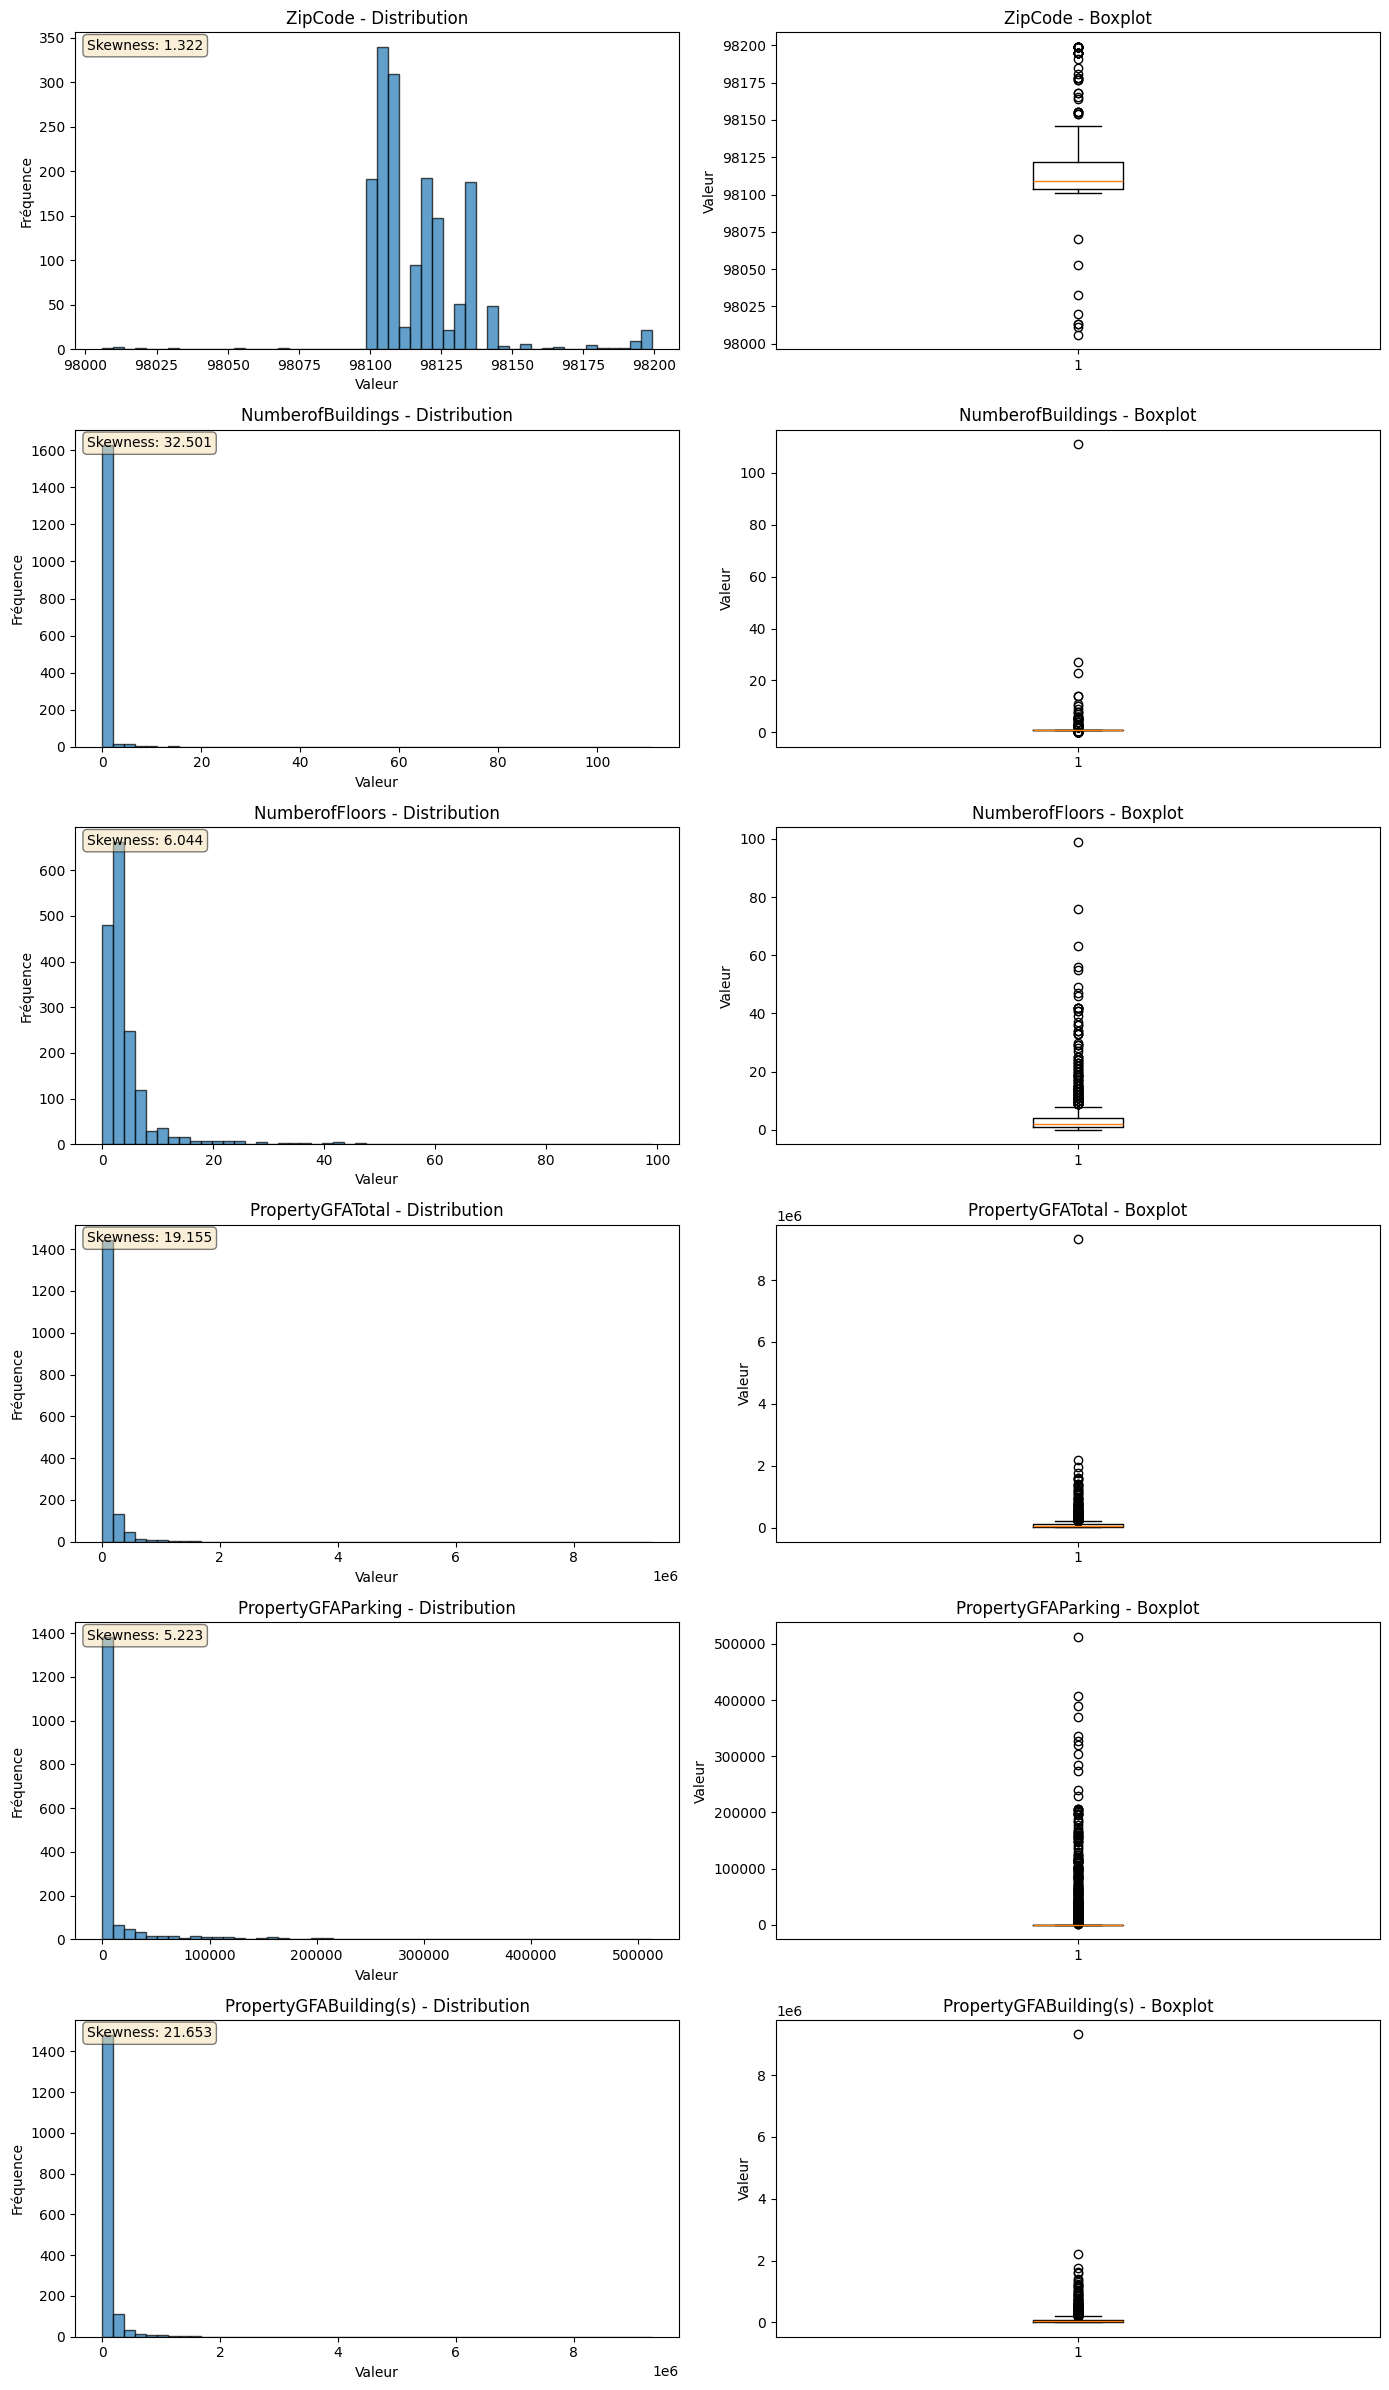

In [30]:
# ===============================================================================
# 3.2 DIAGNOSTIC VISUEL DES VARIABLES ASYMÉTRIQUES
# ===============================================================================

# Extraction des colonnes identifiées par l'analyse statistique (Skewness > 1.0)
cols_log = recommandations['necesitan_log']

if cols_log:
    print(f"📊 Analyse visuelle des {len(cols_log)} variables à forte asymétrie :")
    # Affichage des distributions pour valider la nécessité d'une transformation LOG
    cleaner_global.visualizar_distribuciones(cleaner_global.df, cols_log)
else:
    print("✅ Aucune variable à forte asymétrie détectée.")

#### Transformation LOG

**A. Pour la transformation LOG (colonnes_log)** :
Choisissez les colonnes qui remplissent ces 3 conditions après avoir observé votre graphique précédent :

- **Asymétrie visuelle** : L'histogramme présente une « queue » très longue vers la droite.

- **Échelles très différentes** : Des données allant de petites valeurs jusqu'à des millions (comme la consommation d'énergie ou la surface brute de plancher GFA). Le Log comprime ces échelles.

- **Relation Non Linéaire** : Si vous pensez que l'effet de la variable est multiplicatif et non additif.

- **Astuce** : Presque toujours, toutes les variables d'Énergie et de Surface (GFA) nécessitent un Log.


In [31]:
# ======================================================================================================================
# EXÉCUTION DE LA TRANSFORMATION LOGARITHMIQUE
# ======================================================================================================================

# --- OPTION 1 : MODE AUTOMATIQUE (RECOMMANDÉ) -------------------------------------------------------------------------
# Utilise le seuil par défaut (Skewness > 1.0) pour traiter toutes les variables asymétriques.
cleaner_global.transformation_logarithmique()

# --- OPTION 2 : MODE DIRIGÉ (CIBLÉ) -----------------------------------------------------------------------------------
# Force la transformation uniquement sur les colonnes détectées lors de l'analyse préalable.
# cleaner_global.transformation_logarithmique(colonnes=cols_log, auto_detect=False)

# --- OPTION 3 : MODE AJUSTÉ (AGRESSIF) --------------------------------------------------------------------------------
# Abaisse le seuil à 0.75 pour capturer des variables modérément asymétriques.
# cleaner_global.transformation_logarithmique(skew_threshold=0.75)

# --- OPTION 4 : MODE MANUEL (SÉLECTION EXPERTE) -----------------------------------------------------------------------
# Utilise votre liste personnalisée 'colonnes_a_log' définie précédemment. 
# C'est l'approche la plus rigoureuse selon Yann LeCun pour éviter de transformer des IDs ou des codes.
# cleaner_global.transformation_logarithmique(colonnes=colonnes_a_log, auto_detect=False)


ÉTAPE 3.1 : TRANSFORMATION LOGARITHMIQUE
Méthode..................: Auto-détection
Seuil de skewness........: |skew| > 1.0
Colonnes transformées....: 21

  • ZipCode                                  → ZipCode_log
    Skewness avant.......:    1.322
    Skewness après.......:    1.320
    Amélioration.........:    0.003

  • NumberofBuildings                        → NumberofBuildings_log
    Skewness avant.......:   32.501
    Skewness après.......:    5.543
    Amélioration.........:   26.958

  • NumberofFloors                           → NumberofFloors_log
    Skewness avant.......:    6.044
    Skewness après.......:    1.312
    Amélioration.........:    4.732

  • PropertyGFATotal                         → PropertyGFATotal_log
    Skewness avant.......:   19.155
    Skewness après.......:    1.081
    Amélioration.........:   18.075

  • PropertyGFAParking                       → PropertyGFAParking_log
    Skewness avant.......:    5.223
    Skewness après.......:    1.558
    A

#### Visualisation APRES

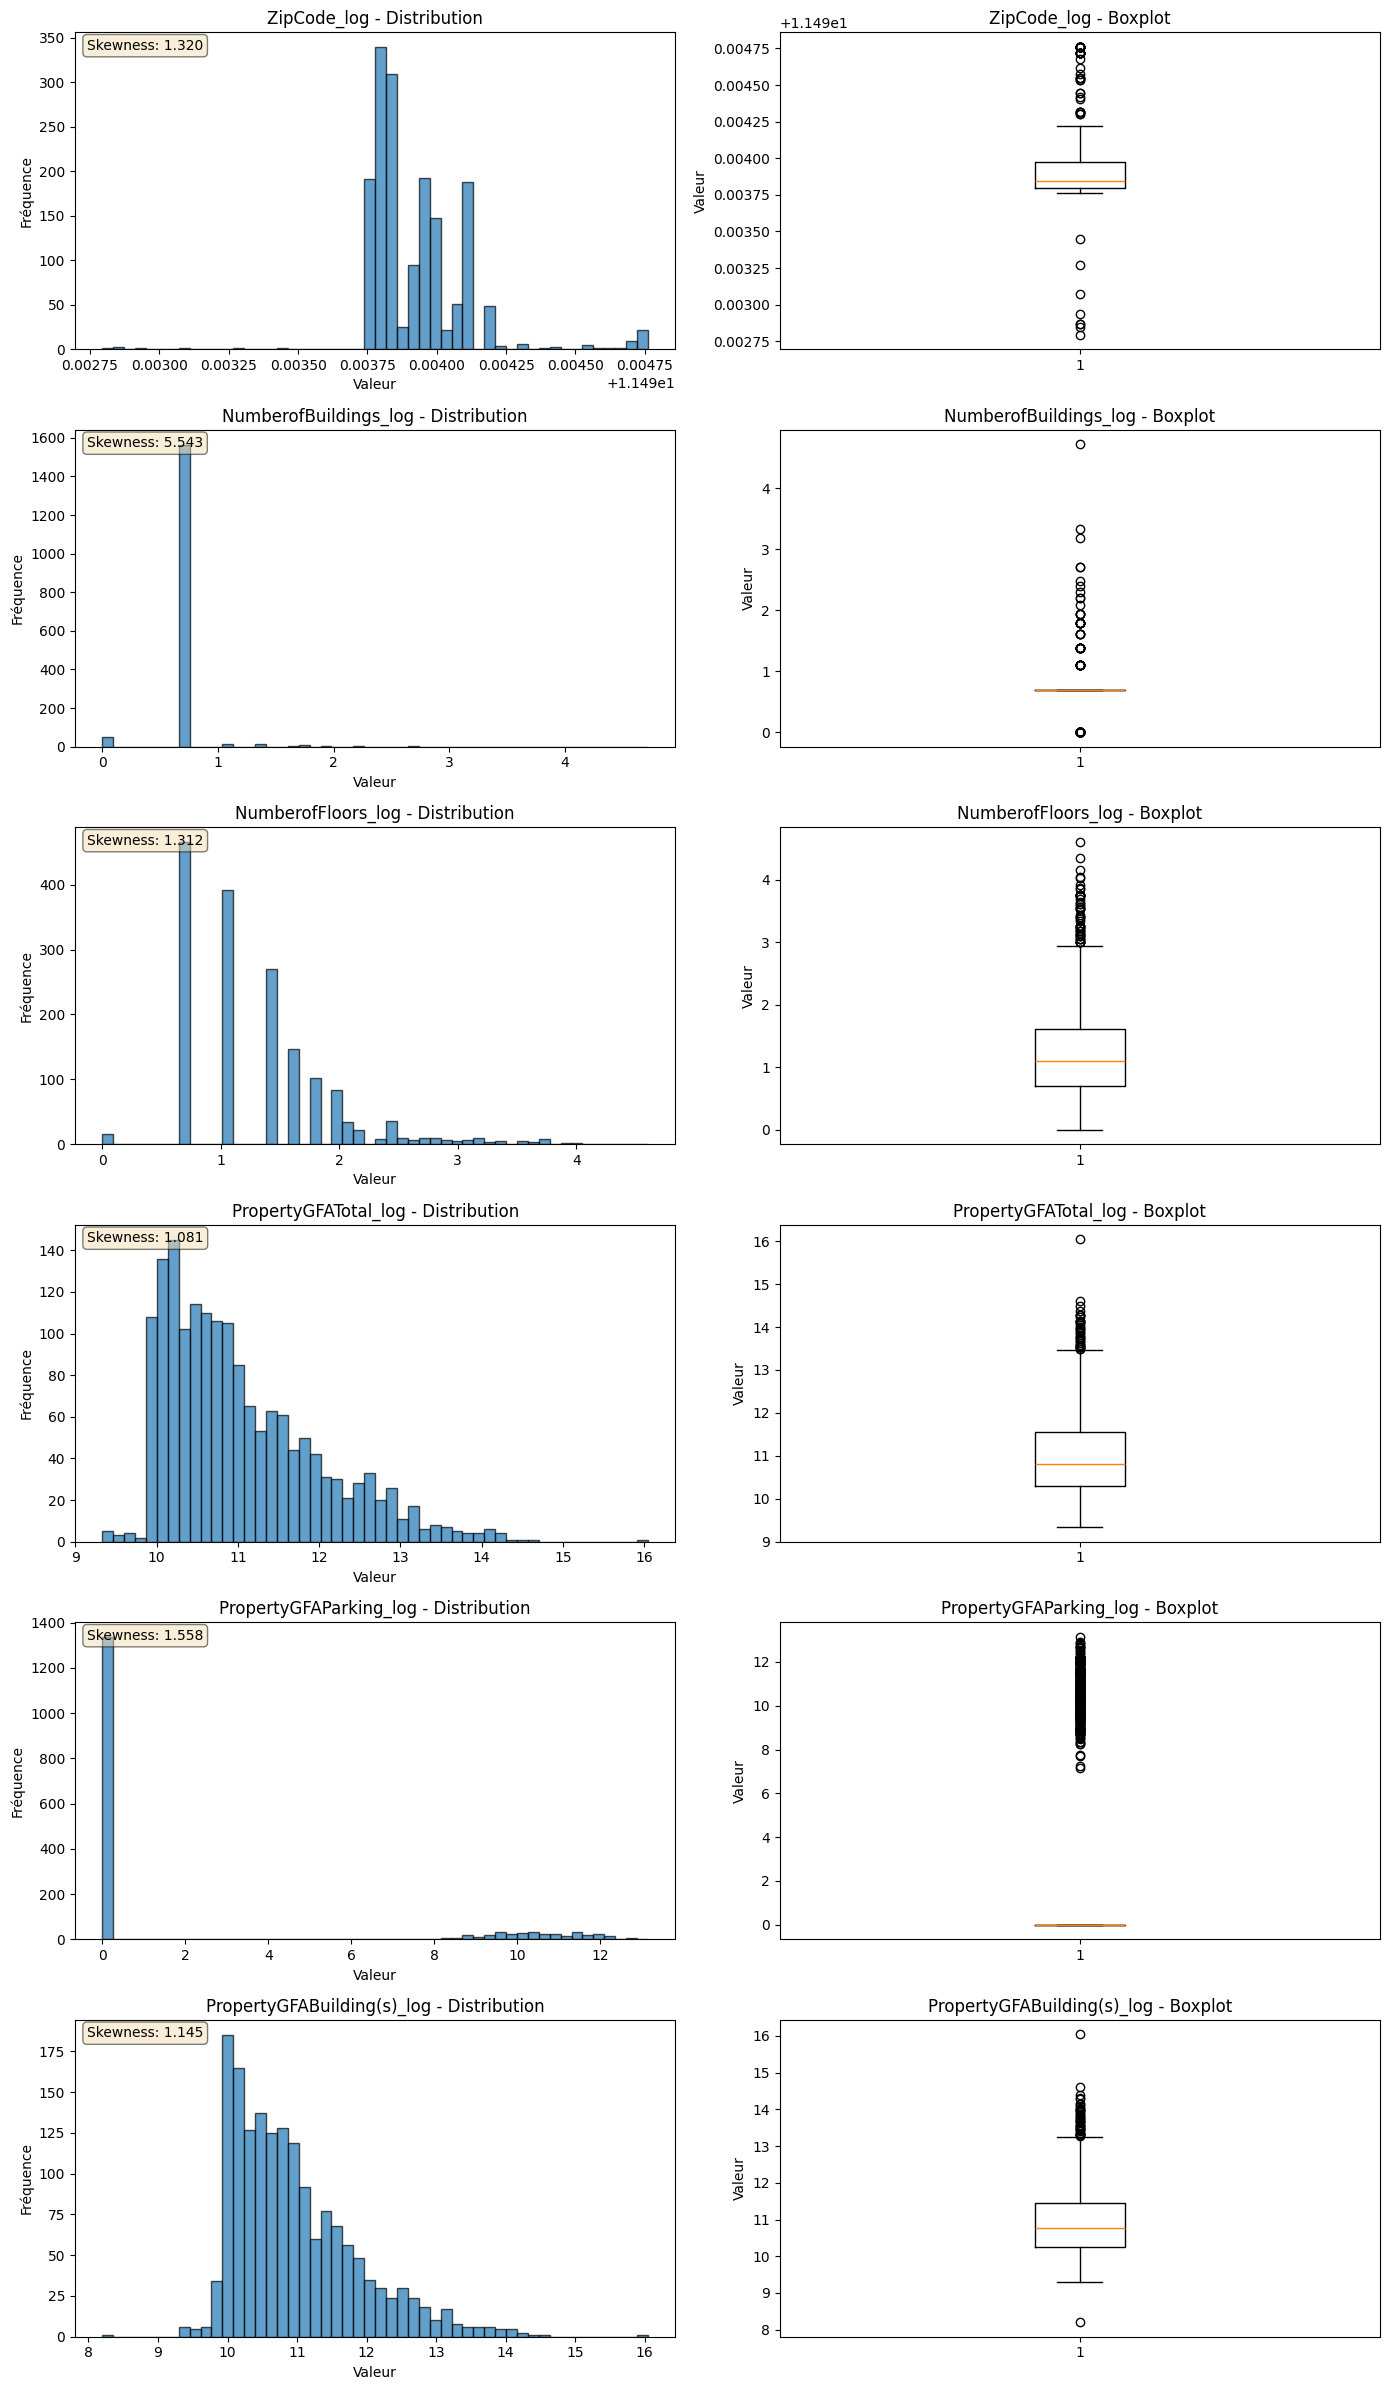

In [32]:
# 2. Verificar visualmente las nuevas columnas (las que terminan en _log)
cols_log_actuales = [c for c in cleaner_global.df.columns if c.endswith('_log')]
cleaner_global.visualizar_distribuciones(cleaner_global.df, cols_log_actuales)

### 3.3. Winsorisation/Écrêtage: Capper les valeurs aux percentiles 1% et 99%.

#### Visualisation AVANT (Recommendations)


📊 ANALYSE VISUELLE DES VARIABLES À FORT TAUX D'OUTLIERS (>5%) :
   Nombre de variables critiques identifiées : 21


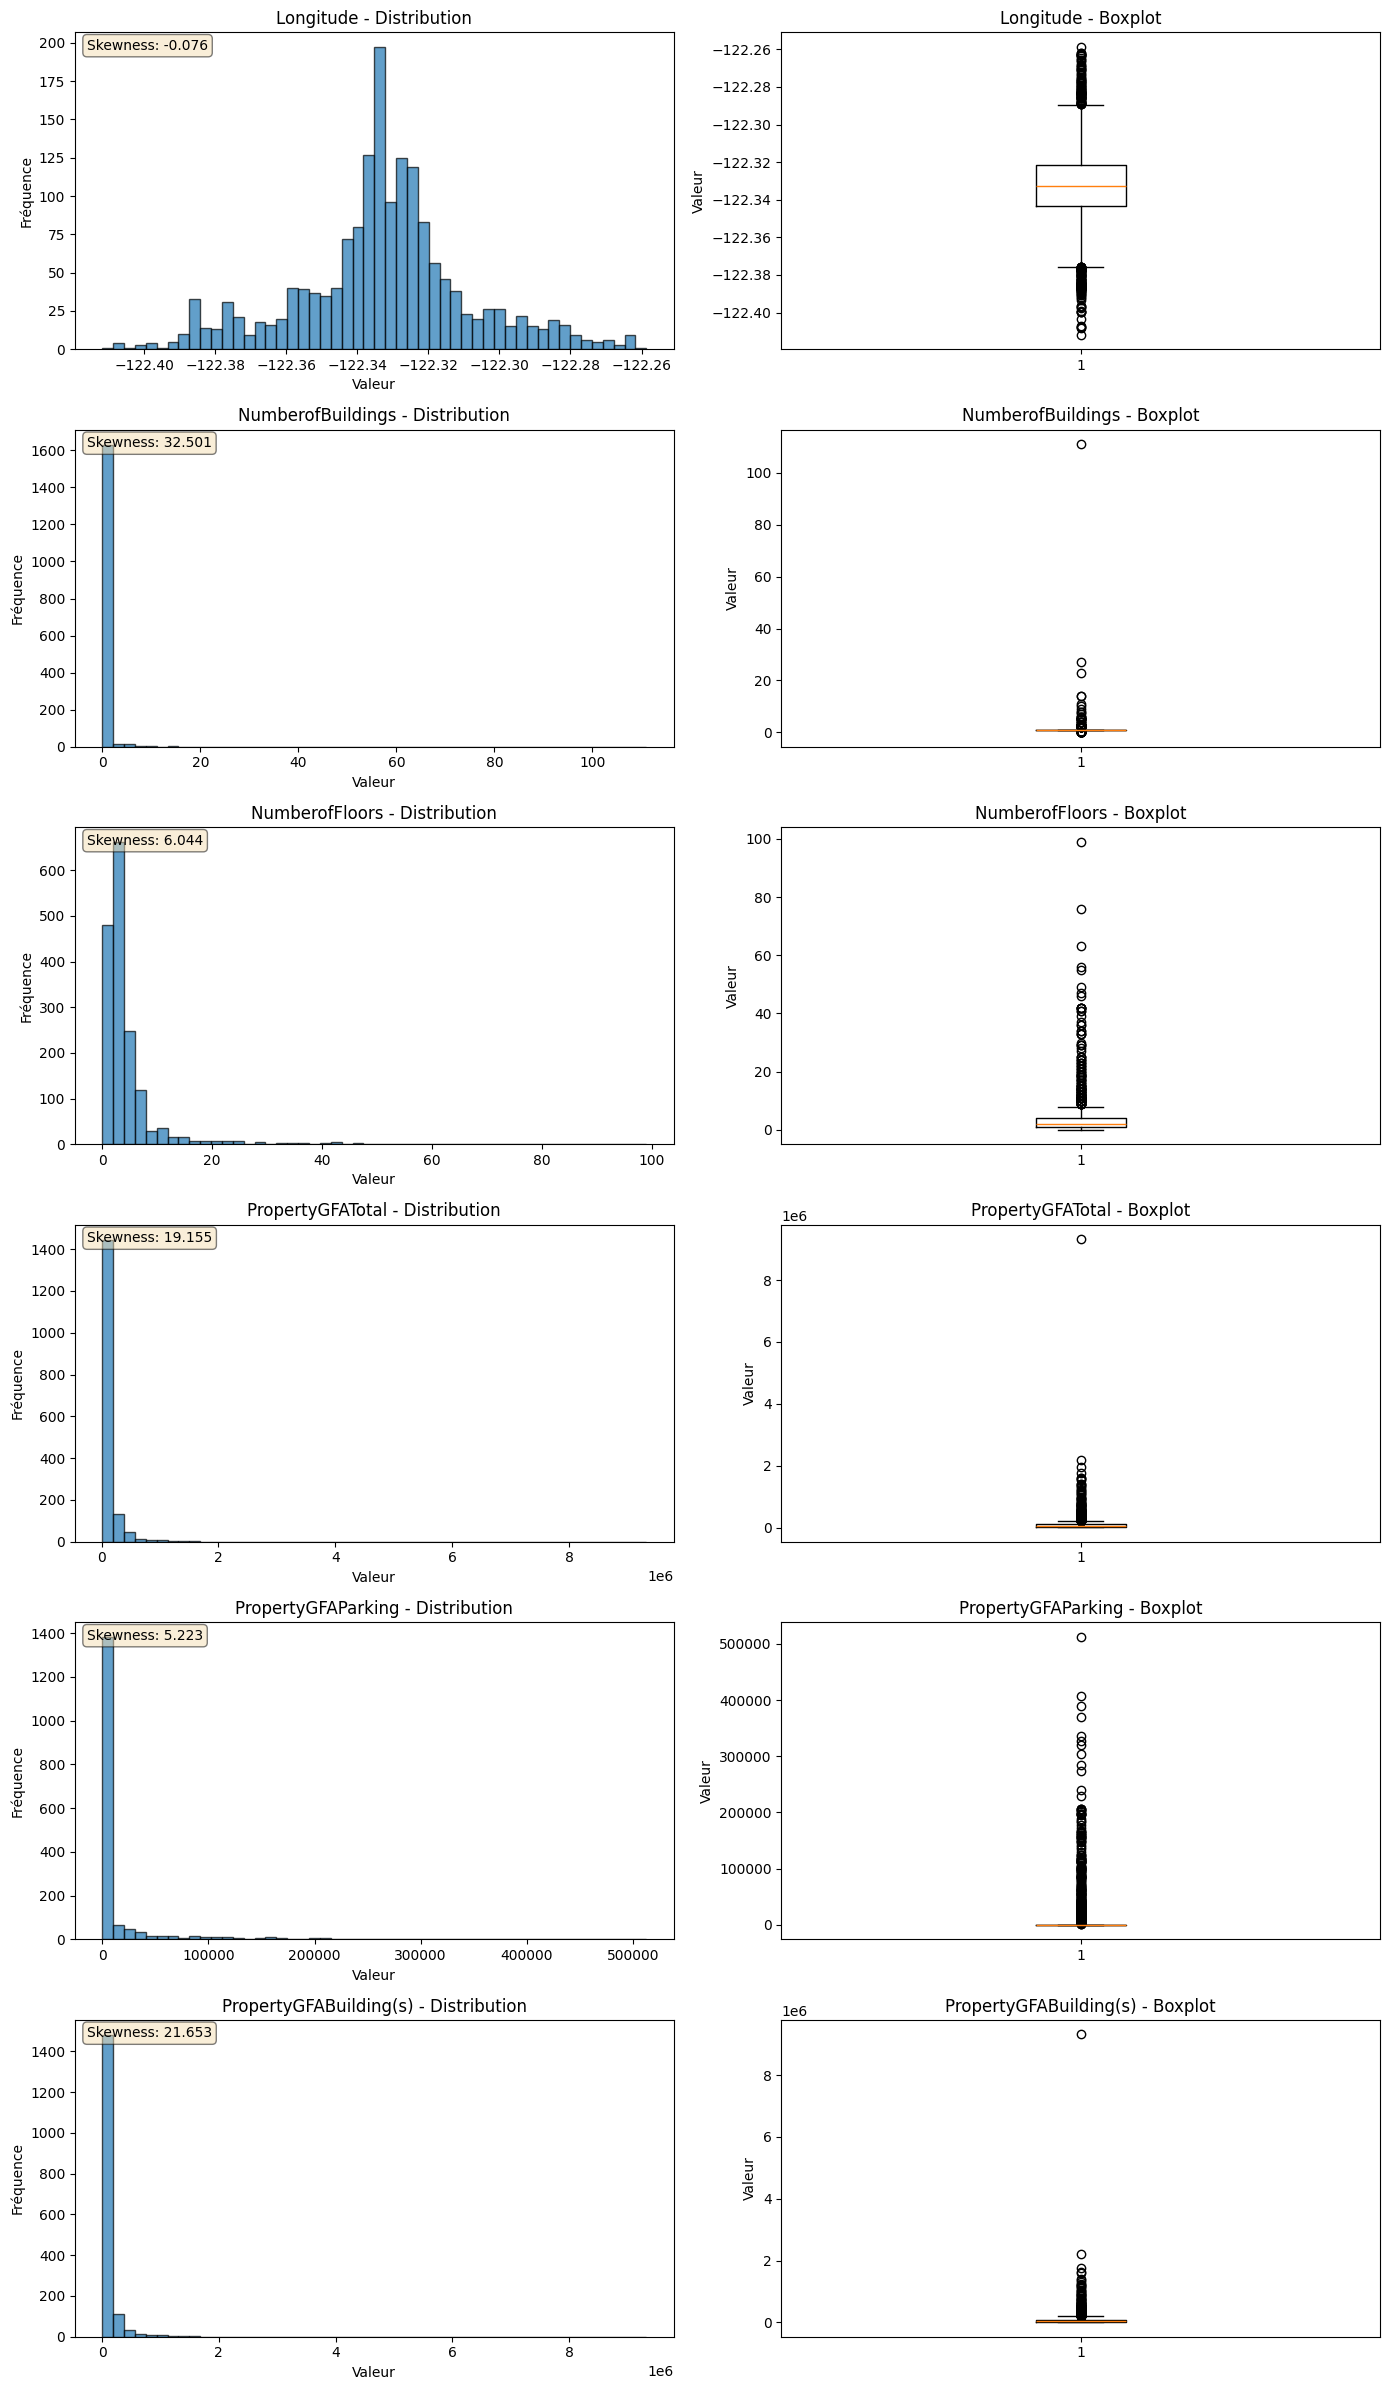

In [33]:
# ======================================================================================================================
# DIAGNOSTIC VISUEL DES VALEURS ABERRANTES (OUTLIERS)
# ======================================================================================================================

# Extraction des colonnes identifiées par l'analyse comme ayant un taux d'outliers > 5%
# L'analyse utilise généralement l'Intervalle Interquartile (IQR) pour cette détection.
cols_wins = recommandations['necesitan_winsorisation']

if cols_wins:
    print(f"\n📊 ANALYSE VISUELLE DES VARIABLES À FORT TAUX D'OUTLIERS (>5%) :")
    print(f"   Nombre de variables critiques identifiées : {len(cols_wins)}")
    
    # Visualisation pour évaluer l'étalement des données avant l'écrêtage (Winsorisation)
    cleaner_global.visualizar_distribuciones(cleaner_global.df, cols_wins) 
else:
    print("\n✅ AUCUNE ANOMALIE MAJEURE : Aucun taux critique d'outliers n'a été détecté.")    

#### Transformation WINSORISATION

**Pour la WINSORISATION (colonnes_winsorisation)** :
Utilisez-la sur les colonnes où :

- **Valeurs aberrantes extrêmes** : Vous avez des bâtiments qui sont des « monstres » (ex. : un stade vs. une petite boutique) qui faussent la moyenne.

- **Erreur de mesure probable** : Des valeurs qui semblent physiquement impossibles, mais que vous ne voulez pas supprimer en supprimant toute la ligne.

- **Distribution « Presque » Normale** : Si la variable est assez symétrique mais possède quelques points très éloignés, utilisez la Winsorisation. Si elle est très asymétrique, essayez d'abord le LOG ; parfois, le Log élimine le besoin de winsoriser.

In [34]:
# ======================================================================================================================
# EXÉCUTION DE LA WINSORISATION (TRAITEMENT DES VALEURS ABERRANTES)
# ======================================================================================================================

# --- MODE 1 : APPEL 100% AUTOMATIQUE ----------------------------------------------------------------------------------
# Traite toutes les variables numériques (exclut automatiquement les indicateurs _Manquant et les versions _log).
# Idéal pour un nettoyage global rapide.
cleaner_global.winsorisation(percentile_bas=0.01, percentile_haut=0.99)

# --- MODE 2 : BASÉ SUR LES RECOMMANDATIONS ----------------------------------------------------------------------------
# Utilise la liste 'cols_outliers' générée par l'analyseur pour un ciblage précis.
# cols_outliers = recommandations['necesitan_winsorisation']
# cleaner_global.winsorisation(colonnes=cols_outliers)


# --- MODE 3 : MANUEL ET EXPERT (SÉLECTION PRÉCISE) --------------------------------------------------------------------
# Utilise votre liste 'colonnes_a_winsoriser'. 
# Note : Un percentile_haut de 0.95 est plus agressif si le 0.99 laisse encore trop de bruit.
# ----------------------------------------------------------------------------------------------------------------------
# cleaner_global.winsorisation(
#     colonnes        = colonnes_a_winsoriser, 
#     percentile_bas  = 0.01, 
#     percentile_haut = 0.95, 
#     inplace         = False
# )


ÉTAPE 3.2 : WINSORISATION/ÉCRÊTAGE
Percentiles..............: 1% - 99%
Mode.....................: Nouvelles colonnes
Colonnes traitées........: 25

  • ZipCode → ZipCode_wins
    Bornes...............: [98101.00, 98199.00]
    Valeurs cappées......: 8 (0.48%)
      - Bas (< 98101.00)...: 8
      - Haut (> 98199.00).: 0

  • CouncilDistrictCode → CouncilDistrictCode_wins
    Bornes...............: [1.00, 7.00]
    Valeurs cappées......: 0 (0.00%)
      - Bas (< 1.00)...: 0
      - Haut (> 7.00).: 0

  • Latitude → Latitude_wins
    Bornes...............: [47.52, 47.73]
    Valeurs cappées......: 34 (2.04%)
      - Bas (< 47.52)...: 17
      - Haut (> 47.73).: 17

  • Longitude → Longitude_wins
    Bornes...............: [-122.39, -122.27]
    Valeurs cappées......: 34 (2.04%)
      - Bas (< -122.39)...: 17
      - Haut (> -122.27).: 17

  • YearBuilt → YearBuilt_wins
    Bornes...............: [1900.00, 2014.00]
    Valeurs cappées......: 7 (0.42%)
      - Bas (< 1900.00)...: 0
      -

#### Visualisation APRES

📊 Visualisation des 25 colonnes après Winsorisation (Lissage des outliers) :


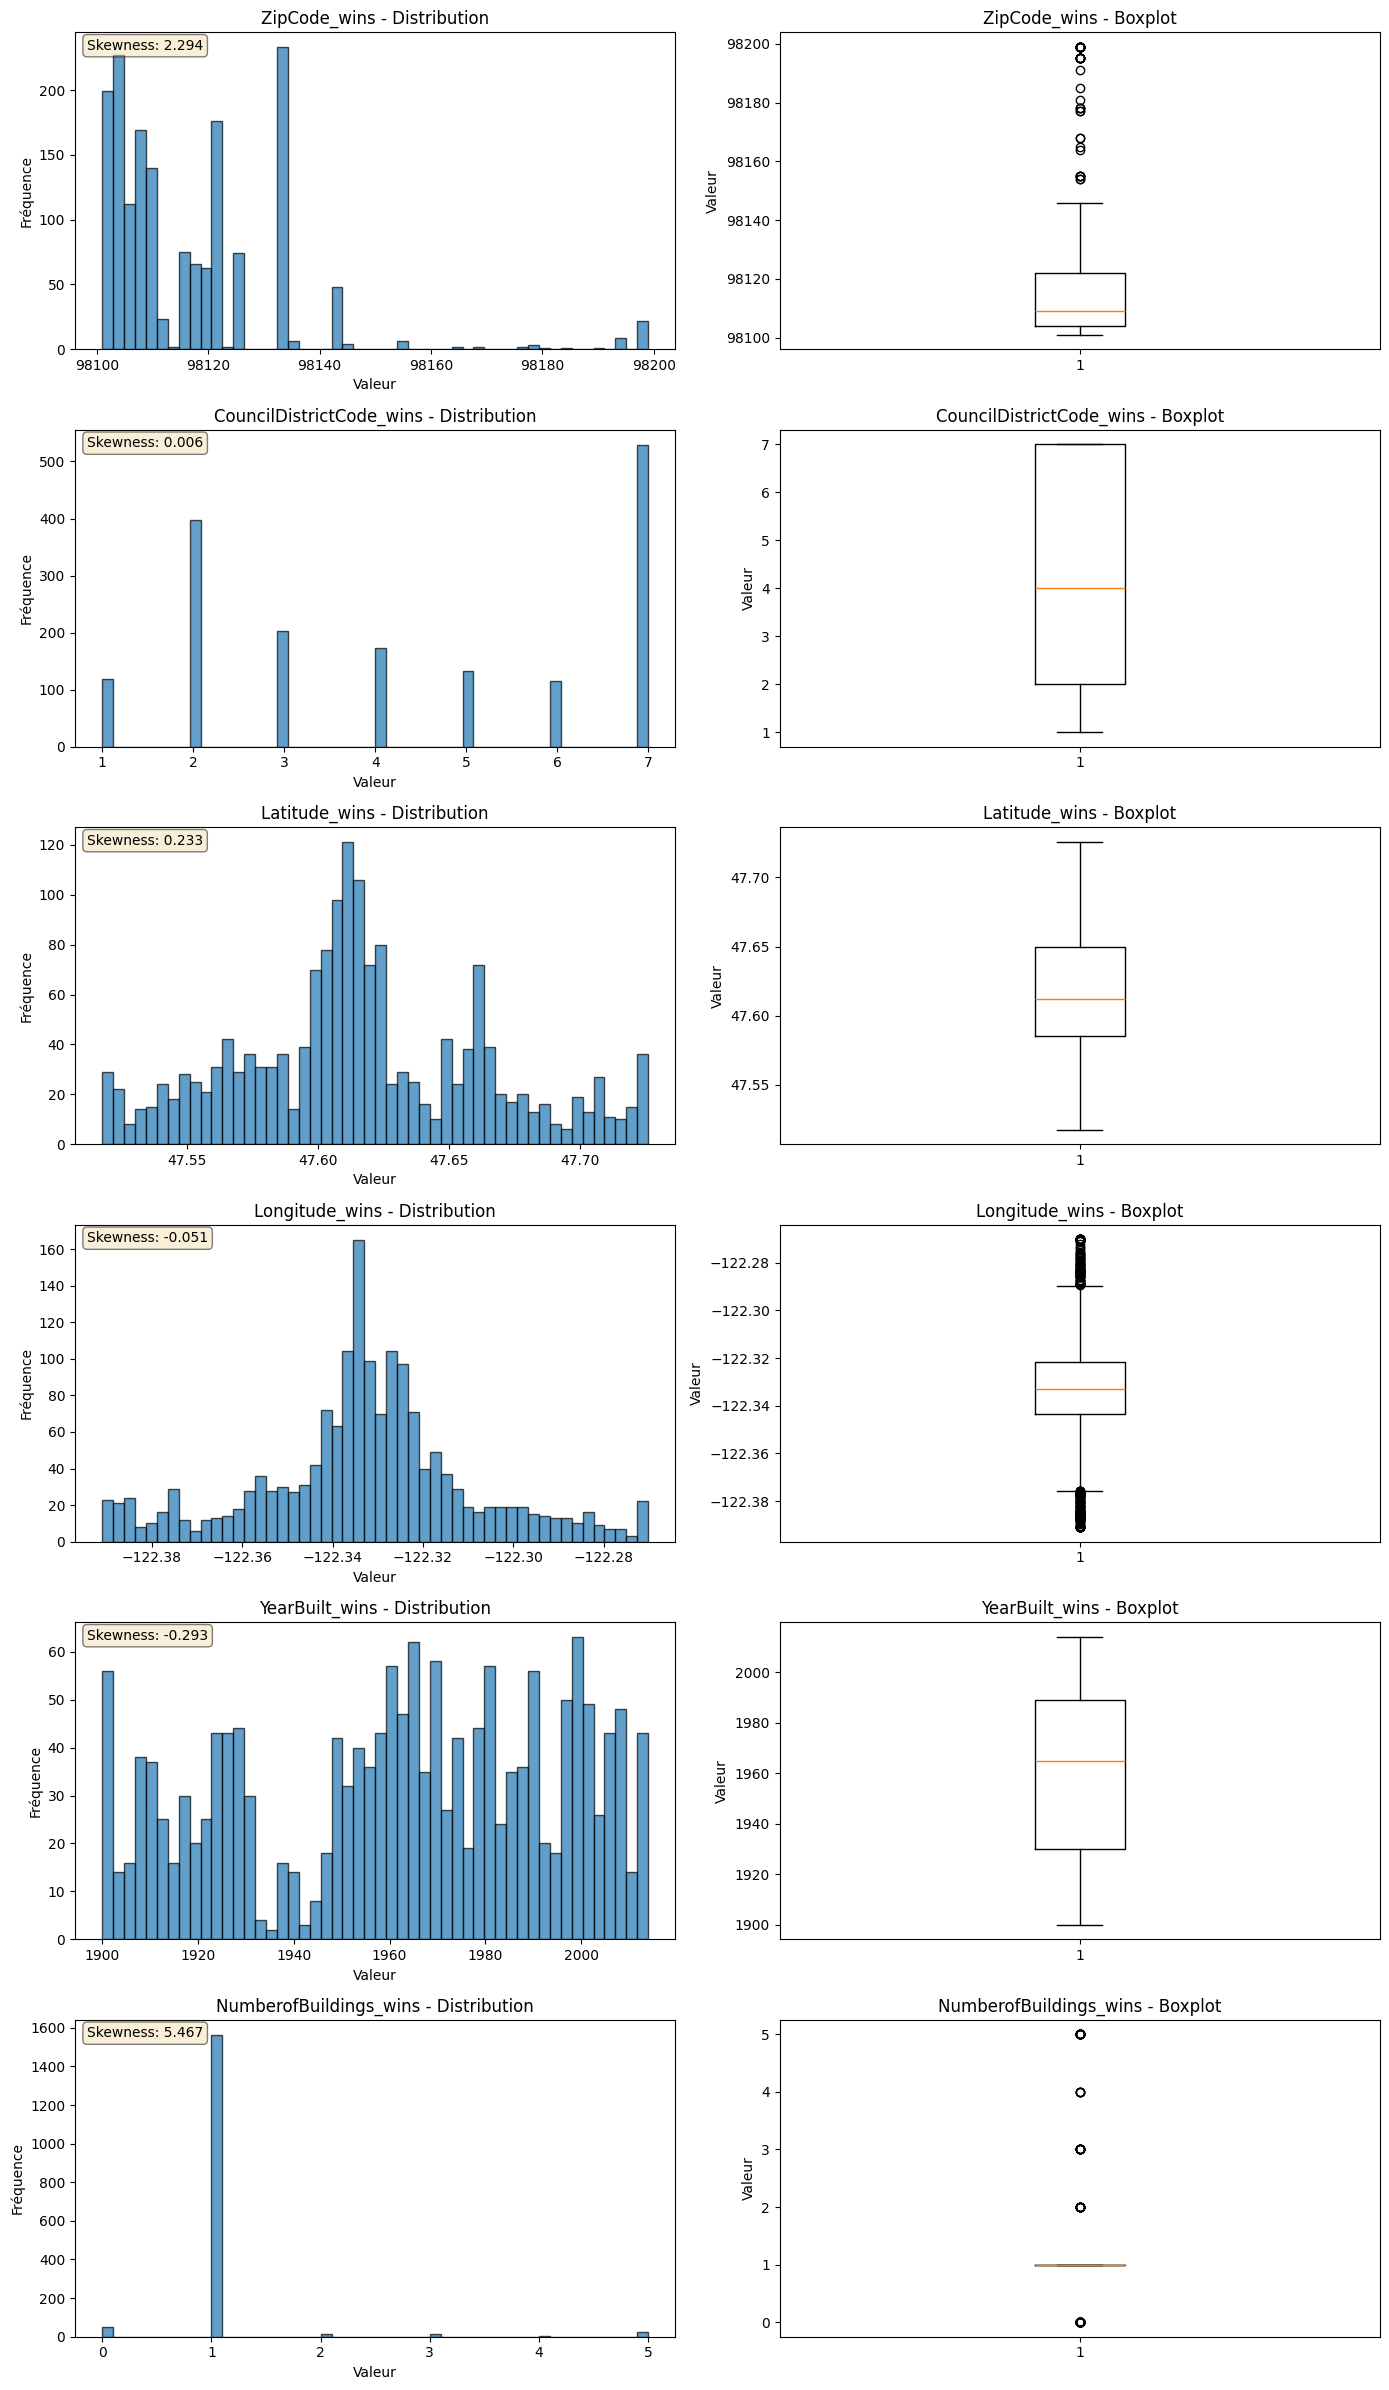

In [35]:
# ======================================================================================================================
# AUDIT VISUEL APRÈS WINSORISATION (VÉRIFICATION DU LISSAGE)
# ======================================================================================================================

# 1. Identification des colonnes ayant subi un écrêtage (suffixe '_wins')
# ----------------------------------------------------------------------------------------------------------------------
cols_wins_actuales = [c for c in cleaner_global.df.columns if c.endswith('_wins')]

# 2. Visualisation des nouvelles distributions lissées
# ----------------------------------------------------------------------------------------------------------------------
if cols_wins_actuales:
    print(f"📊 Visualisation des {len(cols_wins_actuales)} colonnes après Winsorisation (Lissage des outliers) :")
    # On observe ici si les "queues" de distribution ont été ramenées vers les percentiles limites
    cleaner_global.visualizar_distribuciones(cleaner_global.df, cols_wins_actuales)
else:
    print("⚠️ Aucune colonne avec le suffixe '_wins' n'a été trouvée. Vérifiez l'application de l'étape précédente.")

In [36]:
# RE VERIFICATRION
recomendaciones = cleaner_global.analizar_asimetria_y_outliers(cleaner_global.df)



ANÁLISIS PREVIO: DETECCIÓN DE ASIMETRÍA Y OUTLIERS

RÉSUMÉ DES RECOMMANDATIONS:
--------------------------------------------------------------------------------
Variables nécessitant LOG........: 57
Variables nécessitant WINSORISATION: 50


DÉTAIL PAR VARIABLE:
--------------------------------------------------------------------------------
Colonne                               Skewness  Outliers%   LOG  WINS
--------------------------------------------------------------------------------
NumberofBuildings                       32.501      6.29%     ✓     ✓
LargestPropertyUseTypeGFA               23.319     10.49%     ✓     ✓
NaturalGas(kBtu)                        22.111     11.03%     ✓     ✓
PropertyGFABuilding(s)                  21.653     10.85%     ✓     ✓
Electricity(kBtu)                       20.862     11.57%     ✓     ✓
PropertyGFATotal                        19.155     12.17%     ✓     ✓
SteamUse(kBtu)                          19.152      6.83%     ✓     ✓
SiteEnergyUse(k

### 3.4. RAPPORT DE ASYMETRIE ET OUTLIERS

In [37]:
print("\n============================================================================")
print("RESUMEN DES TRANSFORMATIONS APLIQUES")
print("============================================================================")

resumen = cleaner_global.obtener_resumen_transformaciones()
print(resumen)

print("\n============================================================================")
print("GENERER RAPPORT COMPLET")
print("============================================================================")

rapport = cleaner_global.generer_rapport_etapes([3])
print(rapport.to_string(index=False))

print("\n============================================================================")
print("SAUVEGARDE INTERMÉDIAIRE")
print("============================================================================")
info_sauvegarde = cleaner_global.save_stage("df_etape_3")
print(info_sauvegarde)



RESUMEN DES TRANSFORMATIONS APLIQUES

RÉSUMÉ DES TRANSFORMATIONS ÉTAPE 3

TRANSFORMATIONS LOGARITHMIQUES:
--------------------------------------------------------------------------------
  • ZipCode → ZipCode_log
    Skewness: 1.322 → 1.32 (amélioration: 0.003)
  • NumberofBuildings → NumberofBuildings_log
    Skewness: 32.501 → 5.543 (amélioration: 26.958)
  • NumberofFloors → NumberofFloors_log
    Skewness: 6.044 → 1.312 (amélioration: 4.732)
  • PropertyGFATotal → PropertyGFATotal_log
    Skewness: 19.155 → 1.081 (amélioration: 18.075)
  • PropertyGFAParking → PropertyGFAParking_log
    Skewness: 5.223 → 1.558 (amélioration: 3.666)
  • PropertyGFABuilding(s) → PropertyGFABuilding(s)_log
    Skewness: 21.653 → 1.145 (amélioration: 20.508)
  • LargestPropertyUseTypeGFA → LargestPropertyUseTypeGFA_log
    Skewness: 23.319 → 0.889 (amélioration: 22.43)
  • SecondLargestPropertyUseTypeGFA → SecondLargestPropertyUseTypeGFA_log
    Skewness: 5.953 → -3.059 (amélioration: 2.894)
  • Third

## 4. 👤 Création de Nouvelles Features


**3. Constantes de "Maille" (Seuils de Groupement)**

Ces constantes vont servir à ton code pour automatiser le **Binning** ou le **Target Encoding**.

```python
# Seuils pour la maille "Taille du bâtiment" (en pieds carrés - sqft)
SURFACE_SMALL_THRESHOLD = 20000 
SURFACE_LARGE_THRESHOLD = 100000

# Paramètre de lissage pour le Target Encoding (Maille Quartier/Usage)
SMOOTHING_VAL = 10.0

# Rayons pour la maille "Densité urbaine" (en mètres)
RADII_METERS = [500, 1000, 2000]

```

** Quelles opérations de Feature Engineering lancer avec ces constantes ?**

Voici une proposition de feuille de route pour tes différentes mailles :

| Maille | Opération proposée | Feature créée |
| --- | --- | --- |
| **Bâtiment** | Log-transformation | `log_SiteEnergyUse` (pour réduire l'asymétrie) |
| **Spatiale** | Distance Euclidienne/Haversine | `dist_to_port`, `dist_to_center` |
| **Densité** | Comptage par voisinage | `building_density_500m` |
| **Typologie** | Ratio de surface | `parking_ratio` (`GFAParking` / `GFATotal`) |
| **Énergie** | Décomposition | `electricity_ratio` (`Electricity` / `SiteEnergyUse`) |

**Le conseil d'expert (Nivel Yann LeCun) :**

Le ratio de surface (`parking_ratio`) est souvent négligé. Pourtant, un bâtiment avec 50% de parking ne consomme pas du tout de la même manière qu'un bâtiment 100% bureaux. C'est une **"maille de structure"** très puissante.

✅ 1. Diversité d'usage (améliorée)

Calculée par le nombre d'usages secondaires y tertiaires non nuls

Usage_Diversity = count_non_INCONNU(Second, Third)

✅ 2. Ratio de parking

Proportion de la surface dédiée au stationnement par rapport à la surface totale

Parking_Ratio = PropertyGFAParking / PropertyGFATotal

✅ 3. Indicateur de parking

Variable booléenne indiquant la présence d'une zone de stationnement

Has_Parking = (PropertyGFAParking > 0)

✅ 4. ENERGYSTARScore catégoriel (conserver également le format continu)

Transformation du score en classes (binning)

ENERGYSTARScore_Category = binning(ENERGYSTARScore)

✅ 5. Indice d'efficacité relative (plus utile que GHG_Density)

Performance énergétique normalisée par la moyenne

Energy_Efficiency_Index = SiteEUI / SiteEUI.mean()

✅ 6. Ratio d'usage principal  

Concentration de l'activité sur l'usage majeur du bâtiment

Primary_Use_Ratio = LargestPropertyUseTypeGFA / PropertyGFATotal

### 4.1. Diversité d'usage (Usage_Diversity = count_non_INCONNU(Second, Third))

In [ ]:
# Ajout de la Diversité d'Usage pondérée (0=Mono, 1=Bi, 3=Multi)
cleaner_global.ajouter_feature(
    nom    = 'F1_Usage_Complexity_Score',
    calcul = lambda df: (
        df['SecondLargestPropertyUseType'].notna().astype(int) + 
        df['ThirdLargestPropertyUseType'].notna().astype(int)
    ).replace(2, 3),
    description = "Score de complexité : 0 (mono), 1 (bi), 3 (multi-usage)",
    dtype  = int
)

### 4.1 Distance_Centre_m Distance_Port_m

In [38]:
# Ajout de la distance au Centre de Seattle
cleaner_global.ajouter_feature(
    nom         = 'F1_Distance_Centre_m',
    calcul      = lambda df: pd.Series(
        calculer_distances_points_cles(
            df, 
            col_lat = 'Latitude', 
            col_lon = 'Longitude'
        )[0],                                 # Index 0 pour le Centre
        index   = df.index                    # Important : garder le même index
    ),
    description = "Distance en km par rapport à l'Hôtel de Ville (Downtown)",
    dtype       = float
)


  Aperçu dist. Centre.: ['511.41 m', '580.88 m', '693.71 m']
  Aperçu dist. Port...: ['3236.84 m', '3423.71 m', '3422.33 m']
✅ Feature créée: F1_Distance_Centre_m
   Description: Distance en km par rapport à l'Hôtel de Ville (Downtown)
   Type: float64, Unique: 1599, Missing: 0


### 4.2 Distance_Port_m

In [39]:
# Ajout de la distance au Port de Seattle
cleaner_global.ajouter_feature(
    nom         = 'F2_Distance_Port_m',
    calcul      = lambda df: pd.Series(
        calculer_distances_points_cles(
            df, 
            col_lat = 'Latitude', 
            col_lon = 'Longitude'
        )[1],                                 # Index 1 pour le Port
        index   = df.index                    # Important : garder le même index
    ),
    description = "Distance en km par rapport à la zone portuaire industrielle",
    dtype       = float
)

  Aperçu dist. Centre.: ['511.41 m', '580.88 m', '693.71 m']
  Aperçu dist. Port...: ['3236.84 m', '3423.71 m', '3422.33 m']
✅ Feature créée: F2_Distance_Port_m
   Description: Distance en km par rapport à la zone portuaire industrielle
   Type: float64, Unique: 1599, Missing: 0


### 4.3 Densite_Voisinage_{rayon}m

In [40]:
# ##############################################################################
# ÉTAPE : GÉNÉRATION AUTOMATISÉE DES MAILLES DE DENSITÉ
# ##############################################################################

# Rayons pour la maille "Densité urbaine" (en mètres)
RADII_METERS = [500, 1000, 1500, 2000]

for rayon in RADII_METERS:
    nom_feature = f'F3_Densite_Voisinage_{rayon}m'
    
    cleaner_global.ajouter_feature(
        nom         = nom_feature,
        calcul      = lambda df, r=rayon: pd.Series(
            calculer_densite_voisinage(df, rayon_m=r),
            index   = df.index
        ),
        description = f"Nombre de bâtiments voisins dans un rayon de {rayon}m",
        dtype       = int
    )

  Aperçu densité 500m.: [np.int64(111), np.int64(92), np.int64(96)]
✅ Feature créée: F3_Densite_Voisinage_500m
   Description: Nombre de bâtiments voisins dans un rayon de 500m
   Type: int64, Unique: 123, Missing: 0
  Aperçu densité 1000m.: [np.int64(268), np.int64(273), np.int64(269)]
✅ Feature créée: F3_Densite_Voisinage_1000m
   Description: Nombre de bâtiments voisins dans un rayon de 1000m
   Type: int64, Unique: 293, Missing: 0
  Aperçu densité 1500m.: [np.int64(448), np.int64(457), np.int64(442)]
✅ Feature créée: F3_Densite_Voisinage_1500m
   Description: Nombre de bâtiments voisins dans un rayon de 1500m
   Type: int64, Unique: 406, Missing: 0
  Aperçu densité 2000m.: [np.int64(577), np.int64(587), np.int64(571)]
✅ Feature créée: F3_Densite_Voisinage_2000m
   Description: Nombre de bâtiments voisins dans un rayon de 2000m
   Type: int64, Unique: 483, Missing: 0


### 4.4 Taille_Batiment_Ordinale 

In [41]:
# Seuils pour la maille "Taille du bâtiment" (en pieds carrés - sqft)
SURFACE_SMALL_THRESHOLD = 20000 
SURFACE_LARGE_THRESHOLD = 100000

# ##############################################################################
# ÉTAPE : GÉNÉRATION DES MAILLES DE TAILLE (BINNING)
# ##############################################################################

cleaner_global.ajouter_feature(
    nom         = 'F4_Taille_Batiment_Ordinale',
    calcul      = lambda df: pd.cut(
        df['PropertyGFATotal'],
        bins    = [0, SURFACE_SMALL_THRESHOLD, SURFACE_LARGE_THRESHOLD, np.inf],
        labels  = ['Petit', 'Moyen', 'Grand']
    ),
    description = f"Catégorie de taille (Seuils: {SURFACE_SMALL_THRESHOLD} et {SURFACE_LARGE_THRESHOLD} sqft)",
    dtype       = 'category'
)

# ##############################################################################
# ÉTAPE : CONVERSION NUMÉRIQUE DES MAILLES DE TAILLE
# ##############################################################################

# Définition du dictionnaire de correspondance
MAP_TAILLE = {
    'Petit' : 0,
    'Moyen' : 1,
    'Grand' : 2
}

# Application de la transformation
cleaner_global.ajouter_feature(
    nom         = 'F4_Taille_Batiment_Ordinale',
    calcul      = lambda df: df['Taille_Batiment_Categorie'].map(MAP_TAILLE),
    description = "Conversion numérique de la taille (0: Petit, 1: Moyen, 2: Grand)",
    dtype       = int
)


        

✅ Feature créée: F4_Taille_Batiment_Ordinale
   Description: Catégorie de taille (Seuils: 20000 et 100000 sqft)
   Type: category, Unique: 3, Missing: 0
⚠️  Feature 'F4_Taille_Batiment_Ordinale' déjà existante - ignorée


### 4.5 Création de 'Usage_Diversity'

In [42]:
# 1. Création de 'Usage_Diversity'
# Calcule si le bâtiment a un usage unique, double ou triple
cleaner_global.ajouter_feature(
    nom='F5_Usage_Diversity',
    calcul=lambda df: (
        (df['SecondLargestPropertyUseType'] != 'INCONNU').astype(int) +
        (df['ThirdLargestPropertyUseType'] != 'INCONNU').astype(int)
    ),
    description="Nombre d'usages additionnels (0=mono, 1=bi, 2=tri-usage)",
    dtype=int
)

✅ Feature créée: F5_Usage_Diversity
   Description: Nombre d'usages additionnels (0=mono, 1=bi, 2=tri-usage)
   Type: int64, Unique: 3, Missing: 0


### 4.6. Ratio de parking (Parking_Ratio = PropertyGFAParking / PropertyGFATotal)

In [43]:
import numpy as np
# Mesure la proportion de la surface dédiée au parking par rapport à la surface totale
cleaner_global.ajouter_feature(
    nom='F6_Parking_Ratio',
    calcul=lambda df: pd.Series(
        np.where(
            df['PropertyGFATotal'] > 0,
            df['PropertyGFAParking'] / df['PropertyGFATotal'],
            0
        ),
        index=df.index # <--- Cerramos el paréntesis de pd.Series AQUÍ
    ).astype('float'), 
    description='Ratio de la surface du parking sur la surface totale',
    dtype=float
)

✅ Feature créée: F6_Parking_Ratio
   Description: Ratio de la surface du parking sur la surface totale
   Type: float64, Unique: 331, Missing: 0


### 4.7 Indicateur de parking (Has_Parking = (PropertyGFAParking > 0))

In [44]:
# Variable binaire indiquant si le bâtiment possède un parking ou non
cleaner_global.ajouter_feature(
    nom='F7_Has_Parking',
    calcul=lambda df: (df['PropertyGFAParking'] > 0).astype(int),
    description='Indicateur binaire de présence de parking (1=Oui, 0=Non)',
    dtype=int
)

✅ Feature créée: F7_Has_Parking
   Description: Indicateur binaire de présence de parking (1=Oui, 0=Non)
   Type: int64, Unique: 2, Missing: 0


### 4.8 Binning: Discrétiser ENERGYSTARScore en catégories ordonnées.

In [45]:
# ENERGYSTARScore_Category (Binning)
# Transforme une variable continue en catégories qualitatives. 
# Très utile pour les modèles d'arbres ou pour l'interprétation métier.
cleaner_global.ajouter_feature(
    nom='F8_ENERGYSTARScore_Category',
    calcul=lambda df: pd.cut(
        df['ENERGYSTARScore'],
        bins=[0, 50, 75, 90, 100],
        labels=['Faible', 'Moyen', 'Bon', 'Excellent'],
        include_lowest=True
    ).astype('category'),
    description='Catégorisation du score ENERGY STAR (Qualitatif)',
    dtype='category'
)

✅ Feature créée: F8_ENERGYSTARScore_Category
   Description: Catégorisation du score ENERGY STAR (Qualitatif)
   Type: category, Unique: 4, Missing: 0


### 4.9. Indice d'efficacité relative (NOUVEAU - plus utile que GHG_Density)

### 4.10. Ratio d'usage principal 

In [46]:
cleaner_global.df = cleaner_global.df.copy()

# Création de 'Primary_Use_Ratio'
# Mesure la dominance de l'usage principal par rapport à la surface totale
cleaner_global.ajouter_feature(
    nom='F10_Primary_Use_Ratio',
    # Si la surface totale (PropertyGFATotal) est > 0 : 
    #   Elle divise la surface de l'usage principal par la surface totale.
    # Si la surface est 0 (donnée erronée) : 
    #   Elle renvoie 0 au lieu de générer une erreur Infini ou un crash.
    calcul=lambda df: pd.Series(
        np.where(
            df['PropertyGFATotal'] > 0,
            df['LargestPropertyUseTypeGFA'] / df['PropertyGFATotal'],
            0
        ),
        index=df.index  # <--- Crucial pour la compatibilité avec DataCleaner
    ).astype('float'), 
    description="Ratio de la surface de l'usage principal sur la surface totale",
    dtype=float
)

✅ Feature créée: F10_Primary_Use_Ratio
   Description: Ratio de la surface de l'usage principal sur la surface totale
   Type: float64, Unique: 1110, Missing: 0


### 4.11 Building_Age (Âge du bâtiment)

In [47]:
# 2. Building_Age (Âge du bâtiment)
# L'âge est souvent plus corrélé à la consommation que l'année de construction brute.
# Note : Nous utilisons 2016 si le dataset correspond à l'année de collecte des données de Seattle.
cleaner_global.ajouter_feature(
    nom='F11_Building_Age',
    calcul=lambda df: 2016 - df['YearBuilt'],
    description='Âge du bâtiment en années (base 2016)',
    dtype=int
)

✅ Feature créée: F11_Building_Age
   Description: Âge du bâtiment en années (base 2016)
   Type: int64, Unique: 113, Missing: 0


### 4.12. Floors_per_Building (Densité verticale moyenne)

In [48]:
# Calcule le nombre moyen d'étages par structure physique sur la propriété.
# Permet de distinguer les campus horizontaux des tours verticales.

cleaner_global.ajouter_feature(
    nom='F12_floors_by_building_mean',
    calcul=lambda df: pd.Series(
        np.where(
            df['NumberofBuildings'] > 0,
            df['NumberofFloors'] / df['NumberofBuildings'],
            df['NumberofFloors'] # Si nb bâtiments est 0 ou inconnu, on garde le nb d'étages total
        ),
        index=df.index
    ).astype('float'),
    description="Nombre moyen d'étages par bâtiment sur la propriété",
    dtype=float
)

✅ Feature créée: F12_floors_by_building_mean
   Description: Nombre moyen d'étages par bâtiment sur la propriété
   Type: float64, Unique: 66, Missing: 0


### 4.7. RAPPORT DE CREATION DE NOUVELLES FEATURES

In [49]:

print("="*80)
print("RAPPORT D'INGÉNIERIE DES CARACTÉRISTIQUES (FEATURE ENGINEERING)")
print("="*80)

# Extraemos las operaciones de la historia que sean de tipo 'ajouter_feature'
features_creadas = [op for op in cleaner_global.history if op['operation'] == 'ajouter_feature']

if features_creadas:
    import pandas as pd
    
    # Creamos una tabla resumen
    resumen_data = []
    for f in features_creadas:
        resumen_data.append({
            'Nom de la Feature': f['feature'],
            'Description': f['description'],
            'Type': f.get('dtype', 'float'),
            'Statut': '✅ Créée'
        })
    
    df_report = pd.DataFrame(resumen_data)
    display(df_report)
    
    # 2. Verificación rápida de valores
    print("\n🔍 Aperçu des nouvelles valeurs :")
    nuevas_cols = [f['feature'] for f in features_creadas]
    display(cleaner_global.df[nuevas_cols].head())
    
    # 3. Verificación de nulos (Crucial para la robustez)
    print("\n🛡️ Vérification des valeurs manquantes dans les nouvelles features :")
    print(cleaner_global.df[nuevas_cols].isnull().sum())

else:
    print("⚠️ Aucune feature n'a été détectée dans l'historique.")

print("="*80)

RAPPORT D'INGÉNIERIE DES CARACTÉRISTIQUES (FEATURE ENGINEERING)


,Nom de la Feature,Description,Type,Statut
0,F1_Distance_Centre_m,Distance en km par rapport à l'Hôtel de Ville (Downtown),float64,✅ Créée
1,F2_Distance_Port_m,Distance en km par rapport à la zone portuaire industrielle,float64,✅ Créée
2,F3_Densite_Voisinage_500m,Nombre de bâtiments voisins dans un rayon de 500m,int64,✅ Créée
3,F3_Densite_Voisinage_1000m,Nombre de bâtiments voisins dans un rayon de 1000m,int64,✅ Créée
4,F3_Densite_Voisinage_1500m,Nombre de bâtiments voisins dans un rayon de 1500m,int64,✅ Créée
5,F3_Densite_Voisinage_2000m,Nombre de bâtiments voisins dans un rayon de 2000m,int64,✅ Créée
6,F4_Taille_Batiment_Ordinale,Catégorie de taille (Seuils: 20000 et 100000 sqft),category,✅ Créée
7,F5_Usage_Diversity,"Nombre d'usages additionnels (0=mono, 1=bi, 2=tri-usage)",int64,✅ Créée
8,F6_Parking_Ratio,Ratio de la surface du parking sur la surface totale,float64,✅ Créée
9,F7_Has_Parking,"Indicateur binaire de présence de parking (1=Oui, 0=Non)",int64,✅ Créée



🔍 Aperçu des nouvelles valeurs :


,F1_Distance_Centre_m,F2_Distance_Port_m,F3_Densite_Voisinage_500m,F3_Densite_Voisinage_1000m,F3_Densite_Voisinage_1500m,F3_Densite_Voisinage_2000m,F4_Taille_Batiment_Ordinale,F5_Usage_Diversity,F6_Parking_Ratio,F7_Has_Parking,F8_ENERGYSTARScore_Category,F10_Primary_Use_Ratio,F11_Building_Age,F12_floors_by_building_mean
0,511.413177,3236.837592,111,268,448,577,Moyen,0,0.000000,0,Moyen,1.000000,89,12.0
1,580.881597,3423.708666,92,273,457,587,Grand,2,0.145453,1,Moyen,0.809918,20,11.0
2,693.705394,3422.331924,96,269,442,571,Grand,0,0.205748,1,Faible,0.791220,47,41.0
3,687.986403,3468.435159,92,261,447,574,Moyen,0,0.000000,0,Moyen,1.000000,90,10.0
4,751.651210,3368.112430,89,254,429,568,Grand,2,0.353115,1,Moyen,0.703070,36,18.0



🛡️ Vérification des valeurs manquantes dans les nouvelles features :
F1_Distance_Centre_m           0
F2_Distance_Port_m             0
F3_Densite_Voisinage_500m      0
F3_Densite_Voisinage_1000m     0
F3_Densite_Voisinage_1500m     0
F3_Densite_Voisinage_2000m     0
F4_Taille_Batiment_Ordinale    0
F5_Usage_Diversity             0
F6_Parking_Ratio               0
F7_Has_Parking                 0
F8_ENERGYSTARScore_Category    0
F10_Primary_Use_Ratio          0
F11_Building_Age               0
F12_floors_by_building_mean    0
dtype: int64


In [50]:
# ------------------------------------------------------------------------------
# 2. Nettoyage : Si la colonne textuelle existait, on la supprime
# ------------------------------------------------------------------------------
cols_a_retirer = ['F4_Taille_Batiment_Ordinale'] # Optionnel

for col in cols_a_retirer:
    if col in cleaner_global.df.columns:
        cleaner_global.df.drop(columns=col, inplace=True)

In [51]:
print("\n============================================================================")
print("GENERER RAPPORT COMPLET")
print("============================================================================")

rapport = cleaner_global.generer_rapport_etapes([4])
print(rapport.to_string(index=False))


GENERER RAPPORT COMPLET
 num_etape: 4
                  Étape                          Operation  Nb_Actions                                                                         Details
4.3 - Feature Injection        Ajout: F1_Distance_Centre_m           1       Distance en km par rapport à l'Hôtel de Ville (Downtown) (Dtype: float64)
4.3 - Feature Injection          Ajout: F2_Distance_Port_m           1    Distance en km par rapport à la zone portuaire industrielle (Dtype: float64)
4.3 - Feature Injection   Ajout: F3_Densite_Voisinage_500m           1                Nombre de bâtiments voisins dans un rayon de 500m (Dtype: int64)
4.3 - Feature Injection  Ajout: F3_Densite_Voisinage_1000m           1               Nombre de bâtiments voisins dans un rayon de 1000m (Dtype: int64)
4.3 - Feature Injection  Ajout: F3_Densite_Voisinage_1500m           1               Nombre de bâtiments voisins dans un rayon de 1500m (Dtype: int64)
4.3 - Feature Injection  Ajout: F3_Densite_Voisinage_20

In [52]:
print("\n============================================================================")
print("SAUVEGARDE INTERMÉDIAIRE")
print("============================================================================")
info_sauvegarde = cleaner_global.save_stage("df_etape_4")
print(info_sauvegarde)


SAUVEGARDE INTERMÉDIAIRE
✓ [SAVE] Stage: df_etape_4 | Fichier: dataset_2026_01_06-15_16_df_etape_4_1668x100.csv | Shape: (1668, 100)


## Phase 2 : SPLIT TRAIN TEST (Non Utilisé, Creation des ficheirs CSV)


In [53]:
# ======================================================================================================================
# PHASE 2 : PARTITIONNEMENT DES DONNÉES (TRAIN / TEST SPLIT)
# ======================================================================================================================

from sklearn.model_selection import train_test_split

# 1. Préparation des matrices de données
# ----------------------------------------------------------------------------------------------------------------------
# Nous travaillons sur le DataFrame défragmenté (copy) pour garantir les performances.
df_preprocessed = cleaner_global.df.copy()

X = df_preprocessed.drop(columns=[FEATURE_TARGET])
y = df_preprocessed[FEATURE_TARGET]

# 2. Création des ensembles d'entraînement et de test
# ----------------------------------------------------------------------------------------------------------------------
# Ratio 80/20 : Le standard académique pour conserver assez de signal tout en validant robustement.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size    = 0.2,
    random_state = 42
)

# 3. Analyse de la cohérence statistique entre les partitions
# ----------------------------------------------------------------------------------------------------------------------
# Comme le dirait Geoffrey Hinton, il est crucial que les distributions de y soient similaires 
# dans les deux sets pour éviter un biais d'évaluation.
print("\n==================================================================================================")
print("BILAN DU PARTITIONNEMENT (SPLIT)")
print("==================================================================================================")
print(f"  📦 Échantillons Entraînement : {X_train.shape[0]:>5} lignes | {X_train.shape[1]:>3} colonnes")
print(f"  🧪 Échantillons Test         : {X_test.shape[0]:>5} lignes | {X_test.shape[1]:>3} colonnes")
print(f"  {'-'*94}")
print(f"  🎯 Target (Train) : Moyenne = {y_train.mean():>10.2f} | Écart-type = {y_train.std():>10.2f}")
print(f"  🎯 Target (Test)  : Moyenne = {y_test.mean():>10.2f} | Écart-type = {y_test.std():>10.2f}")

# 4. Reconstruction des DataFrames complets (pour Feature Engineering local)
# ----------------------------------------------------------------------------------------------------------------------
train_df                 = X_train.copy()
train_df[FEATURE_TARGET] = y_train

test_df                  = X_test.copy()
test_df[FEATURE_TARGET]  = y_test

print("\n  ✅ Partitions prêtes pour l'ingénierie finale (sans Data Leakage).")
print("==================================================================================================\n")



BILAN DU PARTITIONNEMENT (SPLIT)
  📦 Échantillons Entraînement :  1334 lignes |  99 colonnes
  🧪 Échantillons Test         :   334 lignes |  99 colonnes
  ----------------------------------------------------------------------------------------------
  🎯 Target (Train) : Moyenne = 8337490.62 | Écart-type = 30938724.29
  🎯 Target (Test)  : Moyenne = 8803874.70 | Écart-type = 27235605.74

  ✅ Partitions prêtes pour l'ingénierie finale (sans Data Leakage).



**Analyse Statistique de la Partition (Train vs Test)**

* ** μ (mu) :** Moyenne arithmétique de la variable cible.
* ** σ (sigma) :** Écart-type (mesure de la dispersion et de la variabilité).

Cette vérification est indispensable pour s'assurer de la **cohérence du split**. Voici les points clés détaillés :

**1. Validation de la représentativité**

* **Homogénéité :** Nous vérifions que l'échantillon de test est un "miroir" statistique de l'échantillon d'entraînement.
* **Équilibre des données :** Si la moyenne () diffère trop entre les deux sets, le modèle risque d'être optimisé pour une distribution qu'il ne retrouvera pas lors de l'évaluation, rendant ses prédictions peu fiables.

**2. Détection des biais d'échantillonnage**

* **Absence de biais lié au hasard :** Le processus aléatoire du `train_test_split` peut parfois isoler les valeurs extrêmes dans un seul groupe par pur hasard.
* **Stabilité de la variance :** Une différence marquée de l'écart-type () indique que la dispersion des données n'est pas uniforme, ce qui pourrait fausser l'estimation de l'erreur du modèle.

**3. Prévention du surapprentissage (Overfitting)**

* **Capacité de généralisation :** Si les distributions sont similaires, les gradients appris durant l'entraînement restent valides pour les données de test.
* **Fiabilité des métriques :** Cela garantit que la performance finale (score ) reflète une capacité réelle du modèle à généraliser et non un simple "coup de chance" statistique lors de la répartition des données.

### FeatureEngineer pour chaque set Train et Test

In [54]:
# ============================================================
# PHASE 3 : TRANSFORMATIONS "LEAKAGE-SENSITIVE" (APRÈS SPLIT)
# ============================================================

# Crear nuevo FeatureEngineer para train
cleaner_train = DataCleaner(train_df, verbose=True)

# Crear nuevo FeatureEngineer para test
cleaner_test = DataCleaner(test_df, verbose=True)

## Phase 3 : Feature Engineering "Avancé" (Après Split)
Ces transformations DOIVENT être faites après le split pour éviter leakage :

## 5. Codification Catégorielle

| Critère                          | One-Hot Encoding | Target Encoding |
|----------------------------------|------------------|-----------------|
| **Cardinalité faible** (< 10)    | ✅ Idéal         | Pas nécessaire  |
| **Cardinalité moyenne** (10-50)  | ⚠️ Possible      | ✅ Recommandé   |
| **Cardinalité élevée** (> 50)    | ❌ Éviter        | ✅ Idéal        |
| **Variable nominale**            | ✅ Oui           | ✅ Oui          |
| **Variable ordinale**            | ❌ Non           | ✅ Oui          |
| **Risque de leakage**            | Aucun            | ⚠️ Élevé        |


### 5.1. One-Hot Encoding: Appliquer aux variables à faible cardinalité.

**Principe** : Transformer chaque catégorie en une colonne binaire (0/1).

**Exemple générique** :

```
Avant :
| ID | Couleur |
|----|---------|
| 1  | Rouge   |
| 2  | Bleu    |
| 3  | Rouge   |
| 4  | Vert    |

Après OHE :
| ID | Couleur_Rouge | Couleur_Bleu | Couleur_Vert |
|----|---------------|--------------|--------------|
| 1  | 1             | 0            | 0            |
| 2  | 0             | 1            | 0            |
| 3  | 1             | 0            | 0            |
| 4  | 0             | 0            | 1            |
```

- **Avantages** : Simple, aucune hypothèse sur l'ordre ou la relation avec la cible.
- **Inconvénient** : Explosion dimensionnelle si beaucoup de catégories (>10-15).


#### 👤 Verification AVANT

In [55]:
# 1. Detectamos automáticamente
cols_a_transformar = cleaner_global.identifier_candidates_ohe(df=cleaner_global.df , max_cardinality=12)

🔍 Examen des colonnes pour One-Hot Encoding (Limite : 12 catégories)
------------------------------------------------------------
BuildingType                   | Uniques:   5 | ✅ OHE RECOMMANDÉ
PrimaryPropertyType            | Uniques:  22 | ⚠️ HAUTE CARDINALITÉ (Trop de colonnes)
PropertyName                   | Uniques: 1664 | ⚠️ HAUTE CARDINALITÉ (Trop de colonnes)
Address                        | Uniques: 1647 | ⚠️ HAUTE CARDINALITÉ (Trop de colonnes)
TaxParcelIdentificationNumber  | Uniques: 1587 | ⚠️ HAUTE CARDINALITÉ (Trop de colonnes)
Neighborhood                   | Uniques:  19 | ⚠️ HAUTE CARDINALITÉ (Trop de colonnes)
ListOfAllPropertyUseTypes      | Uniques: 374 | ⚠️ HAUTE CARDINALITÉ (Trop de colonnes)
LargestPropertyUseType         | Uniques:  57 | ⚠️ HAUTE CARDINALITÉ (Trop de colonnes)
SecondLargestPropertyUseType   | Uniques:  48 | ⚠️ HAUTE CARDINALITÉ (Trop de colonnes)
ThirdLargestPropertyUseType    | Uniques:  40 | ⚠️ HAUTE CARDINALITÉ (Trop de colonnes)
YearsENERG

In [56]:
# Visualisation avant de transformer
cleaner_global.analyser_pour_ohe('BuildingType')
cleaner_global.analyser_pour_ohe('ComplianceStatus')
cleaner_global.analyser_pour_ohe('F8_ENERGYSTARScore_Category')

📊 Analyse de la feature : BuildingType
---
• Nombre de catégories uniques : 5
• Type de données : object
• Top 5 des catégories :
BuildingType
NonResidential        1460
SPS-District K-12       98
Nonresidential COS      85
Campus                  24
Nonresidential WA        1
Name: count, dtype: int64

✅ Faible cardinalité. Le OHE est recommandé ici.
📊 Analyse de la feature : ComplianceStatus
---
• Nombre de catégories uniques : 4
• Type de données : object
• Top 5 des catégories :
ComplianceStatus
Compliant                       1548
Error - Correct Default Data      88
Non-Compliant                     18
Missing Data                      14
Name: count, dtype: int64

✅ Faible cardinalité. Le OHE est recommandé ici.
📊 Analyse de la feature : F8_ENERGYSTARScore_Category
---
• Nombre de catégories uniques : 4
• Type de données : category
• Top 5 des catégories :
F8_ENERGYSTARScore_Category
Moyen        864
Faible       291
Bon          269
Excellent    244
Name: count, dtype: int64

✅

#### 👤 Creation des OHE 

In [143]:
# Transformation
colonnes_ohe=['BuildingType', 'ComplianceStatus','F8_ENERGYSTARScore_Category', 'DefaultData' ]
cleaner_global.apply_one_hot_encoding(
    cleaner_global.df,
    columns=colonnes_ohe,
    drop_first=True,  # Recomande pour eviter multicolinealite
    prefix_sep='_'
)


ONE-HOT ENCODING

✅ BuildingType
   Catégories : 5 → 4 colonnes binaires
   Nouvelles colonnes : BuildingType_NonResidential, BuildingType_Nonresidential COS, BuildingType_Nonresidential WA...

✅ ComplianceStatus
   Catégories : 4 → 3 colonnes binaires
   Nouvelles colonnes : ComplianceStatus_Error - Correct Default Data, ComplianceStatus_Missing Data, ComplianceStatus_Non-Compliant

✅ F8_ENERGYSTARScore_Category
   Catégories : 4 → 3 colonnes binaires
   Nouvelles colonnes : F8_ENERGYSTARScore_Category_Moyen, F8_ENERGYSTARScore_Category_Bon, F8_ENERGYSTARScore_Category_Excellent

✅ DefaultData
   Catégories : 2 → 1 colonnes binaires
   Nouvelles colonnes : DefaultData_True

RÉSUMÉ OHE
Colonnes encodées    : 4
Colonnes créées      : 11
Colonnes supprimées  : 4
Forme DataFrame      : (1668, 77)



,Longitude,ThirdLargestPropertyUseType_Manquant,YearsENERGYSTARCertified_Manquant,ZipCode_log,NumberofBuildings_log,NumberofFloors_log,PropertyGFATotal_log,PropertyGFAParking_log,PropertyGFABuildings_log,LargestPropertyUseTypeGFA_log,...,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12,ComplianceStatus_Error - Correct Default Data,ComplianceStatus_Missing Data,ComplianceStatus_Non-Compliant,F8_ENERGYSTARScore_Category_Moyen,F8_ENERGYSTARScore_Category_Bon,F8_ENERGYSTARScore_Category_Excellent,DefaultData_True
0,-0.206828,1,1,-0.851552,-0.043288,1.872483,0.359386,-0.495823,0.464020,0.550605,...,0,0,0,0,0,0,1,0,0,0
1,-0.041603,0,1,-0.851552,-0.043288,1.750577,0.524485,1.783098,0.464862,0.495959,...,0,0,0,0,0,0,1,0,0,0
2,-0.211304,1,1,-0.851552,-0.043288,3.658553,2.847725,2.391767,2.821122,2.769207,...,0,0,0,0,0,0,0,0,0,0
3,-0.151889,1,1,-0.851552,-0.043288,1.618057,-0.023329,-0.495823,0.062652,0.172148,...,0,0,0,0,0,0,1,0,0,0
4,-0.307753,0,1,0.235548,-0.043288,2.450451,1.076256,2.118246,0.738342,0.895357,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,0.869573,1,1,-0.851552,-0.043288,-0.978299,-1.702979,-0.495823,-1.698862,-1.488816,...,1,0,0,1,0,0,0,0,0,1
3372,0.410119,1,1,-0.851552,-0.043288,-0.978299,-1.427598,-0.495823,-1.410060,-1.216499,...,1,0,0,0,0,0,1,0,0,0
3373,-1.014637,0,1,-0.851552,-0.043288,-0.978299,-1.632072,-0.495823,-1.624499,-1.988215,...,1,0,0,0,0,0,1,0,0,0
3374,0.349889,0,1,-0.851552,-0.043288,-0.978299,-1.559649,-0.495823,-1.548547,-2.131546,...,1,0,0,0,0,0,1,0,0,0


#### 👤 Verification APRES

In [132]:
# ======================================================================================================================
# IDENTIFICATION DYNAMIQUE DES COLONNES ENCODÉES (ONE-HOT ENCODING)
# ======================================================================================================================

# 1. Définition du séparateur utilisé lors de l'encodage
# ----------------------------------------------------------------------------------------------------------------------
separateur = '_'

# 2. Génération automatique des préfixes à rechercher
# On s'appuie sur la liste initiale des variables catégorielles (colonnes_ohe)
# ----------------------------------------------------------------------------------------------------------------------
prefixes_cibles = [f"{col}{separateur}" for col in colonnes_ohe]

# 3. Filtrage par compréhension de liste (List Comprehension)
# On scanne le DataFrame pour récupérer toutes les colonnes binaires générées.
# ----------------------------------------------------------------------------------------------------------------------
nouveau_cols_ohe = [
    colonne for colonne in cleaner_global.df.columns 
    if any(colonne.startswith(p) for p in prefixes_cibles)
]

# 4. Affichage du bilan de l'encodage
# ----------------------------------------------------------------------------------------------------------------------
print("\n==================================================================================================")
print("BILAN DE L'IDENTIFICATION DES COLONNES ENCODÉES")
print("==================================================================================================")
print(f"  Variables sources (Catégorielles) : {len(colonnes_ohe):>3}")
print(f"  Variables générées (Binaires)     : {len(nouveau_cols_ohe):>3}")
print(f"  Ratio d'expansion                 : {len(nouveau_cols_ohe)/len(colonnes_ohe):>3.1f}x")
print(f"  {'-'*94}")
print(f"  Exemple de colonnes détectées     : {', '.join(nouveau_cols_ohe[:5])}...")
print("==================================================================================================\n")


BILAN DE L'IDENTIFICATION DES COLONNES ENCODÉES
  Variables sources (Catégorielles) :   3
  Variables générées (Binaires)     :   0
  Ratio d'expansion                 : 0.0x
  ----------------------------------------------------------------------------------------------
  Exemple de colonnes détectées     : ...



In [133]:
nouveau_cols_ohe

[]

In [134]:
# ======================================================================================================================
# VÉRIFICATION FINALE DES TYPES (CONFORMITÉ NUMÉRIQUE)
# ======================================================================================================================

# Identification des colonnes résiduelles non numériques
# ----------------------------------------------------------------------------------------------------------------------
# Nous excluons tout ce qui n'est pas de type 'number' (int, float).
non_numeric = cleaner_global.df.select_dtypes(exclude=[np.number]).columns.tolist()

print("\n==================================================================================================")
print("AUDIT DE CONFORMITÉ DES TYPES DE DONNÉES")
print("==================================================================================================")

if not non_numeric:
    print("  ✅ EXCELLENT : Toutes les colonnes sont désormais numériques.")
    print("      Le dataset est mathématiquement prêt pour l'entraînement des modèles.")
else:
    print(f"  ⚠️  ATTENTION : Il reste {len(non_numeric)} colonne(s) non numérique(s).")
    print(f"      Colonnes à traiter : {non_numeric}")
    print(f"      {'-'*94}")
    print("      NOTE : Assurez-vous d'avoir supprimé les variables originales après l'encodage (OHE)")
    print("             ou d'avoir exclu les identifiants textuels du flux d'entraînement.")

print("==================================================================================================\n")


AUDIT DE CONFORMITÉ DES TYPES DE DONNÉES
  ⚠️  ATTENTION : Il reste 4 colonne(s) non numérique(s).
      Colonnes à traiter : ['BuildingType', 'DefaultData', 'ComplianceStatus', 'F8_ENERGYSTARScore_Category']
      ----------------------------------------------------------------------------------------------
      NOTE : Assurez-vous d'avoir supprimé les variables originales après l'encodage (OHE)
             ou d'avoir exclu les identifiants textuels du flux d'entraînement.



#### 🔴 Le piège des caractères spéciaux (Rename target to SiteEnergyUsekBtu_wins)

In [135]:
# Exemple de nettoyage rapide après le OHE si besoin
cleaner_global.df.columns = [c.replace(' ', '_').replace('(', '').replace(')', '') for c in cleaner_global.df.columns]

### 5.2. Target Encoding: Appliquer à Neighborhood.



C'est une technique de **niveau avancé**. Alors que le *One-Hot Encoding* est réservé aux catégories avec peu de valeurs (comme le genre), le **Target Encoding** est la solution élégante pour les colonnes ayant énormément de modalités (comme les "Quartiers" ou "Codes Postaux"). On appelle cela une représentation "dense" de l'information.

**1. L'Objectif : Éviter l'explosion du nombre de colonnes**

Si tu as 100 quartiers à Seattle, le *One-Hot Encoding* créerait 100 nouvelles colonnes. Le **Target Encoding**, lui, ne crée **qu'une seule colonne numérique**. Chaque quartier est remplacé par la "consommation d'énergie moyenne" des bâtiments de ce même quartier.

**2. Le concept de "Smoothing" (Lissage)**

C'est la partie la plus brillante de ton code.

Imagine qu'un quartier ne possède qu'**un seul bâtiment** et qu'il a une consommation immense. Si tu n'utilises que la moyenne, le modèle pensera que tout le quartier est extrême (**overfitting**). Le **Smoothing** empêche cela :

* **S'il y a beaucoup de bâtiments** dans un quartier : on fait confiance à la moyenne du quartier.
* **S'il y a peu de bâtiments** : on "pousse" la valeur vers la **moyenne globale** de toute la ville de Seattle pour ne pas biaiser le modèle.

**3. Analyse ligne par ligne**

* **`X[col].str.upper().str.strip()`** : Normalise le texte. Cela évite que "Seattle " et "SEATTLE" soient comptés comme deux quartiers différents à cause d'une minuscule ou d'un espace.
* **`global_mean = y.mean()`** : Calcule la consommation moyenne de tous les bâtiments du dataset. C'est le point de référence universel.
* **`smoothing = 10.0`** : C'est la force du lissage. Plus ce nombre est élevé, plus il faut de données dans un quartier pour que le modèle "croie" en sa moyenne locale.
* **La formule du `smoothed**` :
```
 Moyenne Quartier x Nb Bâtiments}) +  Moyenne Globale * Smoothing
 ----------------------------------------------------------------
                    Nb Bâtiments  + Smoothing
```
* **`.map(...).fillna(global_mean)`** : Remplace le nom du quartier par la valeur calculée. Si un nouveau quartier apparaît dans le futur (non présent lors de l'entraînement), il lui attribue la moyenne globale par sécurité.

---

**4. Pourquoi est-ce meilleur pour ton projet ? **

Pour des variables comme `Neighborhood` ou `PrimaryPropertyType`, c'est supérieur car :

1. **Le dataset reste petit** : Une seule colonne au lieu de cent.
2. **Capture la relation** : Le nombre inséré a déjà une corrélation directe avec la cible (l'énergie).
3. **Gère le bruit** : Grâce au lissage, les quartiers avec peu de données ne perturbent pas le modèle.

**Attention**
Au **Data Leakage** (fuite de données) ! Comme le dirait **Dario Amodei**, dans un cadre professionnel, le Target Encoding doit être calculé **uniquement sur le jeu d'entraînement (Train)**, puis appliqué au jeu de Test. Si tu utilises la moyenne de tout le dataset (incluant le Test), le modèle "connaît" déjà un peu le futur pendant son entraînement.

**Souhaites-tu que je t'aide à modifier ta classe pour que ce calcul se fasse uniquement sur les données d'entraînement afin de garantir une validation rigoureuse ?**


**Principe** : Remplacer chaque catégorie par la **moyenne de la variable cible** pour cette catégorie.

**Exemple générique** :

```
Données d'entraînement :
| ID | Quartier  | Prix (Target) |
|----|-----------|---------------|
| 1  | Centre    | 300           |
| 2  | Banlieue  | 150           |
| 3  | Centre    | 350           |
| 4  | Banlieue  | 180           |
| 5  | Périphérie| 100           |

Calcul des moyennes :
- Centre    : (300 + 350) / 2 = 325
- Banlieue  : (150 + 180) / 2 = 165
- Périphérie: 100

Après Target Encoding :
| ID | Quartier_Encoded |
|----|------------------|
| 1  | 325              |
| 2  | 165              |
| 3  | 325              |
| 4  | 165              |
| 5  | 100              |
```

**Avantages** : 
- Une seule colonne (pas d'explosion dimensionnelle)
- Capture la relation avec la cible

**Risques** : 
- **Overfitting** si fait directement
- **Data leakage** si mal implémenté

**Solution** : Utiliser **Cross-Validation** (ou leave-one-out) pour l'encodage.

**Pourquoi cette méthode est-elle "l'étalon-or" (Gold Standard) ?**

Votre implémentation de `apply_target_encode_cv` résout les trois plus grands défis du Machine Learning sur des données catégorielles :

**1. L'élimination du "Data Leakage" (Fuite de données)**

Comme l'expliquerait **Geoffrey Hinton**, le plus grand danger du Target Encoding classique est que le modèle "mémorise" la réponse.

* **La solution :** En utilisant la **Validation Croisée (K-Fold)**, nous calculons la valeur encodée pour un bâtiment donné en utilisant uniquement les moyennes des *autres* bâtiments (ceux des autres "folds").
* **Résultat :** Le modèle apprend une tendance générale et non une valeur spécifique liée à la ligne actuelle.

**2. Le Lissage Bayésien (Smoothing)**

C'est ici qu'intervient l'intuition de **Yoshua Bengio**. Dans votre table, nous avons vu des quartiers avec 500 bâtiments et d'autres avec seulement 1 ou 3.

* **Le problème :** Une moyenne calculée sur 3 bâtiments n'est pas fiable (trop de variance).
* **La solution :** Le paramètre `smoothing=10.0` agit comme un régulateur. Si une catégorie est petite, on "tire" sa valeur vers la moyenne globale de Seattle. Plus la catégorie est grande, plus on fait confiance à sa moyenne locale.

**3. La "Distillation" de l'information**

Plutôt que de créer 50 colonnes de 0 et 1 (One-Hot Encoding) qui rendraient le dataset très complexe ("Sparsity"), le Target Encoding **condense** toute l'information géographique dans une seule colonne numérique continue.

* **Bénéfice :** Cela facilite grandement le travail des algorithmes de gradient (comme XGBoost ou la Régression Linéaire) pour trouver des corrélations.

---

**Synthèse de l'application dans votre Notebook :**

| Étape | Action | Pourquoi ? |
| --- | --- | --- |
| **Normalisation** | `.str.upper().strip()` | Éviter que "North" et "NORTH" soient traités comme deux quartiers différents. |
| **Encodage** | `apply_target_encode_cv` | Transformer le texte en signal numérique pur sans risque d'overfitting. |
| **Nettoyage** | `self.df.drop(column)` | Supprimer la colonne originale pour que le DataFrame final soit 100% numérique. |


#### 👤 Verification AVANT

In [136]:
cols_a_transformar = cleaner_global.identifier_candidates_target_encode(min_cardinality =10, max_cardinality=100)


🔍 Recherche de candidats pour Target Encoding (>10 catégories)
----------------------------------------------------------------------
❌ BuildingType                   | Uniques:   5 | Trop faible (utilisez OHE)
❌ ComplianceStatus               | Uniques:   4 | Trop faible (utilisez OHE)
❌ F8_ENERGYSTARScore_Category    | Uniques:   4 | Trop faible (utilisez OHE)


In [137]:
# 2. Llama al método usando el nombre correcto (probablemente con _log o _wins)
# Ejemplo si tu target ahora es la versión logarítmica:
target_actual = 'SiteEnergyUsekBtu_wins' 


In [138]:
cleaner_global.analyser_pour_target_encode(
    col='Neighborhood', 
    target=target_actual
)

❌ Erreur de référence : Feature: 'Neighborhood' introuvable(s) dans le DataFrame.
💡 Colonnes disponibles (extrait) : ['BuildingType', 'Longitude', 'DefaultData', 'ComplianceStatus', 'ThirdLargestPropertyUseType_Manquant']...



1. Le problème des doublons typographiques (Data Cleaning)

Regardez bien vos catégories :

* `DELRIDGE NEIGHBORHOODS` vs `DELRIDGE` vs `Delridge`
* `NORTHWEST` vs `Northwest`
* `BALLARD` vs `Ballard`

**Déduction :** Votre dataset souffre d'une incohérence de casse (Majuscules/Minuscules).

* **Action immédiate :** Avant tout encodage, il faut normaliser le texte : `cleaner_global.df['Neighborhood'] = cleaner_global.df['Neighborhood'].str.upper().str.strip()`.
* Sans cela, le modèle croira que "Delridge" et "DELRIDGE" sont deux planètes différentes, ce qui dilue l'information et crée des catégories avec trop peu d'échantillons (comme `Delridge` avec seulement 4 points).

2. Le signal géographique (Pouvoir Prédictif)

Une fois les noms corrigés, la hiérarchie est fascinante :

* **DOWNTOWN** () et **LAKE UNION** () sont les champions de la consommation. C'est logique : ce sont les zones de gratte-ciels et de forte densité industrielle/commerciale.
* **DELRIDGE** ou **NORTHWEST** sont beaucoup plus bas ().
* **Analyse de Fei-Fei Li :** La différence de moyenne entre le centre-ville (Downtown) et les zones périphériques est de **1 à 3**. C'est un signal très fort pour votre modèle de régression.

3. Analyse de la Variance et Stabilité 

* **Stabilité :** Les quartiers comme `DOWNTOWN` (573 points) ou `EAST` (453 points) sont extrêmement robustes. Leurs moyennes sont des ancres solides pour le modèle.
* **Variance :** L'écart-type (`std`) est partout très élevé (souvent supérieur à la moyenne). Cela confirme que même au sein d'un même quartier, il y a une énorme mixité de bâtiments (un petit magasin à côté d'une tour de bureaux).
* **Le cas `NaN` :** `DELRIDGE NEIGHBORHOODS` a un `std` à `NaN` car il n'y a qu'**un seul bâtiment** (`count = 1`).
* **Risque:** Si vous faites un Target Encoding sans lissage (*smoothing*), le modèle va mémoriser ce point unique comme étant la "vérité" pour ce quartier. C'est du sur-apprentissage pur.



---

**Synthèse Technique**

| Problème détecté | Impact | Solution de l'expert |
| --- | --- | --- |
| **Doublons de noms** | Fragmentation de la donnée | `.str.upper()` pour fusionner les catégories. |
| **Haute Cardinalité** | Risque d'overfitting | Target Encoding avec un paramètre de lissage. |
| **Outliers par quartier** | Moyenne déformée | Utiliser la cible `_wins` ou `_log` (ce que vous faites déjà). |

Il est clair que `Neighborhood` et `PrimaryPropertyType` sont les deux variables catégorielles les plus puissantes.


#### 🔴 Action immédiate : Normaliser le texte avant tout encodage

In [140]:
#il faut normaliser le texte
cleaner_global.df['Neighborhood'] = cleaner_global.df['Neighborhood'].astype(str).str.upper().str.strip()

# 2. Verificación de los nombres reales
print("Nombres de barrios detectados:")
print(cleaner_global.df['Neighborhood'].unique()[:10])


KeyError: 'Neighborhood'

📊 Analyse de la relation : Neighborhood ➔ SiteEnergyUsekBtu_wins
------------------------------------------------------------


,mean,std,count
Neighborhood,,,
DELRIDGE NEIGHBORHOODS,9.320821e+05,NaN,1
SOUTHEAST,4.006202e+06,4.891899e+06,46
NORTH,4.067470e+06,4.614248e+06,67
GREATER DUWAMISH,4.104132e+06,9.215552e+06,346
BALLARD,4.185809e+06,8.689192e+06,70
SOUTHWEST,4.547453e+06,7.100406e+06,41
CENTRAL,4.663957e+06,1.029006e+07,56
DELRIDGE,4.861495e+06,7.827601e+06,46
NORTHWEST,5.504195e+06,9.698170e+06,86


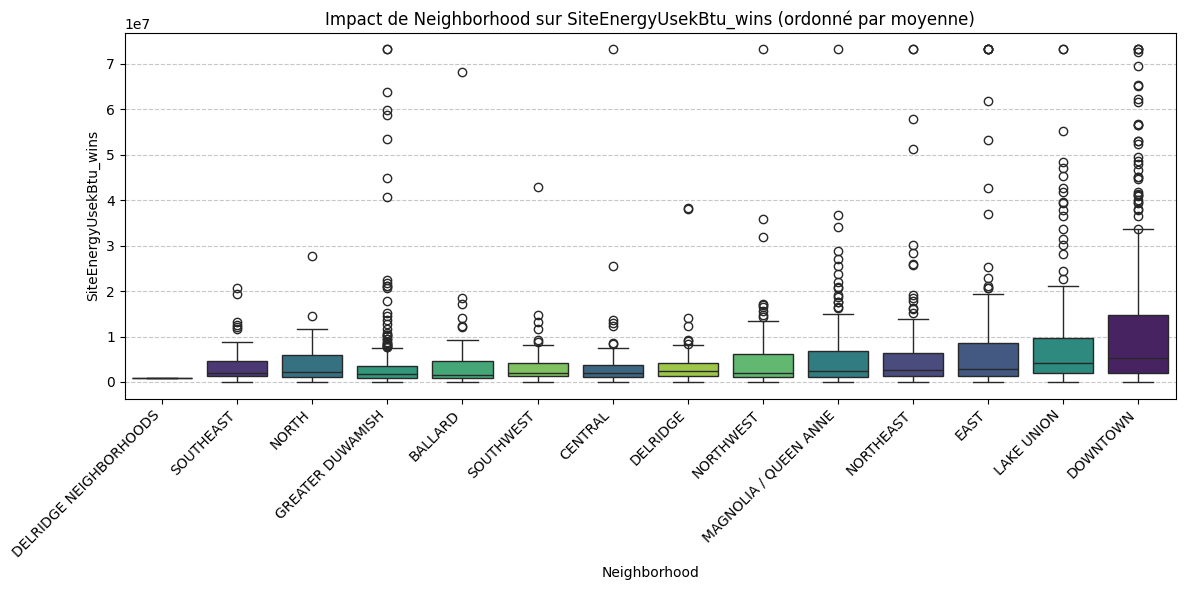

In [66]:
cleaner_global.analyser_pour_target_encode(
    col='Neighborhood', 
    target=target_actual
)

📊 Analyse de la relation : PrimaryPropertyType ➔ SiteEnergyUsekBtu_wins
------------------------------------------------------------


,mean,std,count
PrimaryPropertyType,,,
Office,5.800745e+05,2.404995e+05,3
Self-Storage Facility,9.321726e+05,1.049640e+06,28
Worship Facility,1.171907e+06,9.687470e+05,71
Low-Rise Multifamily,1.961246e+06,1.835341e+06,3
Warehouse,1.961577e+06,3.690296e+06,187
Distribution Center,2.405360e+06,3.794992e+06,53
Small- and Mid-Sized Office,2.631105e+06,2.833459e+06,292
K-12 School,2.769216e+06,2.599912e+06,139
Refrigerated Warehouse,3.719428e+06,5.106499e+06,12


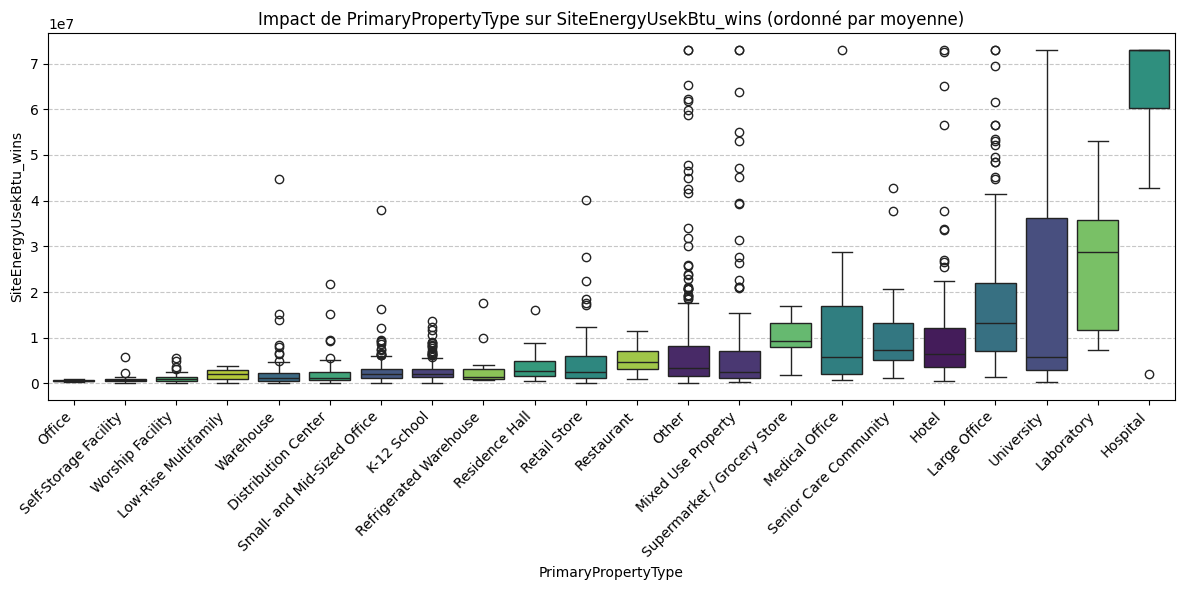

In [67]:

cleaner_global.analyser_pour_target_encode(
    col='PrimaryPropertyType', 
    target=target_actual
)


Analyse de la Variable **PrimaryPropertyType** (Cible : SiteEnergyUsekBtu_wins)

**1. La Hiérarchie de la Consommation (Pouvoir Prédictif)**

Il existe une différence abyssale entre les moyennes des catégories.

* Un **Hôpital** () consomme près de **100 fois plus** qu un petit bureau (**Office**, ).
* **Déduction :** `PrimaryPropertyType` est une variable **indispensable**. L énorme écart entre les moyennes indique que le *Target Encoding* apportera beaucoup plus d'informations au modèle qu'un simple *One-Hot Encoding*, car il capture cette échelle de grandeur.

**2. Le Risque des Petites Catégories (count)**

Regardons les effectifs :

* **Catégories robustes :** `Low-Rise Multifamily` (987) ou `Small- and Mid-Sized Office` (293). Ici, la moyenne est statistiquement fiable.
* **Catégories dangereuses :** `Office` (seulement 3 bâtiments) ou `Laboratory` (10).
* **Déduction de Yoshua Bengio :** Pour les catégories avec peu d échantillons, la moyenne est **instable**. Si l'un de ces 3 bureaux change légèrement, la moyenne va fluctuer brutalement. C'est ici que le **Smoothing** (lissage) est obligatoire pour éviter le sur-apprentissage (*overfitting*).

**3. La Volatilité (Écart-type / std)**

Observez les lignes `Hotel` ou `Mixed Use Property` :

* Leurs écarts-types sont **supérieurs à leurs moyennes** ( vs ).
* **Déduction de Fei-Fei Li :** Cela indique une hétérogénéité massive au sein même de la catégorie. Tous les hôtels ne se ressemblent pas. Il est probable que la surface du bâtiment (`GFA`) soit le facteur qui explique cette variation. Le modèle devra combiner le *Target Encoding* avec la surface pour être précis.

---

**Synthèse pour votre rapport :**

| Constat | Preuve (Evidence) | Action Recommandée |
| --- | --- | --- |
| **Haute Pertinence** | Écart des moyennes ( à ) | Conserver absolument cette variable. |
| **Instabilité** | Counts faibles (< 10) | Appliquer un **Target Encoding avec lissage**. |
| **Hétérogénéité** | `std` très élevée (Hôtels/Mixtes) | Croiser avec les variables de surface (`GFA`). |

📊 Analyse de la relation : BuildingType ➔ SiteEnergyUsekBtu_wins
------------------------------------------------------------


,mean,std,count
BuildingType,,,
SPS-District K-12,3.135887e+06,3.417824e+06,98
Nonresidential WA,3.180819e+06,NaN,1
Nonresidential COS,5.964288e+06,8.332750e+06,85
NonResidential,7.004901e+06,1.188614e+07,1460
Campus,2.738766e+07,2.752747e+07,24


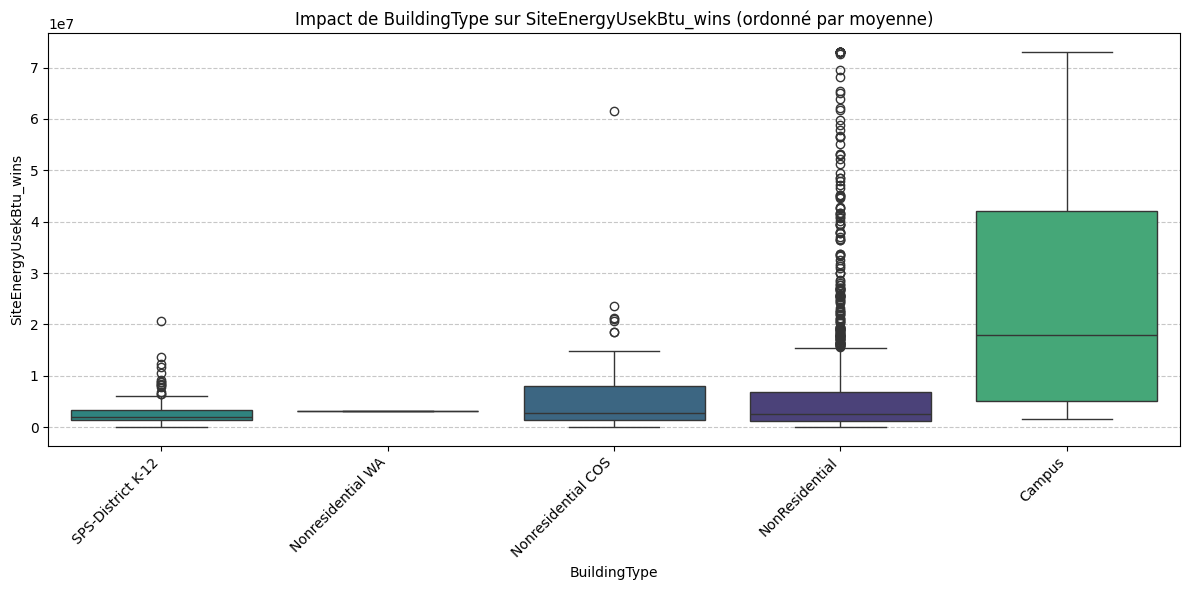

In [68]:
cleaner_global.analyser_pour_target_encode(
    col='BuildingType', 
    target=target_actual
)

#### 👤 Creation des TARGET ENCODING 

In [74]:
# ======================================================================================================================
# ENCODAGE AVANCÉ DES VARIABLES CATÉGORIELLES (TARGET ENCODING)
# ======================================================================================================================

# Configuration de l'encodage
# ----------------------------------------------------------------------------------------------------------------------
cols_to_process = ['Neighborhood', 'PrimaryPropertyType']
target_actual   = 'SiteEnergyUsekBtu_wins'  # Utilisation de la cible winsorisée pour plus de stabilité

print("\n==================================================================================================")
print("DÉBUT DU TRAITEMENT DES VARIABLES À HAUTE CARDINALITÉ")
print("==================================================================================================")

for col in cols_to_process:
    # 1. Vérification de la présence de la colonne source
    # ------------------------------------------------------------------------------------------------------------------
    if col in cleaner_global.df.columns:
        print(f"🔄 Traitement de : {col:<20}")
        
        # 2. Normalisation des données textuelles
        # On passe en MAJUSCULES et on retire les espaces superflus pour éviter les doublons (ex: 'DOWNTOWN' vs 'Downtown ')
        cleaner_global.df[col] = cleaner_global.df[col].astype(str).str.upper().str.strip()
        
        # 3. Application du Target Encoding (K-Fold Cross-Validation)
        # Smoothing=10.0 : Ajoute une pondération pour gérer les catégories peu fréquentes (Style Yoshua Bengio)
        cleaner_global.df = cleaner_global.apply_target_encode_cv(
            cleaner_global.df,                # On passe le DataFrame comme vous l'avez spécifié
            column    = col, 
            target    = target_actual, 
            n_folds   = 5, 
            smoothing = 10.0,
            suffix    = '_Encoded'
        )
        print(f"   └─ ✅ Encodage CV terminé (5 folds).")
        
    else:
        # 4. Vérification de l'état du dataset (Idempotence)
        # ------------------------------------------------------------------------------------------------------------------
        encoded_name = f"{col}_Encoded"
        if encoded_name in cleaner_global.df.columns:
            print(f"✅ {col:<20} | Déjà transformée en {encoded_name}.")
        else:
            print(f"⚠️ {col:<20} | Colonne introuvable et non encodée.")

print("==================================================================================================\n")


DÉBUT DU TRAITEMENT DES VARIABLES À HAUTE CARDINALITÉ
🔄 Traitement de : Neighborhood        

TARGET ENCODING : Neighborhood
Target               : SiteEnergyUsekBtu_wins
Catégories           : 14
Global Mean          : 7015540.5676
Smoothing            : 10.0
CV Folds             : 5

Nouvelle colonne     : Neighborhood_Encoded
  Mean               : 7073663.3544
  Std                : 2762649.3178
  Range              : [3495675.8322, 11959922.3127]
  Missing            : 0


   └─ ✅ Encodage CV terminé (5 folds).
🔄 Traitement de : PrimaryPropertyType 

TARGET ENCODING : PrimaryPropertyType
Target               : SiteEnergyUsekBtu_wins
Catégories           : 22
Global Mean          : 7015540.5676
Smoothing            : 10.0
CV Folds             : 5

Nouvelle colonne     : PrimaryPropertyType_Encoded
  Mean               : 6778406.3997
  Std                : 4995597.5527
  Range              : [1946396.8796, 35647291.7177]
  Missing            : 0


   └─ ✅ Encodage CV terminé (5 fol

#### 👤 Verification APRES

In [75]:
# Vérification de l'encodage

print("\n📊 Estado actual de las columnas encodadas:")
display(cleaner_global.df.filter(like='_Encoded').head())


📊 Estado actual de las columnas encodadas:


,Neighborhood_Encoded,PrimaryPropertyType_Encoded
0,1.144064e+07,1.054894e+07
1,1.110285e+07,1.211526e+07
2,1.144064e+07,1.054894e+07
3,1.144064e+07,1.054894e+07
4,1.195992e+07,1.197911e+07


In [76]:
print("\n============================================================================")
print("GENERER RAPPORT COMPLET")
print("============================================================================")

rapport = cleaner_global.generer_rapport_etapes([5])
print(rapport.to_string(index=False))


print("\n============================================================================")
print("SAUVEGARDE INTERMÉDIAIRE")
print("============================================================================")
info_sauvegarde = cleaner_global.save_stage("df_etape_5")
print(info_sauvegarde)



GENERER RAPPORT COMPLET
 num_etape: 5
            Étape                     Operation  Nb_Actions                                                                                                                     Details
        5.1 - OHE              One-Hot Encoding           3 Variables: BuildingType, ComplianceStatus, F8_ENERGYSTARScore_Category | Création de 10 colonnes binarias (drop_first=True)
5.2 - Target Enc.        Encoding: Neighborhood           1                                                Target: SiteEnergyUsekBtu_wins | Folds: 5 | Smoothing: 10.0 | Categories: 14
5.2 - Target Enc. Encoding: PrimaryPropertyType           1                                                Target: SiteEnergyUsekBtu_wins | Folds: 5 | Smoothing: 10.0 | Categories: 22
5.2 - Target Enc.        Encoding: Neighborhood           1                                                Target: SiteEnergyUsekBtu_wins | Folds: 5 | Smoothing: 10.0 | Categories: 14
5.2 - Target Enc. Encoding: PrimaryProper

In [77]:
# Diagnóstico de historial
for i, op in enumerate(cleaner_global.history):
    print(f"Índice {i}: Operación = {op.get('operation')}")

Índice 0: Operación = sauvegarde_checkpoint
Índice 1: Operación = suppression_constantes
Índice 2: Operación = suppression_specifique
Índice 3: Operación = suppression_specifique
Índice 4: Operación = suppression_specifique
Índice 5: Operación = suppression_specifique
Índice 6: Operación = sauvegarde_checkpoint
Índice 7: Operación = creation_indicateurs_missing
Índice 8: Operación = imputation_categoriques
Índice 9: Operación = imputation_numeriques
Índice 10: Operación = sauvegarde_checkpoint
Índice 11: Operación = transformation_logarithmique
Índice 12: Operación = winsorisation
Índice 13: Operación = sauvegarde_checkpoint
Índice 14: Operación = ajouter_feature
Índice 15: Operación = ajouter_feature
Índice 16: Operación = ajouter_feature
Índice 17: Operación = ajouter_feature
Índice 18: Operación = ajouter_feature
Índice 19: Operación = ajouter_feature
Índice 20: Operación = ajouter_feature
Índice 21: Operación = ajouter_feature
Índice 22: Operación = ajouter_feature
Índice 23: Opera

## 6. Réduction de la Redondance

In [80]:
# ======================================================================================================================
# ANALYSE DE LA MULTICOLINÉARITÉ ET SUPPRESSION DES REDONDANCES
# ======================================================================================================================

import numpy as np

# 1. Calcul de la matrice de corrélation (Valeurs absolues)
# ----------------------------------------------------------------------------------------------------------------------
# Nous utilisons numeric_only=True pour garantir la compatibilité avec les résidus textuels éventuels.
corr_matrix = cleaner_global.df.corr(numeric_only=True).abs()

# 2. Extraction du triangle supérieur
# ----------------------------------------------------------------------------------------------------------------------
# On ignore la diagonale (corrélation de 1 avec soi-même) pour ne comparer chaque paire qu'une seule fois.
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 3. Identification des colonnes hautement redondantes
# ----------------------------------------------------------------------------------------------------------------------
# Seuil fixé à 0.91 (selon votre code) : C'est une limite stricte qui élimine les variables "miroirs".
# Note : au-delà de 0.90, une variable n'apporte quasiment plus d'entropie utile.
seuil_critique = 0.91
to_drop = [column for column in upper.columns if any(upper[column] > seuil_critique)]

print("\n==================================================================================================")
print(f"ANALYSE DE REDONDANCE (SEUIL > {seuil_critique*100:.0f}%)")
print("==================================================================================================")
if to_drop:
    print(f"  🔍 {len(to_drop)} colonnes redondantes détectées :")
    for col in to_drop:
        # On cherche la variable avec laquelle elle est corrélée pour le log
        correlated_with = upper.index[upper[col] > seuil_critique].tolist()[0]
        print(f"     ❌ {col:<30} ↔️  Corrélée avec : {correlated_with}")
else:
    print("  ✅ Aucune colinéarité critique détectée au-delà du seuil.")
print("==================================================================================================\n")

# 4. Suppression effective (Optionnel mais recommandé avant le modèle)
# cleaner_global.df.drop(columns=to_drop, inplace=True)


ANALYSE DE REDONDANCE (SEUIL > 91%)
  🔍 39 colonnes redondantes détectées :
     ❌ PropertyGFABuildings           ↔️  Corrélée avec : PropertyGFATotal
     ❌ LargestPropertyUseTypeGFA      ↔️  Corrélée avec : PropertyGFATotal
     ❌ SiteEUIWNkBtu/sf               ↔️  Corrélée avec : SiteEUIkBtu/sf
     ❌ SourceEUIkBtu/sf               ↔️  Corrélée avec : SiteEUIkBtu/sf
     ❌ SourceEUIWNkBtu/sf             ↔️  Corrélée avec : SiteEUIkBtu/sf
     ❌ ElectricitykBtu                ↔️  Corrélée avec : SiteEnergyUsekBtu
     ❌ ThirdLargestPropertyUseType_Manquant ↔️  Corrélée avec : ThirdLargestPropertyUseTypeGFA_Manquant
     ❌ ZipCode_log                    ↔️  Corrélée avec : ZipCode
     ❌ PropertyGFABuildings_log       ↔️  Corrélée avec : PropertyGFATotal_log
     ❌ LargestPropertyUseTypeGFA_log  ↔️  Corrélée avec : PropertyGFATotal_log
     ❌ SiteEUIWNkBtu/sf_log           ↔️  Corrélée avec : SiteEUIkBtu/sf_log
     ❌ SourceEUIkBtu/sf_log           ↔️  Corrélée avec : SiteEUIkBtu/sf_

### 6.1. Analyse de Corrélation: Calculer la matrice de Pearson post-transformations.


ANALYSE DE CORRÉLATION

Méthode              : Pearson
Seuil                : |ρ| ≥ 0.9
Colonnes numériques  : 88
Paires totales       : 3828
Paires corrélées     : 67
Candidats suppression: 38

──────────────────────────────────────────────────────────────────────
TOP 20 PAIRES LES PLUS CORRÉLÉES
──────────────────────────────────────────────────────────────────────

1. ρ = -1.0000
   YearBuilt
   F11_Building_Age

2. ρ = +1.0000
   CouncilDistrictCode
   CouncilDistrictCode_wins

3. ρ = +1.0000
   ENERGYSTARScore
   ENERGYSTARScore_wins

4. ρ = +1.0000
   ThirdLargestPropertyUseTypeGFA_Manquant
   ThirdLargestPropertyUseType_Manquant

5. ρ = +1.0000
   ZipCode
   ZipCode_log

6. ρ = -1.0000
   YearBuilt_wins
   F11_Building_Age

7. ρ = +1.0000
   YearBuilt
   YearBuilt_wins

8. ρ = +0.9999
   Latitude
   Latitude_wins

9. ρ = +0.9987
   Longitude
   Longitude_wins

10. ρ = +0.9967
   NumberofFloors
   F12_floors_by_building_mean

11. ρ = +0.9940
   SourceEUIkBtu/sf
   SourceEUIWNkBt

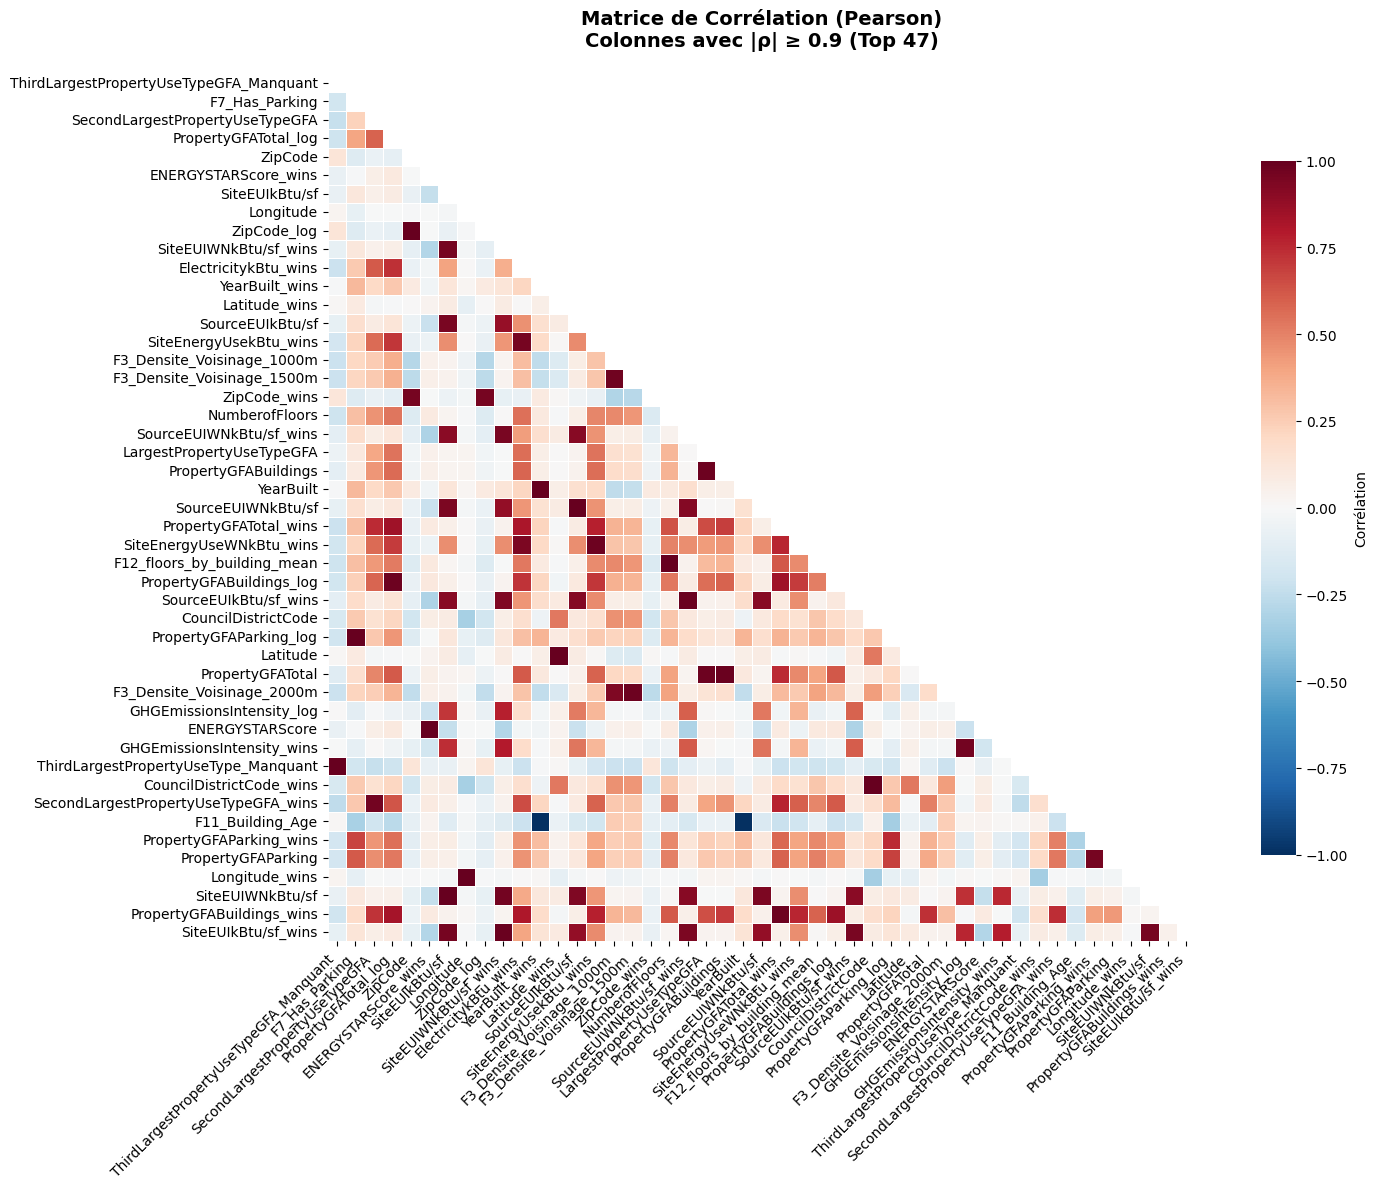

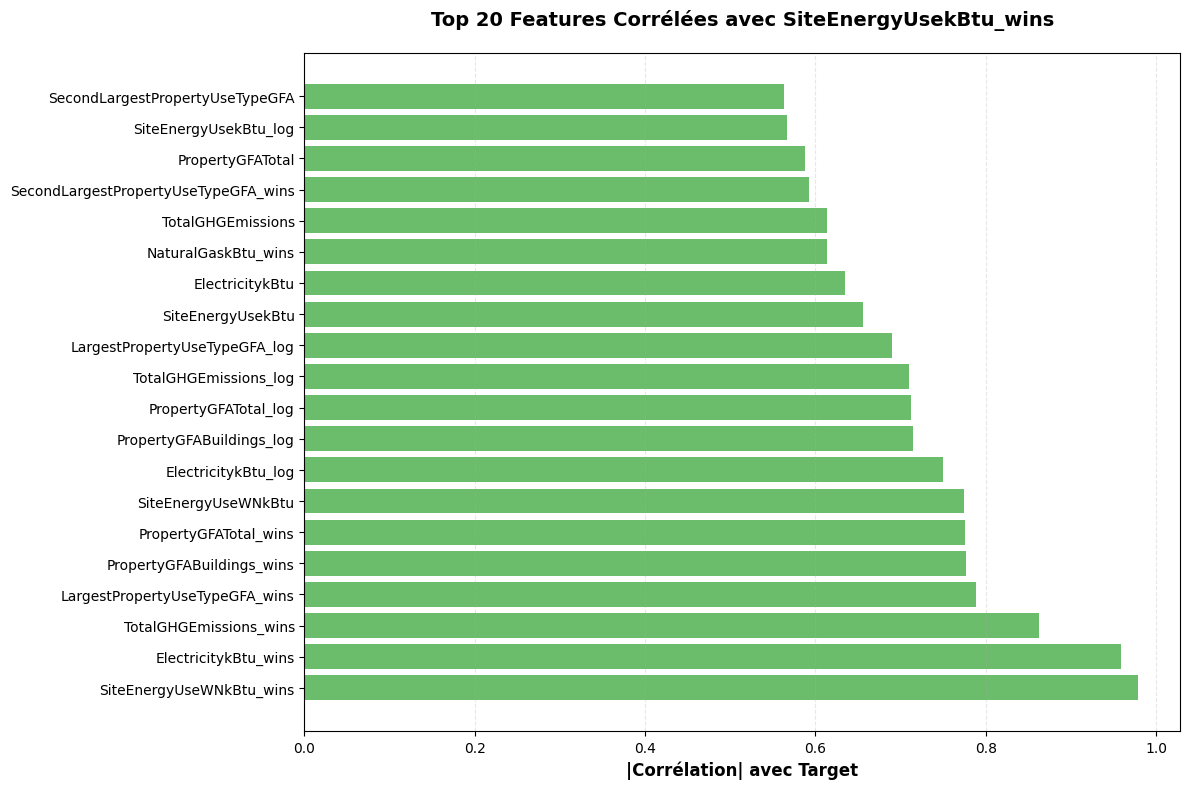


Top 20 corrélations avec 'SiteEnergyUsekBtu_wins':
  SiteEnergyUseWNkBtu_wins                           : 0.9791
  ElectricitykBtu_wins                               : 0.9584
  TotalGHGEmissions_wins                             : 0.8630
  LargestPropertyUseTypeGFA_wins                     : 0.7883
  PropertyGFABuildings_wins                          : 0.7771
  PropertyGFATotal_wins                              : 0.7752
  SiteEnergyUseWNkBtu                                : 0.7746
  ElectricitykBtu_log                                : 0.7501
  PropertyGFABuildings_log                           : 0.7141
  PropertyGFATotal_log                               : 0.7124
  TotalGHGEmissions_log                              : 0.7103
  LargestPropertyUseTypeGFA_log                      : 0.6898
  SiteEnergyUsekBtu                                  : 0.6556
  ElectricitykBtu                                    : 0.6345
  NaturalGaskBtu_wins                                : 0.6139
  TotalGHGEmission

In [90]:
# ======================================================================================================================
# 6.1 ANALYSE STRATÉGIQUE DES CORRÉLATIONS
# ======================================================================================================================

# 1. Analyse globale et détection des colinéarités (ρ > 0.90)
# ----------------------------------------------------------------------------------------------------------------------
# Cette méthode identifie les variables qui "racontent la même histoire" afin d'alléger le modèle.
results = cleaner_global.analyser_correlations(
    df         = cleaner_global.df,
    target     = target_actual,
    seuil      = 0.90,
    method     = 'pearson',
    top_n      = 20,
    visualiser = True,
    figsize    = (16, 12)
)

# 2. Focus sur le pouvoir prédictif (Corrélation avec la Target)
# ----------------------------------------------------------------------------------------------------------------------
# Indispensable selon Geoffrey Hinton pour valider que nos nouvelles features (Encoded, log) sont utiles.
cleaner_global.visualiser_top_correlations(
    target = target_actual,
    top_n  = 20
)

# 3. Rapport d'arbitrage : Candidats à l'exclusion
# ----------------------------------------------------------------------------------------------------------------------
print("\n" + "="*80)
print(f"{'🔍 RAPPORT D ARBITRAGE : VARIABLES REDONDANTES':^80}")
print("="*80)

if not results['candidats_suppression']:
    print(f"{'✅ Aucune redondance critique (ρ > 0.90) détectée.':^80}")
else:
    for idx, candidat in enumerate(results['candidats_suppression'], 1):
        # Formatage dynamique pour une lecture rapide
        rho   = candidat['correlation']
        col_s = candidat['colonne']
        col_g = candidat['correlée_avec']
        
        print(f"  {idx:02d}. [ρ = {rho:>+6.4f}]  Supprimer : {col_s:<30} ↔️  Garder : {col_g}")

print("="*80 + "\n")

### 6.2. Élimination des Corréliées: Supprimer si $| \rho | > 0.90$ (garder la plus liée à y)

In [93]:
# ------------------------------------------------------------
# 6.2. Élimination Supervisée
# ------------------------------------------------------------

# Option 1 : Pipeline automático (sin confirmación)
# results = engineer.pipeline_reduction_redondance(
#     target=TARGET,
#     seuil=0.90,
#      method='pearson',
#     auto_eliminer=False,  # Pide confirmación
#     visualiser=True
# )



# Option 2 : Suppression manuelle selective
# 1.  ρ = +1.0000 Energy_Efficiency_Index  <-> SiteEUIkBtu/sf
# 2.  ρ = +1.0000 CouncilDistrictCode_wins  <-> CouncilDistrictCode
# 3.  ρ = +1.0000 YearBuilt_wins  <-> YearBuilt
# 4.  ρ = +1.0000 ENERGYSTARScore_wins  <-> ENERGYSTARScore
# 5.  ρ = +1.0000 SecondLargestPropertyUseType_Manquant  <-> SecondLargestPropertyUseTypeGFA_Manquant
# 6.  ρ = +1.0000 ThirdLargestPropertyUseType_Manquant  <-> ThirdLargestPropertyUseTypeGFA_Manquant
# 7.  ρ = -1.0000 Building_Age  <-> YearBuilt_wins
# 8.  ρ = +1.0000 ZipCode  <-> ZipCode_log

# 1.  ρ = +1.0000 Energy_Efficiency_Index  <-> SiteEUIkBtu/sf
# 2.  ρ = +1.0000 CouncilDistrictCode_wins  <-> CouncilDistrictCode
# 3.  ρ = +1.0000 YearBuilt_wins  <-> YearBuilt
# 4.  ρ = +1.0000 ENERGYSTARScore_wins  <-> ENERGYSTARScore
# 5.  ρ = +1.0000 SecondLargestPropertyUseType_Manquant  <-> SecondLargestPropertyUseTypeGFA_Manquant
# 6.  ρ = +1.0000 ThirdLargestPropertyUseType_Manquant  <-> ThirdLargestPropertyUseTypeGFA_Manquant
# 7.  ρ = -1.0000 Building_Age  <-> YearBuilt_wins
# 8.  ρ = +1.0000 ZipCode  <-> ZipCode_log

# 1.  ρ = +1.0000 CouncilDistrictCode_wins  <-> CouncilDistrictCode
# 2.  ρ = +1.0000 YearBuilt_wins  <-> YearBuilt
# 3.  ρ = +1.0000 ENERGYSTARScore_wins  <-> ENERGYSTARScore
# 4.  ρ = +1.0000 SecondLargestPropertyUseType_Manquant  <-> SecondLargestPropertyUseTypeGFA_Manquant
# 5.  ρ = +1.0000 ThirdLargestPropertyUseType_Manquant  <-> ThirdLargestPropertyUseTypeGFA_Manquant
# 6.  ρ = +1.0000 ZipCode  <-> ZipCode_log
# 7.  ρ = +0.9998 Latitude  <-> Latitude_wins
# 8.  ρ = +0.9989 Longitude_wins  <-> Longitude

colonnes_a_supprimer = [
    'CouncilDistrictCode',
    'YearBuilt',
    'ENERGYSTARScore',
    'SecondLargestPropertyUseTypeGFA_Manquant',
    'ThirdLargestPropertyUseTypeGFA_Manquant',
    'YearBuilt_wins',
    'ZipCode',
    'Latitude',
    'Longitude_wins'
    # ...
]

cleaner_global.eliminer_correlees(
    colonnes=colonnes_a_supprimer,
    raison='Corrélation élevée (ρ = +/-1.0000 )',
    valider=False  # Pide confirmación
)



⚠️  Colonnes introuvables : ['SecondLargestPropertyUseTypeGFA_Manquant']

RÉSUMÉ SUPPRESSION
Colonnes supprimées  : 8
Forme avant          : (1668, 100)
Forme après          : (1668, 92)



#### 👤 Verification APRES

In [94]:
# ------------------------------------------------------------
# Verificación Final
# ------------------------------------------------------------

print(f"\n{'='*70}")
print("ÉTAT FINAL")
print(f"{'='*70}")
print(f"Forme DataFrame      : {cleaner_global.df.shape}")
print(f"Colonnes supprimées  : {len(cleaner_global.columns_suppressed)}")
print(f"{'='*70}\n")



ÉTAT FINAL
Forme DataFrame      : (1668, 92)
Colonnes supprimées  : 27



### 6.3. RAPPORT ET SAUVEGARDE

In [95]:
print("\n============================================================================")
print("GENERER RAPPORT COMPLET")
print("============================================================================")
rapport = cleaner_global.generer_rapport_etapes([6])
print(rapport.to_string(index=False))

print("\n============================================================================")
print("SAUVEGARDE INTERMÉDIAIRE")
print("============================================================================")
info_sauvegarde = cleaner_global.save_stage("df_etape_6")
print(info_sauvegarde)


GENERER RAPPORT COMPLET
 num_etape: 6
                          Étape               Operation  Nb_Actions                                                                                                                                                                                                                               Details
6.2. Élimination des Corréliées Réduction de Redondance           8 Raison: Corrélation élevée (ρ = +/-1.0000 ) | Colonnes: CouncilDistrictCode, YearBuilt, ENERGYSTARScore, ThirdLargestPropertyUseTypeGFA_Manquant, YearBuilt_wins, ZipCode, Latitude, Longitude_wins | Shape: (1668, 100) ➔ (1668, 92)

SAUVEGARDE INTERMÉDIAIRE
✓ [SAVE] Stage: df_etape_6 | Fichier: dataset_2026_01_06-15_33_df_etape_6_1668x92.csv | Shape: (1668, 92)


In [96]:
rapport = cleaner_global.generer_rapport_etapes([1,2,3,4,5,6])
print(rapport.to_string(index=False))

 num_etape: 1
 num_etape: 2
 num_etape: 3
 num_etape: 4
 num_etape: 5
 num_etape: 6
                             Étape                          Operation                Nb_Actions                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Details
                  1.1 - Constantes                        Suppression                         4                                                                                                                                                                                                                                               

## 7. Standardisation. Mise à l'Échelle Finale

In [97]:
cleaner_global.df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1668 entries, 0 to 3375
Data columns (total 92 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   BuildingType                          1668 non-null   object  
 1   PropertyName                          1668 non-null   object  
 2   Address                               1668 non-null   object  
 3   TaxParcelIdentificationNumber         1668 non-null   object  
 4   Longitude                             1668 non-null   float64 
 5   NumberofBuildings                     1668 non-null   float64 
 6   NumberofFloors                        1668 non-null   int64   
 7   PropertyGFATotal                      1668 non-null   int64   
 8   PropertyGFAParking                    1668 non-null   int64   
 9   PropertyGFABuildings                  1668 non-null   int64   
 10  ListOfAllPropertyUseTypes             1668 non-null   object  
 11  LargestPr

### 7.1. Standardisation: Appliquer StandardScaler à toutes les features.

#### 👤 Verification AVANT

In [99]:
# ======================================================================================================================
# AUDIT PRÉ-SCALING : SEGMENTATION DES VARIABLES
# ======================================================================================================================

# 1. Analyse automatique des colonnes selon leur nature (Binaire vs Continue)
# ----------------------------------------------------------------------------------------------------------------------
# seuil_binaire=2 : Identifie les colonnes n'ayant que 0 et 1 comme valeurs.
verif = cleaner_global.verifier_colonnes_scaling(
    target           = target_actual,
    seuil_binaire    = 2,
    afficher_details = True
)

# 2. Présentation structurée de l'analyse
# ----------------------------------------------------------------------------------------------------------------------
print("\n" + "="*80)
print(f"{'📊 RAPPORT D AUDIT POUR LA NORMALISATION (SCALING)':^80}")
print("="*80)

# Section 1 : Variables continues (StandardScaler / RobustScaler)
print(f"\n🔹 1. COLONNES À NORMALISER ({len(verif['a_scaler']):>2})")
print(f"   (Variables continues nécessitant une remise à l'échelle)")
print("   " + "\n   ".join(f"• {c}" for c in verif['a_scaler'][:10]))
if len(verif['a_scaler']) > 10:
    print(f"   ... et {len(verif['a_scaler']) - 10} autres colonnes.")

# Section 2 : Variables binaires (À ignorer lors du scaling)
print(f"\n🔹 2. COLONNES BINAIRES/INDICATEURS ({len(verif['binaires']):>2})")
print(f"   (Déjà entre 0 et 1, à ne pas modifier selon Yann LeCun)")
print("   " + "\n   ".join(f"• {c}" for c in verif['binaires'][:10]))
if len(verif['binaires']) > 10:
    print(f"   ... et {len(verif['binaires']) - 10} autres colonnes.")

# Section 3 : Alertes critiques (Variables catégorielles oubliées)
if verif['categoriques']:
    print(f"\n⚠️  3. ALERTES : COLONNES NON NUMÉRIQUES ({len(verif['categoriques'])})")
    print("   DANGER : Ces colonnes bloqueront le StandardScaler !")
    print("   " + "\n   ".join(f"❌ {c}" for c in verif['categoriques']))

# Section 4 : Alertes critiques (Variables sans information)
if verif['variance_nulle']:
    print(f"\n⚠️  4. ALERTES : VARIANCE NULLE ({len(verif['variance_nulle'])})")
    print("   Note : Ces colonnes sont constantes et n'apportent aucun signal.")
    print("   " + "\n   ".join(f"🗑️ {c}" for c in verif['variance_nulle']))

print("\n" + "="*80)


VÉRIFICATION PRÉ-SCALING

Total colonnes       : 92
──────────────────────────────────────────────────────────────────────

🎯 TARGET (à exclure)
──────────────────────────────────────────────────────────────────────
  • SiteEnergyUsekBtu_wins
    dtype=float64, unique=1635, range=[21697.62, 73096396.16]

✅ COLONNES À SCALER (76)
──────────────────────────────────────────────────────────────────────

   1. Longitude
      dtype=float64, unique=1408, missing=0
      μ=-122.33, σ=0.02, range=[-122.41, -122.26]

   2. NumberofBuildings
      dtype=float64, unique=16, missing=0
      μ=1.17, σ=2.93, range=[0.00, 111.00]

   3. NumberofFloors
      dtype=int64, unique=45, missing=0
      μ=4.12, σ=6.56, range=[0.00, 99.00]

   4. PropertyGFATotal
      dtype=int64, unique=1590, missing=0
      μ=118842.72, σ=297362.21, range=[11285.00, 9320156.00]

   5. PropertyGFAParking
      dtype=int64, unique=327, missing=0
      μ=12897.98, σ=42274.51, range=[0.00, 512608.00]

   6. PropertyGFABuildi

In [102]:
# ======================================================================================================================
# 3.10 DÉFINITION DU PÉRIMÈTRE D'EXCLUSION DU SCALING
# ======================================================================================================================

# 1. Génération de la liste d'exclusion automatique
# ----------------------------------------------------------------------------------------------------------------------
# La méthode identifie les IDs, la target, les variables déjà binaires (0/1) 
# et les indicateurs de valeurs manquantes (_Manquant).
exclure = cleaner_global.recommander_exclure_scaling(target=target_actual)

# 2. Affichage structuré pour validation experte
# ----------------------------------------------------------------------------------------------------------------------
print("\n" + "="*80)
print(f"{'🛡️ SÉCURITÉ DU SCALING : LISTE D EXCLUSION AUTOMATIQUE':^80}")
print("="*80)
print(f"  Nombre total de colonnes protégées : {len(exclure)}")
print(f"  Seuil de décision : Variables binaires ou Indicateurs")
print(f"  {'-'*76}")

# Affichage formaté des 15 premières colonnes
for col in exclure[:15]:
    print(f"    • {col}")

if len(exclure) > 15:
    print(f"    ... (+ {len(exclure) - 15} autres colonnes protégées)")

print("="*80)
print("  ✅ Recommandation : Appliquer le StandardScaler sur tout le reste.")
print("="*80 + "\n")


VÉRIFICATION PRÉ-SCALING

Total colonnes       : 92
──────────────────────────────────────────────────────────────────────

🎯 TARGET (à exclure)
──────────────────────────────────────────────────────────────────────
  • SiteEnergyUsekBtu_wins
    dtype=float64, unique=1635, range=[21697.62, 73096396.16]

✅ COLONNES À SCALER (76)
──────────────────────────────────────────────────────────────────────
  Longitude, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking
  ... et 71 autres

🔘 COLONNES BINAIRES (à exclure : 4)
──────────────────────────────────────────────────────────────────────
  DefaultData, ThirdLargestPropertyUseType_Manquant, YearsENERGYSTARCertified_Manquant, F7_Has_Parking

📝 COLONNES CATÉGORIELLES (à exclure : 11)
──────────────────────────────────────────────────────────────────────
   1. BuildingType                                  | dtype=object, unique=5
   2. PropertyName                                  | dtype=object, unique=1664
   3. Addre

#### 👤 Transformation STANDARDISATION

In [103]:
# exclure = LISTE D'EXCLUSION AUTOMATIQUE 

# Realiser la Standardisation seule
cleaner_global.standardiser_features(
    exclure=exclure,
    garder_originales=False  # Remplace les originales
)


STANDARDISATION (StandardScaler)

Colonnes standardisées : 76
Méthode                 : StandardScaler (z-score)
Garder originales       : False
Forme DataFrame         : (1668, 92)

──────────────────────────────────────────────────────────────────────
EXEMPLES DE TRANSFORMATION (5 premières colonnes)
──────────────────────────────────────────────────────────────────────

1. Longitude
   Avant : μ=-122.33, σ=0.02, range=[-122.41, -122.26]
   Après : μ=-3.09e-13, σ=1.00, range=[-3.21, 3.02]

2. NumberofBuildings
   Avant : μ=1.17, σ=2.93, range=[0.00, 111.00]
   Après : μ=-2.45e-17, σ=1.00, range=[-0.40, 37.50]

3. NumberofFloors
   Avant : μ=4.12, σ=6.56, range=[0.00, 99.00]
   Après : μ=5.11e-17, σ=1.00, range=[-0.63, 14.46]

4. PropertyGFATotal
   Avant : μ=118842.72, σ=297362.21, range=[11285.00, 9320156.00]
   Après : μ=0.00e+00, σ=1.00, range=[-0.36, 30.95]

5. PropertyGFAParking
   Avant : μ=12897.98, σ=42274.51, range=[0.00, 512608.00]
   Après : μ=1.70e-17, σ=1.00, range=[-0.

#### 👤 Verification APRES

In [104]:
# ======================================================================================================================
# AUDIT FINAL DE STANDARDISATION (MOYENNE 0, ÉCART-TYPE 1)
# ======================================================================================================================

print("\n" + "═"*85)
print(f"{'🔎 CONTRÔLE DE CONFORMITÉ DES ÉCHELLES (SCALING AUDIT)':^85}")
print("═"*85)
print(f"{'NOM DE LA COLONNE':<45} | {'MOYENNE (μ)':^15} | {'ÉCART-TYPE (σ)':^15}")
print(f"{'─'*45}─┼─{'─'*15}─┼─{'─'*15}")

# Filtrage des colonnes numériques pour l'audit
numeric_cols = cleaner_global.df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    mean = cleaner_global.df[col].mean()
    std  = cleaner_global.df[col].std()
    
    # Formatage : scientifique pour la moyenne, fixe pour l'écart-type
    # On ajoute un indicateur visuel [S] si la colonne semble être "scalée"
    scaled_marker = " [S]" if abs(mean) < 1e-10 and abs(std - 1.0) < 0.1 else "    "
    
    print(f"{col:<45} | {mean:>13.2e} | {std:>13.2f} {scaled_marker}")

print("═"*85)
print("  💡 [S] : Colonne correctement centrée et réduite (μ≈0, σ≈1).")
print("  💡 Note : Les colonnes binaires ou exclues gardent leur μ et σ naturels.")
print("═"*85 + "\n")


═════════════════════════════════════════════════════════════════════════════════════
                🔎 CONTRÔLE DE CONFORMITÉ DES ÉCHELLES (SCALING AUDIT)                
═════════════════════════════════════════════════════════════════════════════════════
NOM DE LA COLONNE                             |   MOYENNE (μ)   | ÉCART-TYPE (σ) 
──────────────────────────────────────────────┼─────────────────┼────────────────
Longitude                                     |     -3.09e-13 |          1.00  [S]
NumberofBuildings                             |     -2.45e-17 |          1.00  [S]
NumberofFloors                                |      5.11e-17 |          1.00  [S]
PropertyGFATotal                              |      0.00e+00 |          1.00  [S]
PropertyGFAParking                            |      1.70e-17 |          1.00  [S]
PropertyGFABuildings                          |     -3.41e-17 |          1.00  [S]
LargestPropertyUseTypeGFA                     |     -2.56e-17 |          1.00  

In [106]:
# ======================================================================================================================
# AUDIT QUALITATIF POST-ENCODAGE : ANALYSE DES SIGNAUX
# ======================================================================================================================

print("\n" + "═"*85)
print(f"{'🔍 BILAN ANALYTIQUE DES VARIABLES QUALITATIVES':^85}")
print("═"*85)

# 1. Analyse des Variables Binaires (OHE, Flags, Manquants)
# ----------------------------------------------------------------------------------------------------------------------
# Rappel: La moyenne d'une variable 0/1 est sa probabilité d'occurrence P(1).
binary_cols = [c for c in cleaner_global.df.columns if cleaner_global.df[c].nunique() == 2]

if binary_cols:
    print(f"\n📊 DISTRIBUTION DES VARIABLES BINAIRES (Rareté vs Abondance)")
    print(f"{'-'*85}")
    print(f"{'NOM DE LA COLONNE':<45} | {'PRÉSENCE (1)':^15} | {'ABSENCE (0)':^15}")
    print(f"{'-'*45}─┼─{'─'*15}─┼─{'─'*15}")
    
    for col in binary_cols:
        prop_1 = cleaner_global.df[col].mean() * 100 
        # Alerte si une catégorie est trop rare (poids mort statistique)
        alert = " ⚠️ RARE" if prop_1 < 1 or prop_1 > 99 else ""
        print(f"{col:<45} | {prop_1:>13.2f}% | {100-prop_1:>13.2f}% {alert}")
else:
    print("\nℹ️ Aucune variable binaire détectée.")

# 2. Analyse des Variables à Haute Cardinalité (Target Encoded)
# ----------------------------------------------------------------------------------------------------------------------
# Rappel: Ces variables doivent avoir une variance saine pour être prédictives.
encoded_cols = [c for c in cleaner_global.df.columns if 'Encoded' in c]

if encoded_cols:
    print(f"\n\n📈 VARIABLES ENCODÉES (Stabilité du Target Encoding)")
    print(f"{'-'*85}")
    print(f"{'NOM DE LA COLONNE':<45} | {'MOYENNE (μ)':^15} | {'ÉCART-TYPE (σ)':^15}")
    print(f"{'-'*45}─┼─{'─'*15}─┼─{'─'*15}")
    
    for col in encoded_cols:
        mean = cleaner_global.df[col].mean()
        std  = cleaner_global.df[col].std()
        print(f"{col:<45} | {mean:>13.2e} | {std:>13.2f}")
else:
    print("\nℹ️ Aucune variable Target Encoded détectée.")

print("\n" + "═"*85)


═════════════════════════════════════════════════════════════════════════════════════
                    🔍 BILAN ANALYTIQUE DES VARIABLES QUALITATIVES                    
═════════════════════════════════════════════════════════════════════════════════════

📊 DISTRIBUTION DES VARIABLES BINAIRES (Rareté vs Abondance)
-------------------------------------------------------------------------------------
NOM DE LA COLONNE                             |  PRÉSENCE (1)   |   ABSENCE (0)  
---------------------------------------------─┼─────────────────┼────────────────
DefaultData                                   |          5.28% |         94.72% 
ThirdLargestPropertyUseType_Manquant          |         78.84% |         21.16% 
YearsENERGYSTARCertified_Manquant             |         94.12% |          5.88% 
F7_Has_Parking                                |         19.96% |         80.04% 


📈 VARIABLES ENCODÉES (Stabilité du Target Encoding)
----------------------------------------------------

In [108]:
cleaner_global.df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1668 entries, 0 to 3375
Data columns (total 92 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   BuildingType                          1668 non-null   object  
 1   PropertyName                          1668 non-null   object  
 2   Address                               1668 non-null   object  
 3   TaxParcelIdentificationNumber         1668 non-null   object  
 4   Longitude                             1668 non-null   float64 
 5   NumberofBuildings                     1668 non-null   float64 
 6   NumberofFloors                        1668 non-null   float64 
 7   PropertyGFATotal                      1668 non-null   float64 
 8   PropertyGFAParking                    1668 non-null   float64 
 9   PropertyGFABuildings                  1668 non-null   float64 
 10  ListOfAllPropertyUseTypes             1668 non-null   object  
 11  LargestPr

## 8. Verification Features Cualitatives

In [117]:
# ======================================================================================================================
# AUDIT DYNAMIQUE DE CARDINALITÉ ET STRATÉGIE D'ENCODAGE
# ======================================================================================================================

# 1. Extraction automatique des colonnes non-numériques
# ----------------------------------------------------------------------------------------------------------------------
categoriques_restantes = cleaner_global.df.select_dtypes(exclude=[np.number]).columns.tolist()

print("\n" + "═"*85)
titre = f"ANALYSE DE CARDINALITÉ ({len(categoriques_restantes)} COLONNES RESTANTES)"
print(f"{titre:^85}")
print("═"*85)

if not categoriques_restantes:
    print(f"\n{'✅ AUCUNE COLONNE CATÉGORIELLE DÉTECTÉE. LE DATASET EST PRÊT POUR LE SCALING.':^85}")
else:
    for col in categoriques_restantes:
        n_unique = cleaner_global.df[col].nunique()
        total    = len(cleaner_global.df)
        ratio    = (n_unique / total) * 100
        exemples = cleaner_global.df[col].dropna().unique()[:4].tolist()
        
        print(f"\n📍 VARIABLE : {col}")
        print(f"   {'─'*30}")
        print(f"   • Unicité : {n_unique:>5} / {total} ({ratio:>5.1f}%)")
        print(f"   • Aperçu  : {str(exemples):<50}")
        
        # 2. Logique de décision experte (Style Geoffrey Hinton)
        # --------------------------------------------------------------------------------------------------------------
        print("   • DIAGNOSTIC :", end=" ")
        
        if ratio > 50:
            print("❌ IDENTIFIANT UNIQUE (Bruit pur)")
            print("     💡 ACTION : À supprimer avant l'entraînement.")
            
        elif n_unique <= 10:
            print("🟢 BASSE CARDINALITÉ")
            print("     💡 ACTION : One-Hot Encoding (OHE).")
            
        else:
            print("🟡 HAUTE CARDINALITÉ")
            print("     💡 ACTION : Target Encoding (avec Cross-Validation).")

print("\n" + "═"*85)


═════════════════════════════════════════════════════════════════════════════════════
                    ANALYSE DE CARDINALITÉ (4 COLONNES RESTANTES)                    
═════════════════════════════════════════════════════════════════════════════════════

📍 VARIABLE : BuildingType
   ──────────────────────────────
   • Unicité :     5 / 1668 (  0.3%)
   • Aperçu  : ['NonResidential', 'Nonresidential COS', 'SPS-District K-12', 'Campus']
   • DIAGNOSTIC : 🟢 BASSE CARDINALITÉ
     💡 ACTION : One-Hot Encoding (OHE).

📍 VARIABLE : DefaultData
   ──────────────────────────────
   • Unicité :     2 / 1668 (  0.1%)
   • Aperçu  : [False, True]                                     
   • DIAGNOSTIC : 🟢 BASSE CARDINALITÉ
     💡 ACTION : One-Hot Encoding (OHE).

📍 VARIABLE : ComplianceStatus
   ──────────────────────────────
   • Unicité :     4 / 1668 (  0.2%)
   • Aperçu  : ['Compliant', 'Error - Correct Default Data', 'Missing Data', 'Non-Compliant']
   • DIAGNOSTIC : 🟢 BASSE CARDINALITÉ
   

#### 👤 ENCODAGE DES VARIABLES QUALITATIVES ET REPRÉSENTATION NUMÉRIQUE

In [147]:
# ======================================================================================================================
# 3.14 NETTOYAGE FINAL ET ENCODAGE HYBRIDE (OHE + TARGET ENCODING)
# ======================================================================================================================

# Eminitation des features racine ya utilise dans ONE en 5.1
colonnes_ohe=['BuildingType', 'ComplianceStatus','F8_ENERGYSTARScore_Category', 'DefaultData' ]
cleaner_global.df = cleaner_global.supprimer_colonnes_specifiques(cleaner_global.df, colonnes_ohe)


# 1. Élimination des identifiants (Bruit à haute cardinalité)
# ----------------------------------------------------------------------------------------------------------------------
# Se recommande la suppression stricte des données qui n'offrent aucune capacité de généralisation.
colonnes_bruyantes = ['PropertyName', 'Address', 'TaxParcelIdentificationNumber']
cleaner_global.df = cleaner_global.supprimer_colonnes_specifiques(cleaner_global.df, colonnes_bruyantes)



# 2. Traitement des variables à basse cardinalité (One-Hot Encoding)
# ----------------------------------------------------------------------------------------------------------------------


# Utilisation de drop_first=True pour éviter le piège de la multicolinéarité (Dummy Variable Trap).
colonnes_ohe = ['DefaultData', 'BuildingType', 'DefaultData', 'ComplianceStatus', 'F8_ENERGYSTARScore_Category' ]
cleaner_global.apply_one_hot_encoding(
    cleaner_global.df,
    columns    = colonnes_ohe,
    drop_first = True,
    prefix_sep = '_'
)

# 3. Traitement des variables complexes (Target Encoding avec CV)
# ----------------------------------------------------------------------------------------------------------------------
# Note c'est ici que nous capturons le signal des types d'usage multiples.
cols_te = [
    'ListOfAllPropertyUseTypes', 
    'LargestPropertyUseType',
    'SecondLargestPropertyUseType', 
    'ThirdLargestPropertyUseType',
    'YearsENERGYSTARCertified'
]

print("\n" + "="*80)
print(f"{'⚡ EXÉCUTION DU TARGET ENCODING STRATÉGIQUE':^80}")
print("="*80)

for col in cols_te:
    if col in cleaner_global.df.columns:
        print(f"🔄 Transformation : {col:<35} | Smoothing: 10.0")
        
        # Normalisation préalable pour éviter les doublons typographiques
        cleaner_global.df[col] = cleaner_global.df[col].astype(str).str.upper().str.strip()
        
        # Encodage Bayésien robuste
        cleaner_global.df = cleaner_global.apply_target_encode_cv(
            df        = cleaner_global.df,
            column    = col, 
            target    = target_actual, 
            n_folds   = 5, 
            smoothing = 10.0
        )
    else:
        encoded_name = f"{col}_Encoded"
        if encoded_name in cleaner_global.df.columns:
            print(f"✅ Déjà traité : {encoded_name}")
        else:
            print(f"⚠️  Introuvable  : {col}")

print("="*80 + "\n")


ℹ️ INFO : Aucune des colonnes cibles n'était présente pour suppression.

ℹ️ INFO : Aucune des colonnes cibles n'était présente pour suppression.

ONE-HOT ENCODING
⚠️  Colonne 'DefaultData' introuvable - ignorée
⚠️  Colonne 'BuildingType' introuvable - ignorée
⚠️  Colonne 'DefaultData' introuvable - ignorée
⚠️  Colonne 'ComplianceStatus' introuvable - ignorée
⚠️  Colonne 'F8_ENERGYSTARScore_Category' introuvable - ignorée

RÉSUMÉ OHE
Colonnes encodées    : 0
Colonnes créées      : 0
Colonnes supprimées  : 0
Forme DataFrame      : (1668, 66)


                   ⚡ EXÉCUTION DU TARGET ENCODING STRATÉGIQUE                   
✅ Déjà traité : ListOfAllPropertyUseTypes_Encoded
✅ Déjà traité : LargestPropertyUseType_Encoded
✅ Déjà traité : SecondLargestPropertyUseType_Encoded
✅ Déjà traité : ThirdLargestPropertyUseType_Encoded
✅ Déjà traité : YearsENERGYSTARCertified_Encoded



#### 👤 Verification APRES. Dernier Verification 

In [148]:
cleaner_global.df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1668 entries, 0 to 3375
Data columns (total 66 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Longitude                             1668 non-null   float64
 1   ThirdLargestPropertyUseType_Manquant  1668 non-null   int64  
 2   YearsENERGYSTARCertified_Manquant     1668 non-null   int64  
 3   ZipCode_log                           1668 non-null   float64
 4   NumberofBuildings_log                 1668 non-null   float64
 5   NumberofFloors_log                    1668 non-null   float64
 6   PropertyGFATotal_log                  1668 non-null   float64
 7   PropertyGFAParking_log                1668 non-null   float64
 8   PropertyGFABuildings_log              1668 non-null   float64
 9   LargestPropertyUseTypeGFA_log         1668 non-null   float64
 10  SecondLargestPropertyUseTypeGFA_log   1668 non-null   float64
 11  ThirdLargestPropertyUs

In [149]:
# ======================================================================================================================
# AUDIT DYNAMIQUE DE CARDINALITÉ ET STRATÉGIE D'ENCODAGE
# ======================================================================================================================

# 1. Extraction automatique des colonnes non-numériques
# ----------------------------------------------------------------------------------------------------------------------
categoriques_restantes = cleaner_global.df.select_dtypes(exclude=[np.number]).columns.tolist()

print("\n" + "═"*85)
titre = f"ANALYSE DE CARDINALITÉ ({len(categoriques_restantes)} COLONNES RESTANTES)"
print(f"{titre:^85}")
print("═"*85)

if not categoriques_restantes:
    print(f"\n{'✅ AUCUNE COLONNE CATÉGORIELLE DÉTECTÉE. LE DATASET EST PRÊT POUR LE SCALING.':^85}")
else:
    for col in categoriques_restantes:
        n_unique = cleaner_global.df[col].nunique()
        total    = len(cleaner_global.df)
        ratio    = (n_unique / total) * 100
        exemples = cleaner_global.df[col].dropna().unique()[:4].tolist()
        
        print(f"\n📍 VARIABLE : {col}")
        print(f"   {'─'*30}")
        print(f"   • Unicité : {n_unique:>5} / {total} ({ratio:>5.1f}%)")
        print(f"   • Aperçu  : {str(exemples):<50}")
        
        # 2. Logique de décision experte (Style Geoffrey Hinton)
        # --------------------------------------------------------------------------------------------------------------
        print("   • DIAGNOSTIC :", end=" ")
        
        if ratio > 50:
            print("❌ IDENTIFIANT UNIQUE (Bruit pur)")
            print("     💡 ACTION  : À supprimer avant l'entraînement.")
            
        elif n_unique <= 10:
            print(" ⬇️ BASSE CARDINALITÉ")
            print("     💡 ACTION  :  1️⃣ One-Hot Encoding (OHE).")
            
        else:
            print(" ⬆️ HAUTE CARDINALITÉ")
            print("     💡 ACTION   :  🎯 Target Encoding (avec Cross-Validation).")

print("\n" + "═"*85)


═════════════════════════════════════════════════════════════════════════════════════
                    ANALYSE DE CARDINALITÉ (0 COLONNES RESTANTES)                    
═════════════════════════════════════════════════════════════════════════════════════

    ✅ AUCUNE COLONNE CATÉGORIELLE DÉTECTÉE. LE DATASET EST PRÊT POUR LE SCALING.     

═════════════════════════════════════════════════════════════════════════════════════


## 9. Elimination de features "racine" (celles qu'on cree des nouvelles features, log, wins...) 

#### Verification AVANT

In [150]:

# 1. Obtener el mapeo de redundancias
mappage_redondance = cleaner_global.identifier_features_racines()

# 2. Verificar existencia antes de suprimir
print(f"\n{'─'*70}")
print(f"{'VÉRIFICATION PRÉ-SUPPRESSION ':^70} {len(mappage_redondance)}")
print(f"{'─'*70}")

raines_a_nettoyer = list(mappage_redondance.keys())

# Comprobamos cuáles de estas raíces están realmente presentes en el DataFrame
existantes = [col for col in raines_a_nettoyer if col in cleaner_global.df.columns]
manquantes = [col for col in raines_a_nettoyer if col not in cleaner_global.df.columns]

if existantes:
    print(f"✅ Colonnes prêtes à être supprimées ({len(existantes)}) :")
    for col in existantes:
        print(f"   • {col:30s} ➔ Sera remplacée par {mappage_redondance[col]}")
else:
    print("⚠️ Aucune des colonnes racines n'a été trouvée dans le DataFrame actuel.")

if manquantes:
    print(f"\n❌ ATTENTION : Colonnes introuvables ({len(manquantes)}) :")
    for col in manquantes:
        print(f"   • {col} (Déjà supprimée ou nom incorrect)")

print(f"{'─'*70}\n")


──────────────────────────────────────────────────────────────────────
              AUDIT DE REDONDANCE (RACINES VS DÉRIVÉES)               
──────────────────────────────────────────────────────────────────────
✅ Aucune redondance détectée (les racines ont déjà été supprimées ou n'existent pas).
──────────────────────────────────────────────────────────────────────


──────────────────────────────────────────────────────────────────────
                    VÉRIFICATION PRÉ-SUPPRESSION                       0
──────────────────────────────────────────────────────────────────────
⚠️ Aucune des colonnes racines n'a été trouvée dans le DataFrame actuel.
──────────────────────────────────────────────────────────────────────



#### Supresion de racines

In [151]:
# Ejecución de la supresión final 
cleaner_global.supprimer_features_racines(existantes)


ℹ️ Aucune racine à supprimer.


#### GENERER RAPPORT COMPLET 

In [152]:
print("\n============================================================================")
print("GENERER RAPPORT COMPLET")
print("============================================================================")
rapport = cleaner_global.generer_rapport_etapes([1, 2, 3, 4, 5, 6, 7, 8])
print(rapport.to_string(index=False))




GENERER RAPPORT COMPLET
 num_etape: 1
 num_etape: 2
 num_etape: 3
 num_etape: 4
 num_etape: 5
 num_etape: 6
 num_etape: 7
 num_etape: 8
                             Étape                              Operation                Nb_Actions                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Details
                  1.1 - Constantes                            Suppression                         4                                                                                                                                                                   

### SAUVEGARDE FINAL

In [153]:
#print("\n============================================================================")
#print("SAUVEGARDE INTERMÉDIAIRE")
#print("============================================================================")
#info_sauvegarde = cleaner_global.save_stage("df_etape_8")
#print(info_sauvegarde)

print("\n============================================================================")
print("SAUVEGARDE FINAL")
print("============================================================================")
 # 2. Construction du nom de fichier intelligent
file_name = f"dataset_Seattle_Feature_Engineering_V1.csv"
# 3. Sauvegarde physique
cleaner_global.df.to_csv(file_name, index=False)
print(f"✓ [SAVE] FINAL DATASER READY FOR MODELISATION ON : {file_name}")


SAUVEGARDE FINAL
✓ [SAVE] FINAL DATASER READY FOR MODELISATION ON : dataset_Seattle_Feature_Engineering_V1.csv


# TODO Recouperer df_final df_train_final df_test_final

## Phase 4 : Appliquer au Test Set (CRITIQUE!)


```bash
┌─────────────────────────────────────────────────────────────┐
│ dataset_raw (A, N, target)                                  │
│ ┌─ Phase 1: Feature Engineering "Safe" ───────────────────┐ │
│ │  1. Nettoyage                                           │ │
│ │  2. Gestion Manquants                                   │ │
│ │  3. Asymétrie/Outliers (log, wins)                      │ │
│ │  4. Création Features                                   │ │
│ └─────────────────────────────────────────────────────────┘ │
│                         ↓                                   │
│                 df_etape_4 (target, L, L, L, W, W, F, F)    │
└─────────────────────────────────────────────────────────────┘
                          ↓
         ┌────────────────────────────────┐
         │ Phase 2: SPLIT TRAIN/TEST      │
         │    train_test_split            │
         └────────────────────────────────┘
                ↓                    ↓
         ┌──────────┐          ┌──────────┐
         │ X_train  │          │ X_test   │
         │ y_train  │          │ y_test   │
         └──────────┘          └──────────┘
              ↓                      ↓
    ┌──────────────────┐      ┌──────────────────┐
    │ train_df         │      │ test_df          │
    │ (réunir X + y)   │      │ (réunir X + y)   │
    └──────────────────┘      └──────────────────┘
              ↓                      ↓
┌─────────────────────────┐   ┌─────────────────────────┐
│ Phase 3:                │   │ Phase 4:                │
│ Feature Engineering     │   │ Appliquer au Test       │
│ "Avancé" (TRAIN ONLY)   │   │ (CONTRÔLÉ)              │
├─────────────────────────┤   ├─────────────────────────┤
│ 5. OHE + Target Encode  │   │ 5. OHE + Target Encode  │
│ 6. Eliminer Corrélées   │   │ 6. Eliminer Corrélées   │
│ 7. Standardisation      │   │ 7. Standardisation      │
│ 8. Suppression racines  │   │ 8. Suppression racines  │
└─────────────────────────┘   └─────────────────────────┘
              ↓                      ↓
       train_df_final          test_df_final
    (target, L, L, L,...)   (target, L, L, L,...)
              ↓                      ↓
         ┌──────────────────────────────┐
         │  LAS MISMAS COLUMNAS!        │
         │  (alineadas perfectamente)   │
         └──────────────────────────────┘
```


```bash
┌─────────────────────────────────────────────────────────────┐
│                        dataset_raw                          │
│                    A, N, target                             │
└─────────────────────────────────────────────────────────────┘
                            ↓
                ┌───────────────────────┐
                │  PHASE 1 (Étapes 1-4) │
                │  Feature Engineering  │
                │       "Safe"          │
                └───────────────────────┘
                            ↓
                   df_etape_4
          target, L, L, L, W, W, F, F
                            ↓
                ┌───────────────────────┐
                │  PHASE 2: SPLIT       │
                │  train_test_split     │
                └───────────────────────┘
                            ↓
          ┌─────────────────────────────────┐
          ↓                                 ↓
    ┌─────────┐                       ┌─────────┐
    │ train_df│                       │ test_df │
    └─────────┘                       └─────────┘
          ↓                                 ↓
┌─────────────────────┐         ┌─────────────────────┐
│ PHASE 3 (Étapes 5-9)│         │ PHASE 4 (Étapes 5-9)│
│ EN TRAIN            │         │ EN TEST             │
│                     │         │                     │
│ • Calcule params    │────────>│ • Usa params train  │
│ • Transforme        │ config  │ • Transforme        │
│ • Supprime          │────────>│ • Supprime (idem)   │
└─────────────────────┘         └─────────────────────┘
          ↓                                 ↓
   train_df_final                    test_df_final
          ↓                                 ↓
  [target, scaled_cols,          [target, scaled_cols,
   OHE_cols, T]                   OHE_cols, T]
          ↓                                 ↓
    ┌─────────────────────────────────────┐
    │  MISMAS COLUMNAS, MISMO ORDEN       │
    │  Listo para modelización!           │
    └─────────────────────────────────────┘
```